<a href="https://colab.research.google.com/github/Saintdavidking/Davidking/blob/main/Monitoring_Your_Time_Series_Analysis_In_Comet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip3 install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from comet_ml import experiment

In [60]:
import comet_ml
experiment.log_figure(figure_name="Sales vs Month", figure=fig1)
experiment.log_figure(figure_name= "Seasonal Forcast", figure=fig2)
experiment.log_figure(figure_name= "Sales vs Forcast", figure=fig3)

AttributeError: ignored

In [65]:
import comet_ml

# Create an experiment
Experiment = comet_ml.Experiment(
    project_name="MODEL MONITORING",
    workspace="Vs3EGRU9um0rc3ANj9AjKE5za",
    auto_metric_logging=True,
    auto_param_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Workspace Vs3EGRU9um0rc3ANj9AjKE5za doesn't exist.


In [64]:
comet_string = """[comet] 
api_key=Vs3EGRU9um0rc3ANj9AjKE5za
project_name=MODEL MOINTORING
workspace=Saintdavidking
"""
with open('.comet.config', 'w') as f:
    f.write(comet_string)
Experiment.log_figure(figure_name="Sentiment Analysis", figure=fig1)
Experiment.log_figure(figure_name= "Disneyland Reviews Sentiment", figure=fig2)
Experiment.log_figure(figure_name= "Disneyland Reiews Sentiment Distribution", figure=fig3)

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt;
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import warnings
warnings.filterwarnings('ignore')

In [6]:
Car_sales = pd.read_csv('/content/sales-cars.csv')

In [7]:
Car_sales.head(10)

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180
5,2016-06,169
6,2016-07,232
7,2016-08,225
8,2016-09,193
9,2016-10,123


In [8]:
Car_sales.index = pd.to_datetime(Car_sales.Month, format='%Y-%m')

In [9]:
Car_sales = Car_sales.resample("M").sum()

COMET WARNING: Failing to save the matplotlib figure


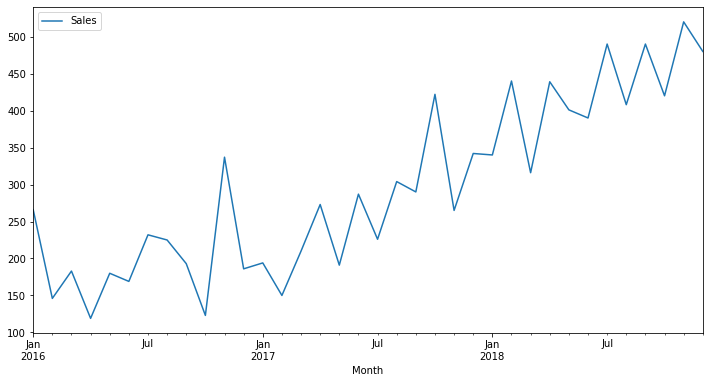

In [10]:
fig1 =Car_sales.plot(figsize=(12,6));
experiment.log_figure(figure_name="Sales vs Month", figure=fig1)
plt.show()

In [1]:
fig2 = plt.figure(figsize=(15,2))
results = seasonal_decompose(Car_sales['Sales'])
experiment.log_figure(figure_name= "Seasonal Forcast", figure=fig2)
results.plot();

NameError: ignored

In [12]:
train = Car_sales[:-6]
test = Car_sales[-6:]

In [13]:
train.head()

,Sales
Month,
2016-01-31,266
2016-02-29,146
2016-03-31,183
2016-04-30,119
2016-05-31,180


In [14]:
test.head()

,Sales
Month,
2018-07-31,490
2018-08-31,408
2018-09-30,490
2018-10-31,420
2018-11-30,520


In [15]:
def generate_lag(Car_sales, n):
    X, y = [], []
    for i in range(len(Car_sales) - n):
        X.append(Car_sales[i:i+n])
        y.append(Car_sales[n+i])
    
    return np.array(X), np.array(y), np.array(y[-n:]).reshape(1,n)

In [16]:
X, y, last_batch_values = generate_lag(train.Sales.values, 12)

In [17]:
X

array([[266, 146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186],
       [146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194],
       [183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150],
       [119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210],
       [180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273],
       [169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191],
       [232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287],
       [225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226],
       [193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304],
       [123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290],
       [337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422],
       [186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265],
       [194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342],
       [150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340],
       [210, 273, 191, 287, 226, 3

In [18]:
y

array([194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340,
       440, 316, 439, 401, 390])

In [19]:
last_batch_values

array([[226, 304, 290, 422, 265, 342, 340, 440, 316, 439, 401, 390]])

In [20]:
def mlp_model(input_, y_, epochs=1000):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=input_.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    print(model.fit(input_, y_, epochs=epochs))
    return model

In [21]:
batch_size = 128
epochs = 3000
EMBEDDING_SIZE = 50
learning_rate = 0.001

params={
    "batch_size":batch_size,
    "epochs":epochs,
    "embed_size":EMBEDDING_SIZE,
    "optimizer":"Adam",
    "learning_rate":learning_rate,
    "loss":"sparse_categorical_crossentropy",
    }

experiment.log_parameters(params)

In [22]:
model = mlp_model(X,y, epochs=3000)
model

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE
COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


Epoch 1/3000
1/1 [==============================] - ETA: 0s - loss: 28618.5918

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 1s 741ms/step - loss: 28618.5918
Epoch 2/3000
1/1 [==============================] - ETA: 0s - loss: 22340.8809

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 22340.8809
Epoch 3/3000
1/1 [==============================] - ETA: 0s - loss: 17010.8438

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 56ms/step - loss: 17010.8438
Epoch 4/3000
1/1 [==============================] - ETA: 0s - loss: 12624.0713

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 12624.0713
Epoch 5/3000
1/1 [==============================] - ETA: 0s - loss: 9159.4297

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 9159.4297
Epoch 6/3000
1/1 [==============================] - ETA: 0s - loss: 6612.5171

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 57ms/step - loss: 6612.5171
Epoch 7/3000
1/1 [==============================] - ETA: 0s - loss: 4981.8413

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 4981.8413
Epoch 8/3000
1/1 [==============================] - ETA: 0s - loss: 4189.0835

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 4189.0835
Epoch 9/3000
1/1 [==============================] - ETA: 0s - loss: 4100.5312

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 4100.5312
Epoch 10/3000
1/1 [==============================] - ETA: 0s - loss: 4511.6357

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 4511.6357
Epoch 11/3000
1/1 [==============================] - ETA: 0s - loss: 5169.9507

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 5169.9507
Epoch 12/3000
1/1 [==============================] - ETA: 0s - loss: 5843.1064

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 51ms/step - loss: 5843.1064
Epoch 13/3000
1/1 [==============================] - ETA: 0s - loss: 6350.3633

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 6350.3633
Epoch 14/3000
1/1 [==============================] - ETA: 0s - loss: 6599.8145

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 57ms/step - loss: 6599.8145
Epoch 15/3000
1/1 [==============================] - ETA: 0s - loss: 6569.2334

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 6569.2334
Epoch 16/3000
1/1 [==============================] - ETA: 0s - loss: 6292.5757

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 6292.5757
Epoch 17/3000
1/1 [==============================] - ETA: 0s - loss: 5846.9751

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 5846.9751
Epoch 18/3000
1/1 [==============================] - ETA: 0s - loss: 5323.8809

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 5323.8809
Epoch 19/3000
1/1 [==============================] - ETA: 0s - loss: 4794.9639

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 4794.9639
Epoch 20/3000
1/1 [==============================] - ETA: 0s - loss: 4321.1533

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 4321.1533
Epoch 21/3000
1/1 [==============================] - ETA: 0s - loss: 3929.2847

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 57ms/step - loss: 3929.2847
Epoch 22/3000
1/1 [==============================] - ETA: 0s - loss: 3641.4441

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 3641.4441
Epoch 23/3000
1/1 [==============================] - ETA: 0s - loss: 3463.8369

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 3463.8369
Epoch 24/3000
1/1 [==============================] - ETA: 0s - loss: 3382.6067

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 3382.6067
Epoch 25/3000
1/1 [==============================] - ETA: 0s - loss: 3379.6462

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 3379.6462
Epoch 26/3000
1/1 [==============================] - ETA: 0s - loss: 3425.2351

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 3425.2351
Epoch 27/3000
1/1 [==============================] - ETA: 0s - loss: 3491.9995

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 3491.9995
Epoch 28/3000
1/1 [==============================] - ETA: 0s - loss: 3553.2244

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 56ms/step - loss: 3553.2244
Epoch 29/3000
1/1 [==============================] - ETA: 0s - loss: 3586.5586

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 3586.5586
Epoch 30/3000
1/1 [==============================] - ETA: 0s - loss: 3580.4666

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 3580.4666
Epoch 31/3000
1/1 [==============================] - ETA: 0s - loss: 3531.7461

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 3531.7461
Epoch 32/3000
1/1 [==============================] - ETA: 0s - loss: 3447.2878

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 3447.2878
Epoch 33/3000
1/1 [==============================] - ETA: 0s - loss: 3332.7793

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 3332.7793
Epoch 34/3000
1/1 [==============================] - ETA: 0s - loss: 3201.7061

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 3201.7061
Epoch 35/3000
1/1 [==============================] - ETA: 0s - loss: 3070.2627

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 3070.2627
Epoch 36/3000
1/1 [==============================] - ETA: 0s - loss: 2949.7297

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 2949.7297
Epoch 37/3000
1/1 [==============================] - ETA: 0s - loss: 2848.9690

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 2848.9690
Epoch 38/3000
1/1 [==============================] - ETA: 0s - loss: 2774.6123

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 54ms/step - loss: 2774.6123
Epoch 39/3000
1/1 [==============================] - ETA: 0s - loss: 2728.9595

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 2728.9595
Epoch 40/3000
1/1 [==============================] - ETA: 0s - loss: 2708.4097

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 2708.4097
Epoch 41/3000
1/1 [==============================] - ETA: 0s - loss: 2706.6550

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 2706.6550
Epoch 42/3000
1/1 [==============================] - ETA: 0s - loss: 2714.8933

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 2714.8933
Epoch 43/3000
1/1 [==============================] - ETA: 0s - loss: 2722.4666

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 2722.4666
Epoch 44/3000
1/1 [==============================] - ETA: 0s - loss: 2722.1045

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 2722.1045
Epoch 45/3000
1/1 [==============================] - ETA: 0s - loss: 2708.5811

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 2708.5811
Epoch 46/3000
1/1 [==============================] - ETA: 0s - loss: 2680.8206

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 2680.8206
Epoch 47/3000
1/1 [==============================] - ETA: 0s - loss: 2641.7446

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 2641.7446
Epoch 48/3000
1/1 [==============================] - ETA: 0s - loss: 2596.1736

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 56ms/step - loss: 2596.1736
Epoch 49/3000
1/1 [==============================] - ETA: 0s - loss: 2550.2632

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 2550.2632
Epoch 50/3000
1/1 [==============================] - ETA: 0s - loss: 2508.2041

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 55ms/step - loss: 2508.2041
Epoch 51/3000
1/1 [==============================] - ETA: 0s - loss: 2473.2595

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 2473.2595
Epoch 52/3000
1/1 [==============================] - ETA: 0s - loss: 2448.6731

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 2448.6731
Epoch 53/3000
1/1 [==============================] - ETA: 0s - loss: 2433.7048

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 2433.7048
Epoch 54/3000
1/1 [==============================] - ETA: 0s - loss: 2425.3804

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 51ms/step - loss: 2425.3804
Epoch 55/3000
1/1 [==============================] - ETA: 0s - loss: 2420.0200

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 2420.0200
Epoch 56/3000
1/1 [==============================] - ETA: 0s - loss: 2413.1489

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 2413.1489
Epoch 57/3000
1/1 [==============================] - ETA: 0s - loss: 2402.7231

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 2402.7231
Epoch 58/3000
1/1 [==============================] - ETA: 0s - loss: 2387.5928

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 2387.5928
Epoch 59/3000
1/1 [==============================] - ETA: 0s - loss: 2367.9019

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 2367.9019
Epoch 60/3000
1/1 [==============================] - ETA: 0s - loss: 2345.1609

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 2345.1609
Epoch 61/3000
1/1 [==============================] - ETA: 0s - loss: 2321.2483

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 2321.2483
Epoch 62/3000
1/1 [==============================] - ETA: 0s - loss: 2298.3096

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 2298.3096
Epoch 63/3000
1/1 [==============================] - ETA: 0s - loss: 2277.4441

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 2277.4441
Epoch 64/3000
1/1 [==============================] - ETA: 0s - loss: 2259.2246

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 2259.2246
Epoch 65/3000
1/1 [==============================] - ETA: 0s - loss: 2243.5789

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 2243.5789
Epoch 66/3000
1/1 [==============================] - ETA: 0s - loss: 2231.8123

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 53ms/step - loss: 2231.8123
Epoch 67/3000
1/1 [==============================] - ETA: 0s - loss: 2221.5452

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 262ms/step - loss: 2221.5452
Epoch 68/3000
1/1 [==============================] - ETA: 0s - loss: 2211.2317

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 2211.2317
Epoch 69/3000
1/1 [==============================] - ETA: 0s - loss: 2199.2319

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 2199.2319
Epoch 70/3000
1/1 [==============================] - ETA: 0s - loss: 2185.8838

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 2185.8838
Epoch 71/3000
1/1 [==============================] - ETA: 0s - loss: 2170.6724

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 2170.6724
Epoch 72/3000
1/1 [==============================] - ETA: 0s - loss: 2154.1521

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 2154.1521
Epoch 73/3000
1/1 [==============================] - ETA: 0s - loss: 2137.3281

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 2137.3281
Epoch 74/3000
1/1 [==============================] - ETA: 0s - loss: 2121.6323

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 2121.6323
Epoch 75/3000
1/1 [==============================] - ETA: 0s - loss: 2106.9246

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 2106.9246
Epoch 76/3000
1/1 [==============================] - ETA: 0s - loss: 2093.0132

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 2093.0132
Epoch 77/3000
1/1 [==============================] - ETA: 0s - loss: 2080.0654

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 2080.0654
Epoch 78/3000
1/1 [==============================] - ETA: 0s - loss: 2068.0710

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 2068.0710
Epoch 79/3000
1/1 [==============================] - ETA: 0s - loss: 2055.4888

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 2055.4888
Epoch 80/3000
1/1 [==============================] - ETA: 0s - loss: 2041.8448

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 2041.8448
Epoch 81/3000
1/1 [==============================] - ETA: 0s - loss: 2027.3167

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 2027.3167
Epoch 82/3000
1/1 [==============================] - ETA: 0s - loss: 2013.1830

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2013.1830
Epoch 83/3000
1/1 [==============================] - ETA: 0s - loss: 1999.5695

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1999.5695
Epoch 84/3000
1/1 [==============================] - ETA: 0s - loss: 1986.3533

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 1986.3533
Epoch 85/3000
1/1 [==============================] - ETA: 0s - loss: 1972.7385

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 1972.7385
Epoch 86/3000
1/1 [==============================] - ETA: 0s - loss: 1957.8750

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1957.8750
Epoch 87/3000
1/1 [==============================] - ETA: 0s - loss: 1942.9478

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1942.9478
Epoch 88/3000
1/1 [==============================] - ETA: 0s - loss: 1928.4994

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1928.4994
Epoch 89/3000
1/1 [==============================] - ETA: 0s - loss: 1914.6187

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1914.6187
Epoch 90/3000
1/1 [==============================] - ETA: 0s - loss: 1900.8427

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1900.8427
Epoch 91/3000
1/1 [==============================] - ETA: 0s - loss: 1886.9883

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1886.9883
Epoch 92/3000
1/1 [==============================] - ETA: 0s - loss: 1873.4073

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1873.4073
Epoch 93/3000
1/1 [==============================] - ETA: 0s - loss: 1859.9299

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 1859.9299
Epoch 94/3000
1/1 [==============================] - ETA: 0s - loss: 1846.5681

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1846.5681
Epoch 95/3000
1/1 [==============================] - ETA: 0s - loss: 1833.0647

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1833.0647
Epoch 96/3000
1/1 [==============================] - ETA: 0s - loss: 1820.1669

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1820.1669
Epoch 97/3000
1/1 [==============================] - ETA: 0s - loss: 1807.9281

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1807.9281
Epoch 98/3000
1/1 [==============================] - ETA: 0s - loss: 1796.9308

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1796.9308
Epoch 99/3000
1/1 [==============================] - ETA: 0s - loss: 1786.0803

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1786.0803
Epoch 100/3000
1/1 [==============================] - ETA: 0s - loss: 1774.8259

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1774.8259
Epoch 101/3000
1/1 [==============================] - ETA: 0s - loss: 1763.1624

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1763.1624
Epoch 102/3000
1/1 [==============================] - ETA: 0s - loss: 1751.0782

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1751.0782
Epoch 103/3000
1/1 [==============================] - ETA: 0s - loss: 1738.8784

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1738.8784
Epoch 104/3000
1/1 [==============================] - ETA: 0s - loss: 1726.3369

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1726.3369
Epoch 105/3000
1/1 [==============================] - ETA: 0s - loss: 1713.0938

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1713.0938
Epoch 106/3000
1/1 [==============================] - ETA: 0s - loss: 1700.2538

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1700.2538
Epoch 107/3000
1/1 [==============================] - ETA: 0s - loss: 1688.5232

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 1688.5232
Epoch 108/3000
1/1 [==============================] - ETA: 0s - loss: 1676.5270

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1676.5270
Epoch 109/3000
1/1 [==============================] - ETA: 0s - loss: 1664.5386

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 1664.5386
Epoch 110/3000
1/1 [==============================] - ETA: 0s - loss: 1653.8828

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1653.8828
Epoch 111/3000
1/1 [==============================] - ETA: 0s - loss: 1643.0469

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 1643.0469
Epoch 112/3000
1/1 [==============================] - ETA: 0s - loss: 1632.2902

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1632.2902
Epoch 113/3000
1/1 [==============================] - ETA: 0s - loss: 1621.1935

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1621.1935
Epoch 114/3000
1/1 [==============================] - ETA: 0s - loss: 1610.4928

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1610.4928
Epoch 115/3000
1/1 [==============================] - ETA: 0s - loss: 1599.2079

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 51ms/step - loss: 1599.2079
Epoch 116/3000
1/1 [==============================] - ETA: 0s - loss: 1588.6586

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 1588.6586
Epoch 117/3000
1/1 [==============================] - ETA: 0s - loss: 1578.1359

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 52ms/step - loss: 1578.1359
Epoch 118/3000
1/1 [==============================] - ETA: 0s - loss: 1567.6646

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 1567.6646
Epoch 119/3000
1/1 [==============================] - ETA: 0s - loss: 1557.5725

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 1557.5725
Epoch 120/3000
1/1 [==============================] - ETA: 0s - loss: 1547.0405

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1547.0405
Epoch 121/3000
1/1 [==============================] - ETA: 0s - loss: 1536.4231

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 54ms/step - loss: 1536.4231
Epoch 122/3000
1/1 [==============================] - ETA: 0s - loss: 1526.4087

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 1526.4087
Epoch 123/3000
1/1 [==============================] - ETA: 0s - loss: 1516.6085

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 1516.6085
Epoch 124/3000
1/1 [==============================] - ETA: 0s - loss: 1506.0635

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1506.0635
Epoch 125/3000
1/1 [==============================] - ETA: 0s - loss: 1496.2249

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1496.2249
Epoch 126/3000
1/1 [==============================] - ETA: 0s - loss: 1486.4785

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 1486.4785
Epoch 127/3000
1/1 [==============================] - ETA: 0s - loss: 1476.6198

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 1476.6198
Epoch 128/3000
1/1 [==============================] - ETA: 0s - loss: 1466.8029

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1466.8029
Epoch 129/3000
1/1 [==============================] - ETA: 0s - loss: 1457.1060

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 49ms/step - loss: 1457.1060
Epoch 130/3000
1/1 [==============================] - ETA: 0s - loss: 1447.5094

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1447.5094
Epoch 131/3000
1/1 [==============================] - ETA: 0s - loss: 1437.9132

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 1437.9132
Epoch 132/3000
1/1 [==============================] - ETA: 0s - loss: 1428.2627

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 1428.2627
Epoch 133/3000
1/1 [==============================] - ETA: 0s - loss: 1419.2203

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 57ms/step - loss: 1419.2203
Epoch 134/3000
1/1 [==============================] - ETA: 0s - loss: 1409.8391

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 1409.8391
Epoch 135/3000
1/1 [==============================] - ETA: 0s - loss: 1400.3320

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1400.3320
Epoch 136/3000
1/1 [==============================] - ETA: 0s - loss: 1391.3843

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1391.3843
Epoch 137/3000
1/1 [==============================] - ETA: 0s - loss: 1382.2802

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1382.2802
Epoch 138/3000
1/1 [==============================] - ETA: 0s - loss: 1373.4983

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1373.4983
Epoch 139/3000
1/1 [==============================] - ETA: 0s - loss: 1364.5249

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1364.5249
Epoch 140/3000
1/1 [==============================] - ETA: 0s - loss: 1355.9253

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1355.9253
Epoch 141/3000
1/1 [==============================] - ETA: 0s - loss: 1347.2563

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 1347.2563
Epoch 142/3000
1/1 [==============================] - ETA: 0s - loss: 1338.2072

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 56ms/step - loss: 1338.2072
Epoch 143/3000
1/1 [==============================] - ETA: 0s - loss: 1329.9663

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1329.9663
Epoch 144/3000
1/1 [==============================] - ETA: 0s - loss: 1321.5840

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 1321.5840
Epoch 145/3000
1/1 [==============================] - ETA: 0s - loss: 1312.9331

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 1312.9331
Epoch 146/3000
1/1 [==============================] - ETA: 0s - loss: 1304.8856

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1304.8856
Epoch 147/3000
1/1 [==============================] - ETA: 0s - loss: 1296.0826

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 1296.0826
Epoch 148/3000
1/1 [==============================] - ETA: 0s - loss: 1288.2563

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 1288.2563
Epoch 149/3000
1/1 [==============================] - ETA: 0s - loss: 1280.4840

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1280.4840
Epoch 150/3000
1/1 [==============================] - ETA: 0s - loss: 1272.4238

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1272.4238
Epoch 151/3000
1/1 [==============================] - ETA: 0s - loss: 1264.2627

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 1264.2627
Epoch 152/3000
1/1 [==============================] - ETA: 0s - loss: 1256.1578

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 1256.1578
Epoch 153/3000
1/1 [==============================] - ETA: 0s - loss: 1248.1807

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1248.1807
Epoch 154/3000
1/1 [==============================] - ETA: 0s - loss: 1240.3237

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 1240.3237
Epoch 155/3000
1/1 [==============================] - ETA: 0s - loss: 1232.4995

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1232.4995
Epoch 156/3000
1/1 [==============================] - ETA: 0s - loss: 1225.1212

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1225.1212
Epoch 157/3000
1/1 [==============================] - ETA: 0s - loss: 1216.9761

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1216.9761
Epoch 158/3000
1/1 [==============================] - ETA: 0s - loss: 1209.2378

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 1209.2378
Epoch 159/3000
1/1 [==============================] - ETA: 0s - loss: 1201.7271

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 1201.7271
Epoch 160/3000
1/1 [==============================] - ETA: 0s - loss: 1194.0094

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1194.0094
Epoch 161/3000
1/1 [==============================] - ETA: 0s - loss: 1186.1460

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 1186.1460
Epoch 162/3000
1/1 [==============================] - ETA: 0s - loss: 1178.3453

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1178.3453
Epoch 163/3000
1/1 [==============================] - ETA: 0s - loss: 1170.7712

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1170.7712
Epoch 164/3000
1/1 [==============================] - ETA: 0s - loss: 1163.0994

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 55ms/step - loss: 1163.0994
Epoch 165/3000
1/1 [==============================] - ETA: 0s - loss: 1155.2697

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1155.2697
Epoch 166/3000
1/1 [==============================] - ETA: 0s - loss: 1148.1277

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 1148.1277
Epoch 167/3000
1/1 [==============================] - ETA: 0s - loss: 1140.4005

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1140.4005
Epoch 168/3000
1/1 [==============================] - ETA: 0s - loss: 1132.7488

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1132.7488
Epoch 169/3000
1/1 [==============================] - ETA: 0s - loss: 1125.2257

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 1125.2257
Epoch 170/3000
1/1 [==============================] - ETA: 0s - loss: 1118.0878

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1118.0878
Epoch 171/3000
1/1 [==============================] - ETA: 0s - loss: 1110.4650

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 1110.4650
Epoch 172/3000
1/1 [==============================] - ETA: 0s - loss: 1102.9487

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1102.9487
Epoch 173/3000
1/1 [==============================] - ETA: 0s - loss: 1095.4249

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1095.4249
Epoch 174/3000
1/1 [==============================] - ETA: 0s - loss: 1088.0883

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 1088.0883
Epoch 175/3000
1/1 [==============================] - ETA: 0s - loss: 1081.0066

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 55ms/step - loss: 1081.0066
Epoch 176/3000
1/1 [==============================] - ETA: 0s - loss: 1073.2495

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1073.2495
Epoch 177/3000
1/1 [==============================] - ETA: 0s - loss: 1065.9985

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 1065.9985
Epoch 178/3000
1/1 [==============================] - ETA: 0s - loss: 1058.8290

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 1058.8290
Epoch 179/3000
1/1 [==============================] - ETA: 0s - loss: 1051.4136

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1051.4136
Epoch 180/3000
1/1 [==============================] - ETA: 0s - loss: 1043.9346

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 1043.9346
Epoch 181/3000
1/1 [==============================] - ETA: 0s - loss: 1036.4146

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1036.4146
Epoch 182/3000
1/1 [==============================] - ETA: 0s - loss: 1029.2087

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1029.2087
Epoch 183/3000
1/1 [==============================] - ETA: 0s - loss: 1022.3064

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1022.3064
Epoch 184/3000
1/1 [==============================] - ETA: 0s - loss: 1015.5847

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 1015.5847
Epoch 185/3000
1/1 [==============================] - ETA: 0s - loss: 1007.9235

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1007.9235
Epoch 186/3000
1/1 [==============================] - ETA: 0s - loss: 1001.1270

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1001.1270
Epoch 187/3000
1/1 [==============================] - ETA: 0s - loss: 993.5800

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 993.5800
Epoch 188/3000
1/1 [==============================] - ETA: 0s - loss: 986.4733

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 986.4733
Epoch 189/3000
1/1 [==============================] - ETA: 0s - loss: 979.7218

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 979.7218
Epoch 190/3000
1/1 [==============================] - ETA: 0s - loss: 972.4238

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 972.4238
Epoch 191/3000
1/1 [==============================] - ETA: 0s - loss: 965.5693

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 965.5693
Epoch 192/3000
1/1 [==============================] - ETA: 0s - loss: 958.5862

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 958.5862
Epoch 193/3000
1/1 [==============================] - ETA: 0s - loss: 951.4144

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 951.4144
Epoch 194/3000
1/1 [==============================] - ETA: 0s - loss: 945.0918

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 945.0918
Epoch 195/3000
1/1 [==============================] - ETA: 0s - loss: 937.9245

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 937.9245
Epoch 196/3000
1/1 [==============================] - ETA: 0s - loss: 931.0176

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 931.0176
Epoch 197/3000
1/1 [==============================] - ETA: 0s - loss: 924.4925

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 52ms/step - loss: 924.4925
Epoch 198/3000
1/1 [==============================] - ETA: 0s - loss: 917.6771

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 917.6771
Epoch 199/3000
1/1 [==============================] - ETA: 0s - loss: 910.7953

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 910.7953
Epoch 200/3000
1/1 [==============================] - ETA: 0s - loss: 903.7829

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 903.7829
Epoch 201/3000
1/1 [==============================] - ETA: 0s - loss: 896.8580

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 896.8580
Epoch 202/3000
1/1 [==============================] - ETA: 0s - loss: 890.6033

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 890.6033
Epoch 203/3000
1/1 [==============================] - ETA: 0s - loss: 883.7908

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 883.7908
Epoch 204/3000
1/1 [==============================] - ETA: 0s - loss: 876.9813

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 876.9813
Epoch 205/3000
1/1 [==============================] - ETA: 0s - loss: 870.1911

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 870.1911
Epoch 206/3000
1/1 [==============================] - ETA: 0s - loss: 863.9640

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 863.9640
Epoch 207/3000
1/1 [==============================] - ETA: 0s - loss: 857.4642

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 45ms/step - loss: 857.4642
Epoch 208/3000
1/1 [==============================] - ETA: 0s - loss: 850.8986

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 850.8986
Epoch 209/3000
1/1 [==============================] - ETA: 0s - loss: 844.6856

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 844.6856
Epoch 210/3000
1/1 [==============================] - ETA: 0s - loss: 838.9786

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 838.9786
Epoch 211/3000
1/1 [==============================] - ETA: 0s - loss: 832.8162

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 832.8162
Epoch 212/3000
1/1 [==============================] - ETA: 0s - loss: 827.0649

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 827.0649
Epoch 213/3000
1/1 [==============================] - ETA: 0s - loss: 821.2328

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 821.2328
Epoch 214/3000
1/1 [==============================] - ETA: 0s - loss: 815.3160

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 815.3160
Epoch 215/3000
1/1 [==============================] - ETA: 0s - loss: 809.2985

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 809.2985
Epoch 216/3000
1/1 [==============================] - ETA: 0s - loss: 803.4803

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 803.4803
Epoch 217/3000
1/1 [==============================] - ETA: 0s - loss: 797.5444

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 797.5444
Epoch 218/3000
1/1 [==============================] - ETA: 0s - loss: 791.8256

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 791.8256
Epoch 219/3000
1/1 [==============================] - ETA: 0s - loss: 785.9921

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 785.9921
Epoch 220/3000
1/1 [==============================] - ETA: 0s - loss: 779.8932

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 779.8932
Epoch 221/3000
1/1 [==============================] - ETA: 0s - loss: 774.0310

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 774.0310
Epoch 222/3000
1/1 [==============================] - ETA: 0s - loss: 768.1248

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 768.1248
Epoch 223/3000
1/1 [==============================] - ETA: 0s - loss: 762.3074

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 762.3074
Epoch 224/3000
1/1 [==============================] - ETA: 0s - loss: 756.7899

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 756.7899
Epoch 225/3000
1/1 [==============================] - ETA: 0s - loss: 751.0778

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 751.0778
Epoch 226/3000
1/1 [==============================] - ETA: 0s - loss: 745.2599

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 52ms/step - loss: 745.2599
Epoch 227/3000
1/1 [==============================] - ETA: 0s - loss: 739.9000

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 739.9000
Epoch 228/3000
1/1 [==============================] - ETA: 0s - loss: 734.1844

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 734.1844
Epoch 229/3000
1/1 [==============================] - ETA: 0s - loss: 728.8515

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 728.8515
Epoch 230/3000
1/1 [==============================] - ETA: 0s - loss: 723.5959

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 723.5959
Epoch 231/3000
1/1 [==============================] - ETA: 0s - loss: 718.1511

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 718.1511
Epoch 232/3000
1/1 [==============================] - ETA: 0s - loss: 712.2222

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 712.2222
Epoch 233/3000
1/1 [==============================] - ETA: 0s - loss: 707.0806

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 707.0806
Epoch 234/3000
1/1 [==============================] - ETA: 0s - loss: 701.6459

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 701.6459
Epoch 235/3000
1/1 [==============================] - ETA: 0s - loss: 696.5759

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 52ms/step - loss: 696.5759
Epoch 236/3000
1/1 [==============================] - ETA: 0s - loss: 691.4478

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 691.4478
Epoch 237/3000
1/1 [==============================] - ETA: 0s - loss: 686.1927

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 686.1927
Epoch 238/3000
1/1 [==============================] - ETA: 0s - loss: 680.9380

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 680.9380
Epoch 239/3000
1/1 [==============================] - ETA: 0s - loss: 676.0651

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 676.0651
Epoch 240/3000
1/1 [==============================] - ETA: 0s - loss: 671.1033

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 671.1033
Epoch 241/3000
1/1 [==============================] - ETA: 0s - loss: 666.3455

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 666.3455
Epoch 242/3000
1/1 [==============================] - ETA: 0s - loss: 661.6430

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 661.6430
Epoch 243/3000
1/1 [==============================] - ETA: 0s - loss: 656.9632

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 656.9632
Epoch 244/3000
1/1 [==============================] - ETA: 0s - loss: 651.9270

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 651.9270
Epoch 245/3000
1/1 [==============================] - ETA: 0s - loss: 647.6318

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 647.6318
Epoch 246/3000
1/1 [==============================] - ETA: 0s - loss: 642.4416

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 642.4416
Epoch 247/3000
1/1 [==============================] - ETA: 0s - loss: 638.2311

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 638.2311
Epoch 248/3000
1/1 [==============================] - ETA: 0s - loss: 633.9465

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 633.9465
Epoch 249/3000
1/1 [==============================] - ETA: 0s - loss: 629.2922

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 629.2922
Epoch 250/3000
1/1 [==============================] - ETA: 0s - loss: 624.7708

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 624.7708
Epoch 251/3000
1/1 [==============================] - ETA: 0s - loss: 620.2118

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 620.2118
Epoch 252/3000
1/1 [==============================] - ETA: 0s - loss: 616.0776

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 616.0776
Epoch 253/3000
1/1 [==============================] - ETA: 0s - loss: 611.7141

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 611.7141
Epoch 254/3000
1/1 [==============================] - ETA: 0s - loss: 607.2274

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 607.2274
Epoch 255/3000
1/1 [==============================] - ETA: 0s - loss: 603.2449

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 603.2449
Epoch 256/3000
1/1 [==============================] - ETA: 0s - loss: 599.1158

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 599.1158
Epoch 257/3000
1/1 [==============================] - ETA: 0s - loss: 594.7148

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 594.7148
Epoch 258/3000
1/1 [==============================] - ETA: 0s - loss: 590.4618

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 590.4618
Epoch 259/3000
1/1 [==============================] - ETA: 0s - loss: 586.1603

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 586.1603
Epoch 260/3000
1/1 [==============================] - ETA: 0s - loss: 582.4283

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 582.4283
Epoch 261/3000
1/1 [==============================] - ETA: 0s - loss: 577.8036

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 577.8036
Epoch 262/3000
1/1 [==============================] - ETA: 0s - loss: 573.7457

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 573.7457
Epoch 263/3000
1/1 [==============================] - ETA: 0s - loss: 569.9877

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 569.9877
Epoch 264/3000
1/1 [==============================] - ETA: 0s - loss: 566.0334

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 566.0334
Epoch 265/3000
1/1 [==============================] - ETA: 0s - loss: 561.9773

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 561.9773
Epoch 266/3000
1/1 [==============================] - ETA: 0s - loss: 558.0534

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 558.0534
Epoch 267/3000
1/1 [==============================] - ETA: 0s - loss: 553.8231

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 553.8231
Epoch 268/3000
1/1 [==============================] - ETA: 0s - loss: 549.3725

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 549.3725
Epoch 269/3000
1/1 [==============================] - ETA: 0s - loss: 546.2703

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 546.2703
Epoch 270/3000
1/1 [==============================] - ETA: 0s - loss: 542.0509

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 542.0509
Epoch 271/3000
1/1 [==============================] - ETA: 0s - loss: 537.8465

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 537.8465
Epoch 272/3000
1/1 [==============================] - ETA: 0s - loss: 534.1635

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 534.1635
Epoch 273/3000
1/1 [==============================] - ETA: 0s - loss: 530.8107

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 530.8107
Epoch 274/3000
1/1 [==============================] - ETA: 0s - loss: 527.0509

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 527.0509
Epoch 275/3000
1/1 [==============================] - ETA: 0s - loss: 522.8749

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 522.8749
Epoch 276/3000
1/1 [==============================] - ETA: 0s - loss: 518.9340

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 518.9340
Epoch 277/3000
1/1 [==============================] - ETA: 0s - loss: 515.8116

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 515.8116
Epoch 278/3000
1/1 [==============================] - ETA: 0s - loss: 512.2607

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 512.2607
Epoch 279/3000
1/1 [==============================] - ETA: 0s - loss: 508.4289

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 508.4289
Epoch 280/3000
1/1 [==============================] - ETA: 0s - loss: 504.6223

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 504.6223
Epoch 281/3000
1/1 [==============================] - ETA: 0s - loss: 500.7001

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 500.7001
Epoch 282/3000
1/1 [==============================] - ETA: 0s - loss: 497.1349

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 497.1349
Epoch 283/3000
1/1 [==============================] - ETA: 0s - loss: 493.4528

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 493.4528
Epoch 284/3000
1/1 [==============================] - ETA: 0s - loss: 490.1689

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 490.1689
Epoch 285/3000
1/1 [==============================] - ETA: 0s - loss: 486.2388

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 486.2388
Epoch 286/3000
1/1 [==============================] - ETA: 0s - loss: 482.4890

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 482.4890
Epoch 287/3000
1/1 [==============================] - ETA: 0s - loss: 479.0502

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 479.0502
Epoch 288/3000
1/1 [==============================] - ETA: 0s - loss: 475.3052

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 475.3052
Epoch 289/3000
1/1 [==============================] - ETA: 0s - loss: 471.9074

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 471.9074
Epoch 290/3000
1/1 [==============================] - ETA: 0s - loss: 468.6277

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 468.6277
Epoch 291/3000
1/1 [==============================] - ETA: 0s - loss: 464.9784

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 464.9784
Epoch 292/3000
1/1 [==============================] - ETA: 0s - loss: 461.3152

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 461.3152
Epoch 293/3000
1/1 [==============================] - ETA: 0s - loss: 457.5822

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 457.5822
Epoch 294/3000
1/1 [==============================] - ETA: 0s - loss: 453.8028

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 453.8028
Epoch 295/3000
1/1 [==============================] - ETA: 0s - loss: 450.7665

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 450.7665
Epoch 296/3000
1/1 [==============================] - ETA: 0s - loss: 447.0124

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 447.0124
Epoch 297/3000
1/1 [==============================] - ETA: 0s - loss: 443.6259

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 443.6259
Epoch 298/3000
1/1 [==============================] - ETA: 0s - loss: 440.3751

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 440.3751
Epoch 299/3000
1/1 [==============================] - ETA: 0s - loss: 436.7049

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 436.7049
Epoch 300/3000
1/1 [==============================] - ETA: 0s - loss: 433.0799

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 433.0799
Epoch 301/3000
1/1 [==============================] - ETA: 0s - loss: 429.7696

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 429.7696
Epoch 302/3000
1/1 [==============================] - ETA: 0s - loss: 426.6523

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 426.6523
Epoch 303/3000
1/1 [==============================] - ETA: 0s - loss: 423.3737

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 423.3737
Epoch 304/3000
1/1 [==============================] - ETA: 0s - loss: 419.6114

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 419.6114
Epoch 305/3000
1/1 [==============================] - ETA: 0s - loss: 416.6762

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 416.6762
Epoch 306/3000
1/1 [==============================] - ETA: 0s - loss: 413.5432

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 413.5432
Epoch 307/3000
1/1 [==============================] - ETA: 0s - loss: 410.3514

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 410.3514
Epoch 308/3000
1/1 [==============================] - ETA: 0s - loss: 406.8913

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 406.8913
Epoch 309/3000
1/1 [==============================] - ETA: 0s - loss: 403.3041

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 403.3041
Epoch 310/3000
1/1 [==============================] - ETA: 0s - loss: 400.0410

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 400.0410
Epoch 311/3000
1/1 [==============================] - ETA: 0s - loss: 396.4631

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 396.4631
Epoch 312/3000
1/1 [==============================] - ETA: 0s - loss: 393.3333

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 393.3333
Epoch 313/3000
1/1 [==============================] - ETA: 0s - loss: 389.9678

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 389.9678
Epoch 314/3000
1/1 [==============================] - ETA: 0s - loss: 386.7784

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 386.7784
Epoch 315/3000
1/1 [==============================] - ETA: 0s - loss: 383.5882

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 383.5882
Epoch 316/3000
1/1 [==============================] - ETA: 0s - loss: 380.4267

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 380.4267
Epoch 317/3000
1/1 [==============================] - ETA: 0s - loss: 377.0240

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 377.0240
Epoch 318/3000
1/1 [==============================] - ETA: 0s - loss: 373.9440

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 373.9440
Epoch 319/3000
1/1 [==============================] - ETA: 0s - loss: 370.5269

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 370.5269
Epoch 320/3000
1/1 [==============================] - ETA: 0s - loss: 367.9422

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 367.9422
Epoch 321/3000
1/1 [==============================] - ETA: 0s - loss: 364.5363

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 364.5363
Epoch 322/3000
1/1 [==============================] - ETA: 0s - loss: 361.0232

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 361.0232
Epoch 323/3000
1/1 [==============================] - ETA: 0s - loss: 358.0251

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 358.0251
Epoch 324/3000
1/1 [==============================] - ETA: 0s - loss: 354.9720

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 354.9720
Epoch 325/3000
1/1 [==============================] - ETA: 0s - loss: 351.8295

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 51ms/step - loss: 351.8295
Epoch 326/3000
1/1 [==============================] - ETA: 0s - loss: 348.5851

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 348.5851
Epoch 327/3000
1/1 [==============================] - ETA: 0s - loss: 345.1300

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 345.1300
Epoch 328/3000
1/1 [==============================] - ETA: 0s - loss: 341.7502

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 341.7502
Epoch 329/3000
1/1 [==============================] - ETA: 0s - loss: 338.9252

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 338.9252
Epoch 330/3000
1/1 [==============================] - ETA: 0s - loss: 335.5457

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 335.5457
Epoch 331/3000
1/1 [==============================] - ETA: 0s - loss: 332.3378

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 332.3378
Epoch 332/3000
1/1 [==============================] - ETA: 0s - loss: 329.0884

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 329.0884
Epoch 333/3000
1/1 [==============================] - ETA: 0s - loss: 326.2501

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 326.2501
Epoch 334/3000
1/1 [==============================] - ETA: 0s - loss: 323.2489

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 323.2489
Epoch 335/3000
1/1 [==============================] - ETA: 0s - loss: 320.0474

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 320.0474
Epoch 336/3000
1/1 [==============================] - ETA: 0s - loss: 316.8315

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 316.8315
Epoch 337/3000
1/1 [==============================] - ETA: 0s - loss: 314.1096

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 314.1096
Epoch 338/3000
1/1 [==============================] - ETA: 0s - loss: 311.1161

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 311.1161
Epoch 339/3000
1/1 [==============================] - ETA: 0s - loss: 307.7706

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 307.7706
Epoch 340/3000
1/1 [==============================] - ETA: 0s - loss: 305.1014

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 305.1014
Epoch 341/3000
1/1 [==============================] - ETA: 0s - loss: 302.4531

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 302.4531
Epoch 342/3000
1/1 [==============================] - ETA: 0s - loss: 299.3466

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 299.3466
Epoch 343/3000
1/1 [==============================] - ETA: 0s - loss: 296.5764

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 296.5764
Epoch 344/3000
1/1 [==============================] - ETA: 0s - loss: 294.3461

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 294.3461
Epoch 345/3000
1/1 [==============================] - ETA: 0s - loss: 292.1042

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 292.1042
Epoch 346/3000
1/1 [==============================] - ETA: 0s - loss: 290.2618

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 290.2618
Epoch 347/3000
1/1 [==============================] - ETA: 0s - loss: 288.3876

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 288.3876
Epoch 348/3000
1/1 [==============================] - ETA: 0s - loss: 286.0309

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 286.0309
Epoch 349/3000
1/1 [==============================] - ETA: 0s - loss: 283.8693

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 283.8693
Epoch 350/3000
1/1 [==============================] - ETA: 0s - loss: 281.9677

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 281.9677
Epoch 351/3000
1/1 [==============================] - ETA: 0s - loss: 280.0108

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 280.0108
Epoch 352/3000
1/1 [==============================] - ETA: 0s - loss: 277.8531

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 277.8531
Epoch 353/3000
1/1 [==============================] - ETA: 0s - loss: 275.6252

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 275.6252
Epoch 354/3000
1/1 [==============================] - ETA: 0s - loss: 273.4415

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 273.4415
Epoch 355/3000
1/1 [==============================] - ETA: 0s - loss: 271.9521

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 271.9521
Epoch 356/3000
1/1 [==============================] - ETA: 0s - loss: 270.1628

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 270.1628
Epoch 357/3000
1/1 [==============================] - ETA: 0s - loss: 267.4784

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 267.4784
Epoch 358/3000
1/1 [==============================] - ETA: 0s - loss: 265.7404

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 265.7404
Epoch 359/3000
1/1 [==============================] - ETA: 0s - loss: 263.9076

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 263.9076
Epoch 360/3000
1/1 [==============================] - ETA: 0s - loss: 261.9834

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 261.9834
Epoch 361/3000
1/1 [==============================] - ETA: 0s - loss: 259.9333

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 259.9333
Epoch 362/3000
1/1 [==============================] - ETA: 0s - loss: 257.8772

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 257.8772
Epoch 363/3000
1/1 [==============================] - ETA: 0s - loss: 256.3851

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 256.3851
Epoch 364/3000
1/1 [==============================] - ETA: 0s - loss: 254.5288

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 254.5288
Epoch 365/3000
1/1 [==============================] - ETA: 0s - loss: 252.2865

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 252.2865
Epoch 366/3000
1/1 [==============================] - ETA: 0s - loss: 250.5181

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 250.5181
Epoch 367/3000
1/1 [==============================] - ETA: 0s - loss: 248.9518

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 248.9518
Epoch 368/3000
1/1 [==============================] - ETA: 0s - loss: 247.2908

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 247.2908
Epoch 369/3000
1/1 [==============================] - ETA: 0s - loss: 245.3038

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 245.3038
Epoch 370/3000
1/1 [==============================] - ETA: 0s - loss: 243.4288

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 243.4288
Epoch 371/3000
1/1 [==============================] - ETA: 0s - loss: 241.5407

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 241.5407
Epoch 372/3000
1/1 [==============================] - ETA: 0s - loss: 240.2342

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 240.2342
Epoch 373/3000
1/1 [==============================] - ETA: 0s - loss: 238.4192

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 238.4192
Epoch 374/3000
1/1 [==============================] - ETA: 0s - loss: 236.3902

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 236.3902
Epoch 375/3000
1/1 [==============================] - ETA: 0s - loss: 234.6937

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 234.6937
Epoch 376/3000
1/1 [==============================] - ETA: 0s - loss: 233.2231

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 233.2231
Epoch 377/3000
1/1 [==============================] - ETA: 0s - loss: 231.6366

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 231.6366
Epoch 378/3000
1/1 [==============================] - ETA: 0s - loss: 229.7087

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 229.7087
Epoch 379/3000
1/1 [==============================] - ETA: 0s - loss: 227.8735

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 227.8735
Epoch 380/3000
1/1 [==============================] - ETA: 0s - loss: 226.3335

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 226.3335
Epoch 381/3000
1/1 [==============================] - ETA: 0s - loss: 224.6128

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 224.6128
Epoch 382/3000
1/1 [==============================] - ETA: 0s - loss: 222.8140

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 222.8140
Epoch 383/3000
1/1 [==============================] - ETA: 0s - loss: 221.2574

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 221.2574
Epoch 384/3000
1/1 [==============================] - ETA: 0s - loss: 219.6176

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 219.6176
Epoch 385/3000
1/1 [==============================] - ETA: 0s - loss: 217.9772

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 217.9772
Epoch 386/3000
1/1 [==============================] - ETA: 0s - loss: 216.4310

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 216.4310
Epoch 387/3000
1/1 [==============================] - ETA: 0s - loss: 214.8482

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 214.8482
Epoch 388/3000
1/1 [==============================] - ETA: 0s - loss: 213.2370

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 213.2370
Epoch 389/3000
1/1 [==============================] - ETA: 0s - loss: 211.6644

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 211.6644
Epoch 390/3000
1/1 [==============================] - ETA: 0s - loss: 210.0386

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 210.0386
Epoch 391/3000
1/1 [==============================] - ETA: 0s - loss: 208.7297

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 208.7297
Epoch 392/3000
1/1 [==============================] - ETA: 0s - loss: 206.9753

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 206.9753
Epoch 393/3000
1/1 [==============================] - ETA: 0s - loss: 205.7068

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 205.7068
Epoch 394/3000
1/1 [==============================] - ETA: 0s - loss: 204.4348

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 204.4348
Epoch 395/3000
1/1 [==============================] - ETA: 0s - loss: 202.8862

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 202.8862
Epoch 396/3000
1/1 [==============================] - ETA: 0s - loss: 201.2963

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 201.2963
Epoch 397/3000
1/1 [==============================] - ETA: 0s - loss: 199.5851

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 199.5851
Epoch 398/3000
1/1 [==============================] - ETA: 0s - loss: 198.2203

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 198.2203
Epoch 399/3000
1/1 [==============================] - ETA: 0s - loss: 197.1089

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 197.1089
Epoch 400/3000
1/1 [==============================] - ETA: 0s - loss: 195.1543

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 195.1543
Epoch 401/3000
1/1 [==============================] - ETA: 0s - loss: 193.7429

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 193.7429
Epoch 402/3000
1/1 [==============================] - ETA: 0s - loss: 192.7068

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 192.7068
Epoch 403/3000
1/1 [==============================] - ETA: 0s - loss: 191.3758

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 191.3758
Epoch 404/3000
1/1 [==============================] - ETA: 0s - loss: 189.9415

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 189.9415
Epoch 405/3000
1/1 [==============================] - ETA: 0s - loss: 188.5744

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 188.5744
Epoch 406/3000
1/1 [==============================] - ETA: 0s - loss: 187.0283

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 187.0283
Epoch 407/3000
1/1 [==============================] - ETA: 0s - loss: 185.3931

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 185.3931
Epoch 408/3000
1/1 [==============================] - ETA: 0s - loss: 183.9581

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 183.9581
Epoch 409/3000
1/1 [==============================] - ETA: 0s - loss: 182.5383

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 182.5383
Epoch 410/3000
1/1 [==============================] - ETA: 0s - loss: 181.3311

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 181.3311
Epoch 411/3000
1/1 [==============================] - ETA: 0s - loss: 180.1493

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 180.1493
Epoch 412/3000
1/1 [==============================] - ETA: 0s - loss: 178.5764

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 178.5764
Epoch 413/3000
1/1 [==============================] - ETA: 0s - loss: 177.4089

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 177.4089
Epoch 414/3000
1/1 [==============================] - ETA: 0s - loss: 176.2871

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 176.2871
Epoch 415/3000
1/1 [==============================] - ETA: 0s - loss: 174.9840

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 174.9840
Epoch 416/3000
1/1 [==============================] - ETA: 0s - loss: 173.5459

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 173.5459
Epoch 417/3000
1/1 [==============================] - ETA: 0s - loss: 172.2129

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 172.2129
Epoch 418/3000
1/1 [==============================] - ETA: 0s - loss: 170.9683

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 170.9683
Epoch 419/3000
1/1 [==============================] - ETA: 0s - loss: 169.6755

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 169.6755
Epoch 420/3000
1/1 [==============================] - ETA: 0s - loss: 168.3694

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 168.3694
Epoch 421/3000
1/1 [==============================] - ETA: 0s - loss: 167.1119

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 167.1119
Epoch 422/3000
1/1 [==============================] - ETA: 0s - loss: 165.6557

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 165.6557
Epoch 423/3000
1/1 [==============================] - ETA: 0s - loss: 164.7576

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 164.7576
Epoch 424/3000
1/1 [==============================] - ETA: 0s - loss: 163.6628

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 163.6628
Epoch 425/3000
1/1 [==============================] - ETA: 0s - loss: 162.7496

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 162.7496
Epoch 426/3000
1/1 [==============================] - ETA: 0s - loss: 161.0926

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 161.0926
Epoch 427/3000
1/1 [==============================] - ETA: 0s - loss: 159.7693

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 122ms/step - loss: 159.7693
Epoch 428/3000
1/1 [==============================] - ETA: 0s - loss: 158.5606

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 158.5606
Epoch 429/3000
1/1 [==============================] - ETA: 0s - loss: 157.4582

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 157.4582
Epoch 430/3000
1/1 [==============================] - ETA: 0s - loss: 156.3035

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 156.3035
Epoch 431/3000
1/1 [==============================] - ETA: 0s - loss: 155.1320

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 155.1320
Epoch 432/3000
1/1 [==============================] - ETA: 0s - loss: 154.2607

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 154.2607
Epoch 433/3000
1/1 [==============================] - ETA: 0s - loss: 152.8414

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 152.8414
Epoch 434/3000
1/1 [==============================] - ETA: 0s - loss: 151.6405

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 151.6405
Epoch 435/3000
1/1 [==============================] - ETA: 0s - loss: 150.6833

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 150.6833
Epoch 436/3000
1/1 [==============================] - ETA: 0s - loss: 149.3793

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 149.3793
Epoch 437/3000
1/1 [==============================] - ETA: 0s - loss: 148.2149

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 148.2149
Epoch 438/3000
1/1 [==============================] - ETA: 0s - loss: 147.0508

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 147.0508
Epoch 439/3000
1/1 [==============================] - ETA: 0s - loss: 145.9427

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 145.9427
Epoch 440/3000
1/1 [==============================] - ETA: 0s - loss: 144.6753

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 144.6753
Epoch 441/3000
1/1 [==============================] - ETA: 0s - loss: 143.6546

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 143.6546
Epoch 442/3000
1/1 [==============================] - ETA: 0s - loss: 142.6034

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 142.6034
Epoch 443/3000
1/1 [==============================] - ETA: 0s - loss: 141.4867

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 141.4867
Epoch 444/3000
1/1 [==============================] - ETA: 0s - loss: 140.3630

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 140.3630
Epoch 445/3000
1/1 [==============================] - ETA: 0s - loss: 139.3044

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 139.3044
Epoch 446/3000
1/1 [==============================] - ETA: 0s - loss: 138.2129

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 138.2129
Epoch 447/3000
1/1 [==============================] - ETA: 0s - loss: 137.2910

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 137.2910
Epoch 448/3000
1/1 [==============================] - ETA: 0s - loss: 136.4012

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 136.4012
Epoch 449/3000
1/1 [==============================] - ETA: 0s - loss: 135.2082

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 135.2082
Epoch 450/3000
1/1 [==============================] - ETA: 0s - loss: 133.9956

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 133.9956
Epoch 451/3000
1/1 [==============================] - ETA: 0s - loss: 133.1741

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 133.1741
Epoch 452/3000
1/1 [==============================] - ETA: 0s - loss: 131.9907

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 131.9907
Epoch 453/3000
1/1 [==============================] - ETA: 0s - loss: 130.9975

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 130.9975
Epoch 454/3000
1/1 [==============================] - ETA: 0s - loss: 130.0102

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 130.0102
Epoch 455/3000
1/1 [==============================] - ETA: 0s - loss: 128.9189

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 128.9189
Epoch 456/3000
1/1 [==============================] - ETA: 0s - loss: 127.9467

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 127.9467
Epoch 457/3000
1/1 [==============================] - ETA: 0s - loss: 126.9964

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 126.9964
Epoch 458/3000
1/1 [==============================] - ETA: 0s - loss: 126.2633

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 126.2633
Epoch 459/3000
1/1 [==============================] - ETA: 0s - loss: 125.0431

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 125.0431
Epoch 460/3000
1/1 [==============================] - ETA: 0s - loss: 124.0413

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 124.0413
Epoch 461/3000
1/1 [==============================] - ETA: 0s - loss: 123.0026

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 123.0026
Epoch 462/3000
1/1 [==============================] - ETA: 0s - loss: 122.1089

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 122.1089
Epoch 463/3000
1/1 [==============================] - ETA: 0s - loss: 121.0563

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 121.0563
Epoch 464/3000
1/1 [==============================] - ETA: 0s - loss: 120.0502

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 120.0502
Epoch 465/3000
1/1 [==============================] - ETA: 0s - loss: 119.1788

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 119.1788
Epoch 466/3000
1/1 [==============================] - ETA: 0s - loss: 118.4674

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 118.4674
Epoch 467/3000
1/1 [==============================] - ETA: 0s - loss: 117.4417

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 117.4417
Epoch 468/3000
1/1 [==============================] - ETA: 0s - loss: 116.2551

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 116.2551
Epoch 469/3000
1/1 [==============================] - ETA: 0s - loss: 115.5310

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 115.5310
Epoch 470/3000
1/1 [==============================] - ETA: 0s - loss: 114.8027

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 114.8027
Epoch 471/3000
1/1 [==============================] - ETA: 0s - loss: 113.8568

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 113.8568
Epoch 472/3000
1/1 [==============================] - ETA: 0s - loss: 112.9269

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 112.9269
Epoch 473/3000
1/1 [==============================] - ETA: 0s - loss: 111.7544

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 111.7544
Epoch 474/3000
1/1 [==============================] - ETA: 0s - loss: 111.1351

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 111.1351
Epoch 475/3000
1/1 [==============================] - ETA: 0s - loss: 110.1587

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 110.1587
Epoch 476/3000
1/1 [==============================] - ETA: 0s - loss: 109.1971

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 109.1971
Epoch 477/3000
1/1 [==============================] - ETA: 0s - loss: 108.4166

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 108.4166
Epoch 478/3000
1/1 [==============================] - ETA: 0s - loss: 107.5053

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 107.5053
Epoch 479/3000
1/1 [==============================] - ETA: 0s - loss: 106.6632

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 106.6632
Epoch 480/3000
1/1 [==============================] - ETA: 0s - loss: 105.6965

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 105.6965
Epoch 481/3000
1/1 [==============================] - ETA: 0s - loss: 104.7137

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 104.7137
Epoch 482/3000
1/1 [==============================] - ETA: 0s - loss: 103.9357

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 103.9357
Epoch 483/3000
1/1 [==============================] - ETA: 0s - loss: 102.9852

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 102.9852
Epoch 484/3000
1/1 [==============================] - ETA: 0s - loss: 102.1648

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 102.1648
Epoch 485/3000
1/1 [==============================] - ETA: 0s - loss: 101.4522

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 101.4522
Epoch 486/3000
1/1 [==============================] - ETA: 0s - loss: 100.3905

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 100.3905
Epoch 487/3000
1/1 [==============================] - ETA: 0s - loss: 99.6059

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 99.6059
Epoch 488/3000
1/1 [==============================] - ETA: 0s - loss: 98.8039

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 98.8039
Epoch 489/3000
1/1 [==============================] - ETA: 0s - loss: 98.2085

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 98.2085
Epoch 490/3000
1/1 [==============================] - ETA: 0s - loss: 97.1916

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 97.1916
Epoch 491/3000
1/1 [==============================] - ETA: 0s - loss: 96.4885

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 96.4885
Epoch 492/3000
1/1 [==============================] - ETA: 0s - loss: 95.7409

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 95.7409
Epoch 493/3000
1/1 [==============================] - ETA: 0s - loss: 94.9157

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 94.9157
Epoch 494/3000
1/1 [==============================] - ETA: 0s - loss: 94.0592

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 94.0592
Epoch 495/3000
1/1 [==============================] - ETA: 0s - loss: 93.1346

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 93.1346
Epoch 496/3000
1/1 [==============================] - ETA: 0s - loss: 92.2466

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 92.2466
Epoch 497/3000
1/1 [==============================] - ETA: 0s - loss: 91.6624

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 91.6624
Epoch 498/3000
1/1 [==============================] - ETA: 0s - loss: 90.8064

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 90.8064
Epoch 499/3000
1/1 [==============================] - ETA: 0s - loss: 90.0619

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 90.0619
Epoch 500/3000
1/1 [==============================] - ETA: 0s - loss: 89.3746

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 89.3746
Epoch 501/3000
1/1 [==============================] - ETA: 0s - loss: 88.5409

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 88.5409
Epoch 502/3000
1/1 [==============================] - ETA: 0s - loss: 87.8137

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 87.8137
Epoch 503/3000
1/1 [==============================] - ETA: 0s - loss: 86.9933

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 86.9933
Epoch 504/3000
1/1 [==============================] - ETA: 0s - loss: 86.2089

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 86.2089
Epoch 505/3000
1/1 [==============================] - ETA: 0s - loss: 85.6639

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 85.6639
Epoch 506/3000
1/1 [==============================] - ETA: 0s - loss: 84.7947

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 84.7947
Epoch 507/3000
1/1 [==============================] - ETA: 0s - loss: 84.0521

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 84.0521
Epoch 508/3000
1/1 [==============================] - ETA: 0s - loss: 83.4360

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 83.4360
Epoch 509/3000
1/1 [==============================] - ETA: 0s - loss: 82.8292

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 82.8292
Epoch 510/3000
1/1 [==============================] - ETA: 0s - loss: 82.3129

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 82.3129
Epoch 511/3000
1/1 [==============================] - ETA: 0s - loss: 81.4950

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 81.4950
Epoch 512/3000
1/1 [==============================] - ETA: 0s - loss: 80.9415

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 80.9415
Epoch 513/3000
1/1 [==============================] - ETA: 0s - loss: 80.1761

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 80.1761
Epoch 514/3000
1/1 [==============================] - ETA: 0s - loss: 79.5120

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 79.5120
Epoch 515/3000
1/1 [==============================] - ETA: 0s - loss: 78.8156

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 78.8156
Epoch 516/3000
1/1 [==============================] - ETA: 0s - loss: 78.1731

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 78.1731
Epoch 517/3000
1/1 [==============================] - ETA: 0s - loss: 77.5385

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 77.5385
Epoch 518/3000
1/1 [==============================] - ETA: 0s - loss: 77.0056

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 77.0056
Epoch 519/3000
1/1 [==============================] - ETA: 0s - loss: 76.3259

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 76.3259
Epoch 520/3000
1/1 [==============================] - ETA: 0s - loss: 75.7802

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 53ms/step - loss: 75.7802
Epoch 521/3000
1/1 [==============================] - ETA: 0s - loss: 75.1054

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 75.1054
Epoch 522/3000
1/1 [==============================] - ETA: 0s - loss: 74.4427

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 74.4427
Epoch 523/3000
1/1 [==============================] - ETA: 0s - loss: 74.0654

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 74.0654
Epoch 524/3000
1/1 [==============================] - ETA: 0s - loss: 73.2140

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 73.2140
Epoch 525/3000
1/1 [==============================] - ETA: 0s - loss: 72.7033

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 72.7033
Epoch 526/3000
1/1 [==============================] - ETA: 0s - loss: 72.5619

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 72.5619
Epoch 527/3000
1/1 [==============================] - ETA: 0s - loss: 71.6564

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 71.6564
Epoch 528/3000
1/1 [==============================] - ETA: 0s - loss: 71.1535

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 71.1535
Epoch 529/3000
1/1 [==============================] - ETA: 0s - loss: 70.4944

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 70.4944
Epoch 530/3000
1/1 [==============================] - ETA: 0s - loss: 69.8921

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 69.8921
Epoch 531/3000
1/1 [==============================] - ETA: 0s - loss: 69.3680

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 69.3680
Epoch 532/3000
1/1 [==============================] - ETA: 0s - loss: 68.8803

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 68.8803
Epoch 533/3000
1/1 [==============================] - ETA: 0s - loss: 68.1572

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 68.1572
Epoch 534/3000
1/1 [==============================] - ETA: 0s - loss: 67.5300

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 67.5300
Epoch 535/3000
1/1 [==============================] - ETA: 0s - loss: 66.9786

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 66.9786
Epoch 536/3000
1/1 [==============================] - ETA: 0s - loss: 66.5226

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 66.5226
Epoch 537/3000
1/1 [==============================] - ETA: 0s - loss: 65.7277

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 65.7277
Epoch 538/3000
1/1 [==============================] - ETA: 0s - loss: 65.3159

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 65.3159
Epoch 539/3000
1/1 [==============================] - ETA: 0s - loss: 64.9916

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 64.9916
Epoch 540/3000
1/1 [==============================] - ETA: 0s - loss: 64.1502

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 64.1502
Epoch 541/3000
1/1 [==============================] - ETA: 0s - loss: 63.8582

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 63.8582
Epoch 542/3000
1/1 [==============================] - ETA: 0s - loss: 63.1908

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 63.1908
Epoch 543/3000
1/1 [==============================] - ETA: 0s - loss: 62.7213

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 62.7213
Epoch 544/3000
1/1 [==============================] - ETA: 0s - loss: 62.2000

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 62.2000
Epoch 545/3000
1/1 [==============================] - ETA: 0s - loss: 61.6782

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 61.6782
Epoch 546/3000
1/1 [==============================] - ETA: 0s - loss: 61.2369

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 61.2369
Epoch 547/3000
1/1 [==============================] - ETA: 0s - loss: 60.6912

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 60.6912
Epoch 548/3000
1/1 [==============================] - ETA: 0s - loss: 60.2013

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 60.2013
Epoch 549/3000
1/1 [==============================] - ETA: 0s - loss: 59.7067

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 59.7067
Epoch 550/3000
1/1 [==============================] - ETA: 0s - loss: 59.1889

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 59.1889
Epoch 551/3000
1/1 [==============================] - ETA: 0s - loss: 58.6345

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 58.6345
Epoch 552/3000
1/1 [==============================] - ETA: 0s - loss: 58.3089

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 58.3089
Epoch 553/3000
1/1 [==============================] - ETA: 0s - loss: 57.8167

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 57.8167
Epoch 554/3000
1/1 [==============================] - ETA: 0s - loss: 57.3339

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 57.3339
Epoch 555/3000
1/1 [==============================] - ETA: 0s - loss: 56.8633

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 56.8633
Epoch 556/3000
1/1 [==============================] - ETA: 0s - loss: 56.5452

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 56.5452
Epoch 557/3000
1/1 [==============================] - ETA: 0s - loss: 56.0185

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 56.0185
Epoch 558/3000
1/1 [==============================] - ETA: 0s - loss: 55.3977

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 55.3977
Epoch 559/3000
1/1 [==============================] - ETA: 0s - loss: 55.1275

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 55.1275
Epoch 560/3000
1/1 [==============================] - ETA: 0s - loss: 54.9449

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 54.9449
Epoch 561/3000
1/1 [==============================] - ETA: 0s - loss: 54.0866

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 54.0866
Epoch 562/3000
1/1 [==============================] - ETA: 0s - loss: 53.7503

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 53.7503
Epoch 563/3000
1/1 [==============================] - ETA: 0s - loss: 53.3643

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 53.3643
Epoch 564/3000
1/1 [==============================] - ETA: 0s - loss: 52.8765

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 52.8765
Epoch 565/3000
1/1 [==============================] - ETA: 0s - loss: 52.4829

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 52.4829
Epoch 566/3000
1/1 [==============================] - ETA: 0s - loss: 52.3443

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 52.3443
Epoch 567/3000
1/1 [==============================] - ETA: 0s - loss: 51.5777

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 51.5777
Epoch 568/3000
1/1 [==============================] - ETA: 0s - loss: 51.3217

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 51.3217
Epoch 569/3000
1/1 [==============================] - ETA: 0s - loss: 50.9144

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 50.9144
Epoch 570/3000
1/1 [==============================] - ETA: 0s - loss: 50.2833

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 50.2833
Epoch 571/3000
1/1 [==============================] - ETA: 0s - loss: 49.9319

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 49.9319
Epoch 572/3000
1/1 [==============================] - ETA: 0s - loss: 49.6231

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 49.6231
Epoch 573/3000
1/1 [==============================] - ETA: 0s - loss: 49.1245

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 49.1245
Epoch 574/3000
1/1 [==============================] - ETA: 0s - loss: 48.7229

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 48.7229
Epoch 575/3000
1/1 [==============================] - ETA: 0s - loss: 48.3584

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 48.3584
Epoch 576/3000
1/1 [==============================] - ETA: 0s - loss: 47.8345

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 57ms/step - loss: 47.8345
Epoch 577/3000
1/1 [==============================] - ETA: 0s - loss: 47.6009

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 47.6009
Epoch 578/3000
1/1 [==============================] - ETA: 0s - loss: 47.1469

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 47.1469
Epoch 579/3000
1/1 [==============================] - ETA: 0s - loss: 46.7475

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 46.7475
Epoch 580/3000
1/1 [==============================] - ETA: 0s - loss: 46.3606

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 46.3606
Epoch 581/3000
1/1 [==============================] - ETA: 0s - loss: 46.0682

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 46.0682
Epoch 582/3000
1/1 [==============================] - ETA: 0s - loss: 45.6981

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 45.6981
Epoch 583/3000
1/1 [==============================] - ETA: 0s - loss: 45.4999

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 45.4999
Epoch 584/3000
1/1 [==============================] - ETA: 0s - loss: 44.7618

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 44.7618
Epoch 585/3000
1/1 [==============================] - ETA: 0s - loss: 44.5891

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 44.5891
Epoch 586/3000
1/1 [==============================] - ETA: 0s - loss: 44.2982

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 44.2982
Epoch 587/3000
1/1 [==============================] - ETA: 0s - loss: 43.8413

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 43.8413
Epoch 588/3000
1/1 [==============================] - ETA: 0s - loss: 43.6343

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 43.6343
Epoch 589/3000
1/1 [==============================] - ETA: 0s - loss: 43.1377

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 43.1377
Epoch 590/3000
1/1 [==============================] - ETA: 0s - loss: 42.8042

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 42.8042
Epoch 591/3000
1/1 [==============================] - ETA: 0s - loss: 42.4478

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 42.4478
Epoch 592/3000
1/1 [==============================] - ETA: 0s - loss: 41.9783

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 41.9783
Epoch 593/3000
1/1 [==============================] - ETA: 0s - loss: 41.6839

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 41.6839
Epoch 594/3000
1/1 [==============================] - ETA: 0s - loss: 41.3262

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 41.3262
Epoch 595/3000
1/1 [==============================] - ETA: 0s - loss: 41.1604

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 41.1604
Epoch 596/3000
1/1 [==============================] - ETA: 0s - loss: 40.6590

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 40.6590
Epoch 597/3000
1/1 [==============================] - ETA: 0s - loss: 40.0725

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 40.0725
Epoch 598/3000
1/1 [==============================] - ETA: 0s - loss: 39.9076

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 39.9076
Epoch 599/3000
1/1 [==============================] - ETA: 0s - loss: 39.4535

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 39.4535
Epoch 600/3000
1/1 [==============================] - ETA: 0s - loss: 39.1406

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 39.1406
Epoch 601/3000
1/1 [==============================] - ETA: 0s - loss: 38.8362

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 38.8362
Epoch 602/3000
1/1 [==============================] - ETA: 0s - loss: 38.5570

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 38.5570
Epoch 603/3000
1/1 [==============================] - ETA: 0s - loss: 38.2464

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 38.2464
Epoch 604/3000
1/1 [==============================] - ETA: 0s - loss: 37.8440

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 37.8440
Epoch 605/3000
1/1 [==============================] - ETA: 0s - loss: 37.6584

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 37.6584
Epoch 606/3000
1/1 [==============================] - ETA: 0s - loss: 37.3415

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 37.3415
Epoch 607/3000
1/1 [==============================] - ETA: 0s - loss: 36.7763

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 36.7763
Epoch 608/3000
1/1 [==============================] - ETA: 0s - loss: 36.4947

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 36.4947
Epoch 609/3000
1/1 [==============================] - ETA: 0s - loss: 36.2550

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 36.2550
Epoch 610/3000
1/1 [==============================] - ETA: 0s - loss: 36.1625

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 36.1625
Epoch 611/3000
1/1 [==============================] - ETA: 0s - loss: 35.7904

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 117ms/step - loss: 35.7904
Epoch 612/3000
1/1 [==============================] - ETA: 0s - loss: 35.3562

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 35.3562
Epoch 613/3000
1/1 [==============================] - ETA: 0s - loss: 35.0180

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 122ms/step - loss: 35.0180
Epoch 614/3000
1/1 [==============================] - ETA: 0s - loss: 34.6607

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 34.6607
Epoch 615/3000
1/1 [==============================] - ETA: 0s - loss: 34.3932

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 34.3932
Epoch 616/3000
1/1 [==============================] - ETA: 0s - loss: 34.0026

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 126ms/step - loss: 34.0026
Epoch 617/3000
1/1 [==============================] - ETA: 0s - loss: 33.7466

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 33.7466
Epoch 618/3000
1/1 [==============================] - ETA: 0s - loss: 33.4911

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 33.4911
Epoch 619/3000
1/1 [==============================] - ETA: 0s - loss: 33.1862

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 33.1862
Epoch 620/3000
1/1 [==============================] - ETA: 0s - loss: 32.9258

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 32.9258
Epoch 621/3000
1/1 [==============================] - ETA: 0s - loss: 32.6253

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 32.6253
Epoch 622/3000
1/1 [==============================] - ETA: 0s - loss: 32.3133

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 32.3133
Epoch 623/3000
1/1 [==============================] - ETA: 0s - loss: 32.0275

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 32.0275
Epoch 624/3000
1/1 [==============================] - ETA: 0s - loss: 31.6941

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 31.6941
Epoch 625/3000
1/1 [==============================] - ETA: 0s - loss: 31.4320

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 31.4320
Epoch 626/3000
1/1 [==============================] - ETA: 0s - loss: 31.1715

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 31.1715
Epoch 627/3000
1/1 [==============================] - ETA: 0s - loss: 30.8672

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 30.8672
Epoch 628/3000
1/1 [==============================] - ETA: 0s - loss: 30.6959

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 30.6959
Epoch 629/3000
1/1 [==============================] - ETA: 0s - loss: 30.3401

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 30.3401
Epoch 630/3000
1/1 [==============================] - ETA: 0s - loss: 30.0449

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 30.0449
Epoch 631/3000
1/1 [==============================] - ETA: 0s - loss: 29.8964

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 137ms/step - loss: 29.8964
Epoch 632/3000
1/1 [==============================] - ETA: 0s - loss: 29.5812

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 29.5812
Epoch 633/3000
1/1 [==============================] - ETA: 0s - loss: 29.2814

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 29.2814
Epoch 634/3000
1/1 [==============================] - ETA: 0s - loss: 29.0296

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 29.0296
Epoch 635/3000
1/1 [==============================] - ETA: 0s - loss: 28.8170

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 28.8170
Epoch 636/3000
1/1 [==============================] - ETA: 0s - loss: 28.5965

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 28.5965
Epoch 637/3000
1/1 [==============================] - ETA: 0s - loss: 28.3451

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 28.3451
Epoch 638/3000
1/1 [==============================] - ETA: 0s - loss: 28.1836

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 28.1836
Epoch 639/3000
1/1 [==============================] - ETA: 0s - loss: 27.8979

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 27.8979
Epoch 640/3000
1/1 [==============================] - ETA: 0s - loss: 27.6582

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 27.6582
Epoch 641/3000
1/1 [==============================] - ETA: 0s - loss: 27.3303

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 27.3303
Epoch 642/3000
1/1 [==============================] - ETA: 0s - loss: 27.1984

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 27.1984
Epoch 643/3000
1/1 [==============================] - ETA: 0s - loss: 26.9073

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 26.9073
Epoch 644/3000
1/1 [==============================] - ETA: 0s - loss: 26.5713

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 26.5713
Epoch 645/3000
1/1 [==============================] - ETA: 0s - loss: 26.3775

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 26.3775
Epoch 646/3000
1/1 [==============================] - ETA: 0s - loss: 26.1585

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 26.1585
Epoch 647/3000
1/1 [==============================] - ETA: 0s - loss: 25.8877

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 25.8877
Epoch 648/3000
1/1 [==============================] - ETA: 0s - loss: 25.7548

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 25.7548
Epoch 649/3000
1/1 [==============================] - ETA: 0s - loss: 25.4178

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 25.4178
Epoch 650/3000
1/1 [==============================] - ETA: 0s - loss: 25.2284

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 25.2284
Epoch 651/3000
1/1 [==============================] - ETA: 0s - loss: 24.9545

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 24.9545
Epoch 652/3000
1/1 [==============================] - ETA: 0s - loss: 24.8793

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 24.8793
Epoch 653/3000
1/1 [==============================] - ETA: 0s - loss: 24.5764

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 24.5764
Epoch 654/3000
1/1 [==============================] - ETA: 0s - loss: 24.4212

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 24.4212
Epoch 655/3000
1/1 [==============================] - ETA: 0s - loss: 24.2120

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 24.2120
Epoch 656/3000
1/1 [==============================] - ETA: 0s - loss: 24.0449

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 24.0449
Epoch 657/3000
1/1 [==============================] - ETA: 0s - loss: 23.8359

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 23.8359
Epoch 658/3000
1/1 [==============================] - ETA: 0s - loss: 23.6659

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 23.6659
Epoch 659/3000
1/1 [==============================] - ETA: 0s - loss: 23.4099

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 23.4099
Epoch 660/3000
1/1 [==============================] - ETA: 0s - loss: 23.1329

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 23.1329
Epoch 661/3000
1/1 [==============================] - ETA: 0s - loss: 22.9025

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 22.9025
Epoch 662/3000
1/1 [==============================] - ETA: 0s - loss: 22.6730

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 22.6730
Epoch 663/3000
1/1 [==============================] - ETA: 0s - loss: 22.5786

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 22.5786
Epoch 664/3000
1/1 [==============================] - ETA: 0s - loss: 22.3227

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 22.3227
Epoch 665/3000
1/1 [==============================] - ETA: 0s - loss: 22.1499

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 22.1499
Epoch 666/3000
1/1 [==============================] - ETA: 0s - loss: 22.0169

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 22.0169
Epoch 667/3000
1/1 [==============================] - ETA: 0s - loss: 21.7800

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 21.7800
Epoch 668/3000
1/1 [==============================] - ETA: 0s - loss: 21.5573

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 21.5573
Epoch 669/3000
1/1 [==============================] - ETA: 0s - loss: 21.3739

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 21.3739
Epoch 670/3000
1/1 [==============================] - ETA: 0s - loss: 21.1536

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 21.1536
Epoch 671/3000
1/1 [==============================] - ETA: 0s - loss: 20.9752

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 20.9752
Epoch 672/3000
1/1 [==============================] - ETA: 0s - loss: 20.8016

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 20.8016
Epoch 673/3000
1/1 [==============================] - ETA: 0s - loss: 20.5870

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 20.5870
Epoch 674/3000
1/1 [==============================] - ETA: 0s - loss: 20.4203

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 20.4203
Epoch 675/3000
1/1 [==============================] - ETA: 0s - loss: 20.2757

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 20.2757
Epoch 676/3000
1/1 [==============================] - ETA: 0s - loss: 20.0858

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 20.0858
Epoch 677/3000
1/1 [==============================] - ETA: 0s - loss: 19.8526

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 19.8526
Epoch 678/3000
1/1 [==============================] - ETA: 0s - loss: 19.7781

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 19.7781
Epoch 679/3000
1/1 [==============================] - ETA: 0s - loss: 19.5761

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 19.5761
Epoch 680/3000
1/1 [==============================] - ETA: 0s - loss: 19.2520

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 19.2520
Epoch 681/3000
1/1 [==============================] - ETA: 0s - loss: 19.2194

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 19.2194
Epoch 682/3000
1/1 [==============================] - ETA: 0s - loss: 19.0511

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 19.0511
Epoch 683/3000
1/1 [==============================] - ETA: 0s - loss: 18.7839

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 18.7839
Epoch 684/3000
1/1 [==============================] - ETA: 0s - loss: 18.6505

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 18.6505
Epoch 685/3000
1/1 [==============================] - ETA: 0s - loss: 18.4685

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 18.4685
Epoch 686/3000
1/1 [==============================] - ETA: 0s - loss: 18.2774

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 18.2774
Epoch 687/3000
1/1 [==============================] - ETA: 0s - loss: 18.0869

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 18.0869
Epoch 688/3000
1/1 [==============================] - ETA: 0s - loss: 18.0059

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 18.0059
Epoch 689/3000
1/1 [==============================] - ETA: 0s - loss: 17.7979

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 17.7979
Epoch 690/3000
1/1 [==============================] - ETA: 0s - loss: 17.6064

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 17.6064
Epoch 691/3000
1/1 [==============================] - ETA: 0s - loss: 17.4988

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 17.4988
Epoch 692/3000
1/1 [==============================] - ETA: 0s - loss: 17.3809

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 17.3809
Epoch 693/3000
1/1 [==============================] - ETA: 0s - loss: 17.3013

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 17.3013
Epoch 694/3000
1/1 [==============================] - ETA: 0s - loss: 17.0716

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 17.0716
Epoch 695/3000
1/1 [==============================] - ETA: 0s - loss: 16.8633

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 16.8633
Epoch 696/3000
1/1 [==============================] - ETA: 0s - loss: 16.6446

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 16.6446
Epoch 697/3000
1/1 [==============================] - ETA: 0s - loss: 16.5296

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 16.5296
Epoch 698/3000
1/1 [==============================] - ETA: 0s - loss: 16.4194

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 16.4194
Epoch 699/3000
1/1 [==============================] - ETA: 0s - loss: 16.2452

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 16.2452
Epoch 700/3000
1/1 [==============================] - ETA: 0s - loss: 16.0712

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 16.0712
Epoch 701/3000
1/1 [==============================] - ETA: 0s - loss: 15.9572

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 15.9572
Epoch 702/3000
1/1 [==============================] - ETA: 0s - loss: 15.8898

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 15.8898
Epoch 703/3000
1/1 [==============================] - ETA: 0s - loss: 15.7036

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 15.7036
Epoch 704/3000
1/1 [==============================] - ETA: 0s - loss: 15.5499

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 15.5499
Epoch 705/3000
1/1 [==============================] - ETA: 0s - loss: 15.3615

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 15.3615
Epoch 706/3000
1/1 [==============================] - ETA: 0s - loss: 15.1875

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 15.1875
Epoch 707/3000
1/1 [==============================] - ETA: 0s - loss: 15.0053

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 15.0053
Epoch 708/3000
1/1 [==============================] - ETA: 0s - loss: 14.9805

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 14.9805
Epoch 709/3000
1/1 [==============================] - ETA: 0s - loss: 14.8607

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 14.8607
Epoch 710/3000
1/1 [==============================] - ETA: 0s - loss: 14.5872

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 14.5872
Epoch 711/3000
1/1 [==============================] - ETA: 0s - loss: 14.5200

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 14.5200
Epoch 712/3000
1/1 [==============================] - ETA: 0s - loss: 14.4841

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 14.4841
Epoch 713/3000
1/1 [==============================] - ETA: 0s - loss: 14.3603

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 14.3603
Epoch 714/3000
1/1 [==============================] - ETA: 0s - loss: 14.1846

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 14.1846
Epoch 715/3000
1/1 [==============================] - ETA: 0s - loss: 14.0409

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 14.0409
Epoch 716/3000
1/1 [==============================] - ETA: 0s - loss: 13.8680

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 13.8680
Epoch 717/3000
1/1 [==============================] - ETA: 0s - loss: 13.7233

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 13.7233
Epoch 718/3000
1/1 [==============================] - ETA: 0s - loss: 13.5412

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 13.5412
Epoch 719/3000
1/1 [==============================] - ETA: 0s - loss: 13.4631

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 13.4631
Epoch 720/3000
1/1 [==============================] - ETA: 0s - loss: 13.3355

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 13.3355
Epoch 721/3000
1/1 [==============================] - ETA: 0s - loss: 13.1415

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 13.1415
Epoch 722/3000
1/1 [==============================] - ETA: 0s - loss: 13.0645

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 13.0645
Epoch 723/3000
1/1 [==============================] - ETA: 0s - loss: 12.9292

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 12.9292
Epoch 724/3000
1/1 [==============================] - ETA: 0s - loss: 12.8396

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 12.8396
Epoch 725/3000
1/1 [==============================] - ETA: 0s - loss: 12.7158

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 12.7158
Epoch 726/3000
1/1 [==============================] - ETA: 0s - loss: 12.5494

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 12.5494
Epoch 727/3000
1/1 [==============================] - ETA: 0s - loss: 12.4714

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 12.4714
Epoch 728/3000
1/1 [==============================] - ETA: 0s - loss: 12.3276

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 12.3276
Epoch 729/3000
1/1 [==============================] - ETA: 0s - loss: 12.1623

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 12.1623
Epoch 730/3000
1/1 [==============================] - ETA: 0s - loss: 12.0441

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 12.0441
Epoch 731/3000
1/1 [==============================] - ETA: 0s - loss: 11.9823

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 11.9823
Epoch 732/3000
1/1 [==============================] - ETA: 0s - loss: 11.8939

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 11.8939
Epoch 733/3000
1/1 [==============================] - ETA: 0s - loss: 11.7435

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 11.7435
Epoch 734/3000
1/1 [==============================] - ETA: 0s - loss: 11.6123

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 11.6123
Epoch 735/3000
1/1 [==============================] - ETA: 0s - loss: 11.5521

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 11.5521
Epoch 736/3000
1/1 [==============================] - ETA: 0s - loss: 11.4169

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 11.4169
Epoch 737/3000
1/1 [==============================] - ETA: 0s - loss: 11.2570

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 11.2570
Epoch 738/3000
1/1 [==============================] - ETA: 0s - loss: 11.1739

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 11.1739
Epoch 739/3000
1/1 [==============================] - ETA: 0s - loss: 11.0629

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 11.0629
Epoch 740/3000
1/1 [==============================] - ETA: 0s - loss: 10.9351

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 10.9351
Epoch 741/3000
1/1 [==============================] - ETA: 0s - loss: 10.8264

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 10.8264
Epoch 742/3000
1/1 [==============================] - ETA: 0s - loss: 10.7126

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 10.7126
Epoch 743/3000
1/1 [==============================] - ETA: 0s - loss: 10.6869

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 10.6869
Epoch 744/3000
1/1 [==============================] - ETA: 0s - loss: 10.5500

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 10.5500
Epoch 745/3000
1/1 [==============================] - ETA: 0s - loss: 10.3754

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 10.3754
Epoch 746/3000
1/1 [==============================] - ETA: 0s - loss: 10.3172

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 10.3172
Epoch 747/3000
1/1 [==============================] - ETA: 0s - loss: 10.2448

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 10.2448
Epoch 748/3000
1/1 [==============================] - ETA: 0s - loss: 10.1329

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 10.1329
Epoch 749/3000
1/1 [==============================] - ETA: 0s - loss: 10.0187

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 10.0187
Epoch 750/3000
1/1 [==============================] - ETA: 0s - loss: 9.8785

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 9.8785
Epoch 751/3000
1/1 [==============================] - ETA: 0s - loss: 9.8244

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 9.8244
Epoch 752/3000
1/1 [==============================] - ETA: 0s - loss: 9.7236

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 9.7236
Epoch 753/3000
1/1 [==============================] - ETA: 0s - loss: 9.5556

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 9.5556
Epoch 754/3000
1/1 [==============================] - ETA: 0s - loss: 9.5133

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 146ms/step - loss: 9.5133
Epoch 755/3000
1/1 [==============================] - ETA: 0s - loss: 9.4136

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 9.4136
Epoch 756/3000
1/1 [==============================] - ETA: 0s - loss: 9.3488

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 9.3488
Epoch 757/3000
1/1 [==============================] - ETA: 0s - loss: 9.2513

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 121ms/step - loss: 9.2513
Epoch 758/3000
1/1 [==============================] - ETA: 0s - loss: 9.1350

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 134ms/step - loss: 9.1350
Epoch 759/3000
1/1 [==============================] - ETA: 0s - loss: 9.0474

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 9.0474
Epoch 760/3000
1/1 [==============================] - ETA: 0s - loss: 8.9682

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 8.9682
Epoch 761/3000
1/1 [==============================] - ETA: 0s - loss: 8.8808

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 125ms/step - loss: 8.8808
Epoch 762/3000
1/1 [==============================] - ETA: 0s - loss: 8.7758

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 127ms/step - loss: 8.7758
Epoch 763/3000
1/1 [==============================] - ETA: 0s - loss: 8.7137

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 8.7137
Epoch 764/3000
1/1 [==============================] - ETA: 0s - loss: 8.6198

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 8.6198
Epoch 765/3000
1/1 [==============================] - ETA: 0s - loss: 8.4882

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 8.4882
Epoch 766/3000
1/1 [==============================] - ETA: 0s - loss: 8.4727

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 8.4727
Epoch 767/3000
1/1 [==============================] - ETA: 0s - loss: 8.3935

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 8.3935
Epoch 768/3000
1/1 [==============================] - ETA: 0s - loss: 8.2516

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 8.2516
Epoch 769/3000
1/1 [==============================] - ETA: 0s - loss: 8.1452

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 8.1452
Epoch 770/3000
1/1 [==============================] - ETA: 0s - loss: 8.1155

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 8.1155
Epoch 771/3000
1/1 [==============================] - ETA: 0s - loss: 8.0631

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 122ms/step - loss: 8.0631
Epoch 772/3000
1/1 [==============================] - ETA: 0s - loss: 7.9506

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 7.9506
Epoch 773/3000
1/1 [==============================] - ETA: 0s - loss: 7.8848

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 7.8848
Epoch 774/3000
1/1 [==============================] - ETA: 0s - loss: 7.7955

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 132ms/step - loss: 7.7955
Epoch 775/3000
1/1 [==============================] - ETA: 0s - loss: 7.6803

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 7.6803
Epoch 776/3000
1/1 [==============================] - ETA: 0s - loss: 7.5736

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 7.5736
Epoch 777/3000
1/1 [==============================] - ETA: 0s - loss: 7.4730

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 7.4730
Epoch 778/3000
1/1 [==============================] - ETA: 0s - loss: 7.3892

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 117ms/step - loss: 7.3892
Epoch 779/3000
1/1 [==============================] - ETA: 0s - loss: 7.3454

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 7.3454
Epoch 780/3000
1/1 [==============================] - ETA: 0s - loss: 7.2610

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 138ms/step - loss: 7.2610
Epoch 781/3000
1/1 [==============================] - ETA: 0s - loss: 7.1574

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 131ms/step - loss: 7.1574
Epoch 782/3000
1/1 [==============================] - ETA: 0s - loss: 7.0698

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 127ms/step - loss: 7.0698
Epoch 783/3000
1/1 [==============================] - ETA: 0s - loss: 7.0319

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 7.0319
Epoch 784/3000
1/1 [==============================] - ETA: 0s - loss: 6.9252

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 6.9252
Epoch 785/3000
1/1 [==============================] - ETA: 0s - loss: 6.8207

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 6.8207
Epoch 786/3000
1/1 [==============================] - ETA: 0s - loss: 6.7692

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 6.7692
Epoch 787/3000
1/1 [==============================] - ETA: 0s - loss: 6.6877

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 6.6877
Epoch 788/3000
1/1 [==============================] - ETA: 0s - loss: 6.6184

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 6.6184
Epoch 789/3000
1/1 [==============================] - ETA: 0s - loss: 6.5494

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 140ms/step - loss: 6.5494
Epoch 790/3000
1/1 [==============================] - ETA: 0s - loss: 6.4738

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 127ms/step - loss: 6.4738
Epoch 791/3000
1/1 [==============================] - ETA: 0s - loss: 6.4128

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 6.4128
Epoch 792/3000
1/1 [==============================] - ETA: 0s - loss: 6.3364

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 6.3364
Epoch 793/3000
1/1 [==============================] - ETA: 0s - loss: 6.2561

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 6.2561
Epoch 794/3000
1/1 [==============================] - ETA: 0s - loss: 6.1720

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 6.1720
Epoch 795/3000
1/1 [==============================] - ETA: 0s - loss: 6.1087

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 6.1087
Epoch 796/3000
1/1 [==============================] - ETA: 0s - loss: 6.0288

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 6.0288
Epoch 797/3000
1/1 [==============================] - ETA: 0s - loss: 5.9476

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 5.9476
Epoch 798/3000
1/1 [==============================] - ETA: 0s - loss: 5.8858

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 5.8858
Epoch 799/3000
1/1 [==============================] - ETA: 0s - loss: 5.8230

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 5.8230
Epoch 800/3000
1/1 [==============================] - ETA: 0s - loss: 5.7636

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 5.7636
Epoch 801/3000
1/1 [==============================] - ETA: 0s - loss: 5.6929

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 5.6929
Epoch 802/3000
1/1 [==============================] - ETA: 0s - loss: 5.6216

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 5.6216
Epoch 803/3000
1/1 [==============================] - ETA: 0s - loss: 5.6105

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 5.6105
Epoch 804/3000
1/1 [==============================] - ETA: 0s - loss: 5.4998

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 5.4998
Epoch 805/3000
1/1 [==============================] - ETA: 0s - loss: 5.4124

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 5.4124
Epoch 806/3000
1/1 [==============================] - ETA: 0s - loss: 5.3876

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 5.3876
Epoch 807/3000
1/1 [==============================] - ETA: 0s - loss: 5.3448

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 5.3448
Epoch 808/3000
1/1 [==============================] - ETA: 0s - loss: 5.2763

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 5.2763
Epoch 809/3000
1/1 [==============================] - ETA: 0s - loss: 5.2089

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 5.2089
Epoch 810/3000
1/1 [==============================] - ETA: 0s - loss: 5.1251

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 5.1251
Epoch 811/3000
1/1 [==============================] - ETA: 0s - loss: 5.0467

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 5.0467
Epoch 812/3000
1/1 [==============================] - ETA: 0s - loss: 5.0095

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 5.0095
Epoch 813/3000
1/1 [==============================] - ETA: 0s - loss: 4.9439

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 4.9439
Epoch 814/3000
1/1 [==============================] - ETA: 0s - loss: 4.8560

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 4.8560
Epoch 815/3000
1/1 [==============================] - ETA: 0s - loss: 4.8161

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 4.8161
Epoch 816/3000
1/1 [==============================] - ETA: 0s - loss: 4.7748

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 4.7748
Epoch 817/3000
1/1 [==============================] - ETA: 0s - loss: 4.7123

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 4.7123
Epoch 818/3000
1/1 [==============================] - ETA: 0s - loss: 4.6518

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.6518
Epoch 819/3000
1/1 [==============================] - ETA: 0s - loss: 4.5885

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 4.5885
Epoch 820/3000
1/1 [==============================] - ETA: 0s - loss: 4.5233

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 4.5233
Epoch 821/3000
1/1 [==============================] - ETA: 0s - loss: 4.5063

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 4.5063
Epoch 822/3000
1/1 [==============================] - ETA: 0s - loss: 4.4409

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 4.4409
Epoch 823/3000
1/1 [==============================] - ETA: 0s - loss: 4.3604

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.3604
Epoch 824/3000
1/1 [==============================] - ETA: 0s - loss: 4.3342

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 4.3342
Epoch 825/3000
1/1 [==============================] - ETA: 0s - loss: 4.2915

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 4.2915
Epoch 826/3000
1/1 [==============================] - ETA: 0s - loss: 4.2359

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.2359
Epoch 827/3000
1/1 [==============================] - ETA: 0s - loss: 4.1745

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 4.1745
Epoch 828/3000
1/1 [==============================] - ETA: 0s - loss: 4.1188

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 4.1188
Epoch 829/3000
1/1 [==============================] - ETA: 0s - loss: 4.0604

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 4.0604
Epoch 830/3000
1/1 [==============================] - ETA: 0s - loss: 4.0246

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 4.0246
Epoch 831/3000
1/1 [==============================] - ETA: 0s - loss: 3.9813

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 3.9813
Epoch 832/3000
1/1 [==============================] - ETA: 0s - loss: 3.9187

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 3.9187
Epoch 833/3000
1/1 [==============================] - ETA: 0s - loss: 3.9004

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 3.9004
Epoch 834/3000
1/1 [==============================] - ETA: 0s - loss: 3.8532

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 3.8532
Epoch 835/3000
1/1 [==============================] - ETA: 0s - loss: 3.8144

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 3.8144
Epoch 836/3000
1/1 [==============================] - ETA: 0s - loss: 3.7415

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 3.7415
Epoch 837/3000
1/1 [==============================] - ETA: 0s - loss: 3.6913

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 3.6913
Epoch 838/3000
1/1 [==============================] - ETA: 0s - loss: 3.6449

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 3.6449
Epoch 839/3000
1/1 [==============================] - ETA: 0s - loss: 3.6316

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 3.6316
Epoch 840/3000
1/1 [==============================] - ETA: 0s - loss: 3.5755

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 3.5755
Epoch 841/3000
1/1 [==============================] - ETA: 0s - loss: 3.5154

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 3.5154
Epoch 842/3000
1/1 [==============================] - ETA: 0s - loss: 3.4739

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 3.4739
Epoch 843/3000
1/1 [==============================] - ETA: 0s - loss: 3.4352

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 3.4352
Epoch 844/3000
1/1 [==============================] - ETA: 0s - loss: 3.4028

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 3.4028
Epoch 845/3000
1/1 [==============================] - ETA: 0s - loss: 3.3426

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.3426
Epoch 846/3000
1/1 [==============================] - ETA: 0s - loss: 3.2951

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 3.2951
Epoch 847/3000
1/1 [==============================] - ETA: 0s - loss: 3.2429

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 3.2429
Epoch 848/3000
1/1 [==============================] - ETA: 0s - loss: 3.2165

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 3.2165
Epoch 849/3000
1/1 [==============================] - ETA: 0s - loss: 3.1718

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 3.1718
Epoch 850/3000
1/1 [==============================] - ETA: 0s - loss: 3.1386

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 3.1386
Epoch 851/3000
1/1 [==============================] - ETA: 0s - loss: 3.0756

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.0756
Epoch 852/3000
1/1 [==============================] - ETA: 0s - loss: 3.0466

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.0466
Epoch 853/3000
1/1 [==============================] - ETA: 0s - loss: 2.9902

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.9902
Epoch 854/3000
1/1 [==============================] - ETA: 0s - loss: 2.9518

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.9518
Epoch 855/3000
1/1 [==============================] - ETA: 0s - loss: 2.9381

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 2.9381
Epoch 856/3000
1/1 [==============================] - ETA: 0s - loss: 2.8879

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.8879
Epoch 857/3000
1/1 [==============================] - ETA: 0s - loss: 2.8289

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.8289
Epoch 858/3000
1/1 [==============================] - ETA: 0s - loss: 2.7905

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 2.7905
Epoch 859/3000
1/1 [==============================] - ETA: 0s - loss: 2.7846

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 2.7846
Epoch 860/3000
1/1 [==============================] - ETA: 0s - loss: 2.7395

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 2.7395
Epoch 861/3000
1/1 [==============================] - ETA: 0s - loss: 2.6748

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 2.6748
Epoch 862/3000
1/1 [==============================] - ETA: 0s - loss: 2.6465

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 2.6465
Epoch 863/3000
1/1 [==============================] - ETA: 0s - loss: 2.6216

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 2.6216
Epoch 864/3000
1/1 [==============================] - ETA: 0s - loss: 2.5758

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 2.5758
Epoch 865/3000
1/1 [==============================] - ETA: 0s - loss: 2.5415

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.5415
Epoch 866/3000
1/1 [==============================] - ETA: 0s - loss: 2.5085

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.5085
Epoch 867/3000
1/1 [==============================] - ETA: 0s - loss: 2.4820

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 2.4820
Epoch 868/3000
1/1 [==============================] - ETA: 0s - loss: 2.4395

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.4395
Epoch 869/3000
1/1 [==============================] - ETA: 0s - loss: 2.4166

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 2.4166
Epoch 870/3000
1/1 [==============================] - ETA: 0s - loss: 2.3778

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 2.3778
Epoch 871/3000
1/1 [==============================] - ETA: 0s - loss: 2.3657

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 2.3657
Epoch 872/3000
1/1 [==============================] - ETA: 0s - loss: 2.3127

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.3127
Epoch 873/3000
1/1 [==============================] - ETA: 0s - loss: 2.2831

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.2831
Epoch 874/3000
1/1 [==============================] - ETA: 0s - loss: 2.2667

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 2.2667
Epoch 875/3000
1/1 [==============================] - ETA: 0s - loss: 2.2223

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.2223
Epoch 876/3000
1/1 [==============================] - ETA: 0s - loss: 2.2022

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.2022
Epoch 877/3000
1/1 [==============================] - ETA: 0s - loss: 2.1574

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 2.1574
Epoch 878/3000
1/1 [==============================] - ETA: 0s - loss: 2.1439

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 2.1439
Epoch 879/3000
1/1 [==============================] - ETA: 0s - loss: 2.1166

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 2.1166
Epoch 880/3000
1/1 [==============================] - ETA: 0s - loss: 2.0753

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 2.0753
Epoch 881/3000
1/1 [==============================] - ETA: 0s - loss: 2.0677

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 2.0677
Epoch 882/3000
1/1 [==============================] - ETA: 0s - loss: 2.0222

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 2.0222
Epoch 883/3000
1/1 [==============================] - ETA: 0s - loss: 2.0016

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 2.0016
Epoch 884/3000
1/1 [==============================] - ETA: 0s - loss: 1.9902

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.9902
Epoch 885/3000
1/1 [==============================] - ETA: 0s - loss: 1.9458

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.9458
Epoch 886/3000
1/1 [==============================] - ETA: 0s - loss: 1.9118

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.9118
Epoch 887/3000
1/1 [==============================] - ETA: 0s - loss: 1.8829

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.8829
Epoch 888/3000
1/1 [==============================] - ETA: 0s - loss: 1.8628

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.8628
Epoch 889/3000
1/1 [==============================] - ETA: 0s - loss: 1.8393

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.8393
Epoch 890/3000
1/1 [==============================] - ETA: 0s - loss: 1.8152

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.8152
Epoch 891/3000
1/1 [==============================] - ETA: 0s - loss: 1.7973

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.7973
Epoch 892/3000
1/1 [==============================] - ETA: 0s - loss: 1.7631

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.7631
Epoch 893/3000
1/1 [==============================] - ETA: 0s - loss: 1.7274

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.7274
Epoch 894/3000
1/1 [==============================] - ETA: 0s - loss: 1.7177

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.7177
Epoch 895/3000
1/1 [==============================] - ETA: 0s - loss: 1.6749

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.6749
Epoch 896/3000
1/1 [==============================] - ETA: 0s - loss: 1.6709

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.6709
Epoch 897/3000
1/1 [==============================] - ETA: 0s - loss: 1.6286

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 1.6286
Epoch 898/3000
1/1 [==============================] - ETA: 0s - loss: 1.6321

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.6321
Epoch 899/3000
1/1 [==============================] - ETA: 0s - loss: 1.6010

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.6010
Epoch 900/3000
1/1 [==============================] - ETA: 0s - loss: 1.5860

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.5860
Epoch 901/3000
1/1 [==============================] - ETA: 0s - loss: 1.5644

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 1.5644
Epoch 902/3000
1/1 [==============================] - ETA: 0s - loss: 1.5287

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.5287
Epoch 903/3000
1/1 [==============================] - ETA: 0s - loss: 1.5270

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.5270
Epoch 904/3000
1/1 [==============================] - ETA: 0s - loss: 1.4960

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.4960
Epoch 905/3000
1/1 [==============================] - ETA: 0s - loss: 1.4640

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 1.4640
Epoch 906/3000
1/1 [==============================] - ETA: 0s - loss: 1.4560

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.4560
Epoch 907/3000
1/1 [==============================] - ETA: 0s - loss: 1.4401

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 1.4401
Epoch 908/3000
1/1 [==============================] - ETA: 0s - loss: 1.4281

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1.4281
Epoch 909/3000
1/1 [==============================] - ETA: 0s - loss: 1.4004

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.4004
Epoch 910/3000
1/1 [==============================] - ETA: 0s - loss: 1.3835

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 1.3835
Epoch 911/3000
1/1 [==============================] - ETA: 0s - loss: 1.3613

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1.3613
Epoch 912/3000
1/1 [==============================] - ETA: 0s - loss: 1.3387

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.3387
Epoch 913/3000
1/1 [==============================] - ETA: 0s - loss: 1.3133

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1.3133
Epoch 914/3000
1/1 [==============================] - ETA: 0s - loss: 1.3006

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1.3006
Epoch 915/3000
1/1 [==============================] - ETA: 0s - loss: 1.2886

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.2886
Epoch 916/3000
1/1 [==============================] - ETA: 0s - loss: 1.2654

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1.2654
Epoch 917/3000
1/1 [==============================] - ETA: 0s - loss: 1.2406

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.2406
Epoch 918/3000
1/1 [==============================] - ETA: 0s - loss: 1.2276

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.2276
Epoch 919/3000
1/1 [==============================] - ETA: 0s - loss: 1.2168

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.2168
Epoch 920/3000
1/1 [==============================] - ETA: 0s - loss: 1.2054

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.2054
Epoch 921/3000
1/1 [==============================] - ETA: 0s - loss: 1.1738

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 1.1738
Epoch 922/3000
1/1 [==============================] - ETA: 0s - loss: 1.1544

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.1544
Epoch 923/3000
1/1 [==============================] - ETA: 0s - loss: 1.1462

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.1462
Epoch 924/3000
1/1 [==============================] - ETA: 0s - loss: 1.1476

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 1.1476
Epoch 925/3000
1/1 [==============================] - ETA: 0s - loss: 1.1227

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 1.1227
Epoch 926/3000
1/1 [==============================] - ETA: 0s - loss: 1.1054

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 1.1054
Epoch 927/3000
1/1 [==============================] - ETA: 0s - loss: 1.0800

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 1.0800
Epoch 928/3000
1/1 [==============================] - ETA: 0s - loss: 1.0692

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 1.0692
Epoch 929/3000
1/1 [==============================] - ETA: 0s - loss: 1.0692

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 1.0692
Epoch 930/3000
1/1 [==============================] - ETA: 0s - loss: 1.0496

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 134ms/step - loss: 1.0496
Epoch 931/3000
1/1 [==============================] - ETA: 0s - loss: 1.0189

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 1.0189
Epoch 932/3000
1/1 [==============================] - ETA: 0s - loss: 1.0032

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 1.0032
Epoch 933/3000
1/1 [==============================] - ETA: 0s - loss: 0.9895

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 0.9895
Epoch 934/3000
1/1 [==============================] - ETA: 0s - loss: 0.9856

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 0.9856
Epoch 935/3000
1/1 [==============================] - ETA: 0s - loss: 0.9667

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 0.9667
Epoch 936/3000
1/1 [==============================] - ETA: 0s - loss: 0.9436

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 0.9436
Epoch 937/3000
1/1 [==============================] - ETA: 0s - loss: 0.9319

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 0.9319
Epoch 938/3000
1/1 [==============================] - ETA: 0s - loss: 0.9222

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.9222
Epoch 939/3000
1/1 [==============================] - ETA: 0s - loss: 0.9109

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 0.9109
Epoch 940/3000
1/1 [==============================] - ETA: 0s - loss: 0.8918

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 0.8918
Epoch 941/3000
1/1 [==============================] - ETA: 0s - loss: 0.8817

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 0.8817
Epoch 942/3000
1/1 [==============================] - ETA: 0s - loss: 0.8682

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 0.8682
Epoch 943/3000
1/1 [==============================] - ETA: 0s - loss: 0.8589

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.8589
Epoch 944/3000
1/1 [==============================] - ETA: 0s - loss: 0.8431

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 0.8431
Epoch 945/3000
1/1 [==============================] - ETA: 0s - loss: 0.8335

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.8335
Epoch 946/3000
1/1 [==============================] - ETA: 0s - loss: 0.8182

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 0.8182
Epoch 947/3000
1/1 [==============================] - ETA: 0s - loss: 0.8107

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 0.8107
Epoch 948/3000
1/1 [==============================] - ETA: 0s - loss: 0.8031

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 0.8031
Epoch 949/3000
1/1 [==============================] - ETA: 0s - loss: 0.7915

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.7915
Epoch 950/3000
1/1 [==============================] - ETA: 0s - loss: 0.7775

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 0.7775
Epoch 951/3000
1/1 [==============================] - ETA: 0s - loss: 0.7627

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.7627
Epoch 952/3000
1/1 [==============================] - ETA: 0s - loss: 0.7505

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 0.7505
Epoch 953/3000
1/1 [==============================] - ETA: 0s - loss: 0.7430

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 0.7430
Epoch 954/3000
1/1 [==============================] - ETA: 0s - loss: 0.7268

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 0.7268
Epoch 955/3000
1/1 [==============================] - ETA: 0s - loss: 0.7184

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 0.7184
Epoch 956/3000
1/1 [==============================] - ETA: 0s - loss: 0.7134

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.7134
Epoch 957/3000
1/1 [==============================] - ETA: 0s - loss: 0.7037

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.7037
Epoch 958/3000
1/1 [==============================] - ETA: 0s - loss: 0.6912

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.6912
Epoch 959/3000
1/1 [==============================] - ETA: 0s - loss: 0.6781

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.6781
Epoch 960/3000
1/1 [==============================] - ETA: 0s - loss: 0.6669

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.6669
Epoch 961/3000
1/1 [==============================] - ETA: 0s - loss: 0.6568

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.6568
Epoch 962/3000
1/1 [==============================] - ETA: 0s - loss: 0.6509

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.6509
Epoch 963/3000
1/1 [==============================] - ETA: 0s - loss: 0.6415

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.6415
Epoch 964/3000
1/1 [==============================] - ETA: 0s - loss: 0.6285

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.6285
Epoch 965/3000
1/1 [==============================] - ETA: 0s - loss: 0.6201

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.6201
Epoch 966/3000
1/1 [==============================] - ETA: 0s - loss: 0.6124

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.6124
Epoch 967/3000
1/1 [==============================] - ETA: 0s - loss: 0.6043

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.6043
Epoch 968/3000
1/1 [==============================] - ETA: 0s - loss: 0.5952

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.5952
Epoch 969/3000
1/1 [==============================] - ETA: 0s - loss: 0.5864

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.5864
Epoch 970/3000
1/1 [==============================] - ETA: 0s - loss: 0.5769

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.5769
Epoch 971/3000
1/1 [==============================] - ETA: 0s - loss: 0.5746

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.5746
Epoch 972/3000
1/1 [==============================] - ETA: 0s - loss: 0.5645

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.5645
Epoch 973/3000
1/1 [==============================] - ETA: 0s - loss: 0.5538

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.5538
Epoch 974/3000
1/1 [==============================] - ETA: 0s - loss: 0.5474

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 0.5474
Epoch 975/3000
1/1 [==============================] - ETA: 0s - loss: 0.5388

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.5388
Epoch 976/3000
1/1 [==============================] - ETA: 0s - loss: 0.5321

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.5321
Epoch 977/3000
1/1 [==============================] - ETA: 0s - loss: 0.5271

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 0.5271
Epoch 978/3000
1/1 [==============================] - ETA: 0s - loss: 0.5159

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.5159
Epoch 979/3000
1/1 [==============================] - ETA: 0s - loss: 0.5091

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 0.5091
Epoch 980/3000
1/1 [==============================] - ETA: 0s - loss: 0.4990

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 0.4990
Epoch 981/3000
1/1 [==============================] - ETA: 0s - loss: 0.4946

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 0.4946
Epoch 982/3000
1/1 [==============================] - ETA: 0s - loss: 0.4876

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.4876
Epoch 983/3000
1/1 [==============================] - ETA: 0s - loss: 0.4753

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.4753
Epoch 984/3000
1/1 [==============================] - ETA: 0s - loss: 0.4724

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.4724
Epoch 985/3000
1/1 [==============================] - ETA: 0s - loss: 0.4650

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 0.4650
Epoch 986/3000
1/1 [==============================] - ETA: 0s - loss: 0.4602

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.4602
Epoch 987/3000
1/1 [==============================] - ETA: 0s - loss: 0.4515

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.4515
Epoch 988/3000
1/1 [==============================] - ETA: 0s - loss: 0.4444

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.4444
Epoch 989/3000
1/1 [==============================] - ETA: 0s - loss: 0.4360

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.4360
Epoch 990/3000
1/1 [==============================] - ETA: 0s - loss: 0.4318

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.4318
Epoch 991/3000
1/1 [==============================] - ETA: 0s - loss: 0.4230

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.4230
Epoch 992/3000
1/1 [==============================] - ETA: 0s - loss: 0.4163

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.4163
Epoch 993/3000
1/1 [==============================] - ETA: 0s - loss: 0.4097

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 0.4097
Epoch 994/3000
1/1 [==============================] - ETA: 0s - loss: 0.4050

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 0.4050
Epoch 995/3000
1/1 [==============================] - ETA: 0s - loss: 0.3972

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 0.3972
Epoch 996/3000
1/1 [==============================] - ETA: 0s - loss: 0.3916

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 0.3916
Epoch 997/3000
1/1 [==============================] - ETA: 0s - loss: 0.3855

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 0.3855
Epoch 998/3000
1/1 [==============================] - ETA: 0s - loss: 0.3791

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.3791
Epoch 999/3000
1/1 [==============================] - ETA: 0s - loss: 0.3766

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.3766
Epoch 1000/3000
1/1 [==============================] - ETA: 0s - loss: 0.3712

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 0.3712
Epoch 1001/3000
1/1 [==============================] - ETA: 0s - loss: 0.3647

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.3647
Epoch 1002/3000
1/1 [==============================] - ETA: 0s - loss: 0.3603

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.3603
Epoch 1003/3000
1/1 [==============================] - ETA: 0s - loss: 0.3535

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.3535
Epoch 1004/3000
1/1 [==============================] - ETA: 0s - loss: 0.3487

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 0.3487
Epoch 1005/3000
1/1 [==============================] - ETA: 0s - loss: 0.3441

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.3441
Epoch 1006/3000
1/1 [==============================] - ETA: 0s - loss: 0.3393

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.3393
Epoch 1007/3000
1/1 [==============================] - ETA: 0s - loss: 0.3343

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.3343
Epoch 1008/3000
1/1 [==============================] - ETA: 0s - loss: 0.3285

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 0.3285
Epoch 1009/3000
1/1 [==============================] - ETA: 0s - loss: 0.3249

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 0.3249
Epoch 1010/3000
1/1 [==============================] - ETA: 0s - loss: 0.3193

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.3193
Epoch 1011/3000
1/1 [==============================] - ETA: 0s - loss: 0.3155

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.3155
Epoch 1012/3000
1/1 [==============================] - ETA: 0s - loss: 0.3124

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 0.3124
Epoch 1013/3000
1/1 [==============================] - ETA: 0s - loss: 0.3074

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.3074
Epoch 1014/3000
1/1 [==============================] - ETA: 0s - loss: 0.3006

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.3006
Epoch 1015/3000
1/1 [==============================] - ETA: 0s - loss: 0.3000

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 0.3000
Epoch 1016/3000
1/1 [==============================] - ETA: 0s - loss: 0.2963

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 0.2963
Epoch 1017/3000
1/1 [==============================] - ETA: 0s - loss: 0.2893

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 0.2893
Epoch 1018/3000
1/1 [==============================] - ETA: 0s - loss: 0.2884

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 0.2884
Epoch 1019/3000
1/1 [==============================] - ETA: 0s - loss: 0.2848

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 0.2848
Epoch 1020/3000
1/1 [==============================] - ETA: 0s - loss: 0.2814

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 0.2814
Epoch 1021/3000
1/1 [==============================] - ETA: 0s - loss: 0.2759

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 0.2759
Epoch 1022/3000
1/1 [==============================] - ETA: 0s - loss: 0.2703

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 0.2703
Epoch 1023/3000
1/1 [==============================] - ETA: 0s - loss: 0.2644

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.2644
Epoch 1024/3000
1/1 [==============================] - ETA: 0s - loss: 0.2612

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 0.2612
Epoch 1025/3000
1/1 [==============================] - ETA: 0s - loss: 0.2573

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.2573
Epoch 1026/3000
1/1 [==============================] - ETA: 0s - loss: 0.2548

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 0.2548
Epoch 1027/3000
1/1 [==============================] - ETA: 0s - loss: 0.2499

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.2499
Epoch 1028/3000
1/1 [==============================] - ETA: 0s - loss: 0.2460

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.2460
Epoch 1029/3000
1/1 [==============================] - ETA: 0s - loss: 0.2437

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.2437
Epoch 1030/3000
1/1 [==============================] - ETA: 0s - loss: 0.2395

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.2395
Epoch 1031/3000
1/1 [==============================] - ETA: 0s - loss: 0.2348

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.2348
Epoch 1032/3000
1/1 [==============================] - ETA: 0s - loss: 0.2314

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 0.2314
Epoch 1033/3000
1/1 [==============================] - ETA: 0s - loss: 0.2286

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.2286
Epoch 1034/3000
1/1 [==============================] - ETA: 0s - loss: 0.2248

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.2248
Epoch 1035/3000
1/1 [==============================] - ETA: 0s - loss: 0.2208

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.2208
Epoch 1036/3000
1/1 [==============================] - ETA: 0s - loss: 0.2176

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.2176
Epoch 1037/3000
1/1 [==============================] - ETA: 0s - loss: 0.2156

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 0.2156
Epoch 1038/3000
1/1 [==============================] - ETA: 0s - loss: 0.2114

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.2114
Epoch 1039/3000
1/1 [==============================] - ETA: 0s - loss: 0.2082

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.2082
Epoch 1040/3000
1/1 [==============================] - ETA: 0s - loss: 0.2048

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.2048
Epoch 1041/3000
1/1 [==============================] - ETA: 0s - loss: 0.2025

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.2025
Epoch 1042/3000
1/1 [==============================] - ETA: 0s - loss: 0.1984

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.1984
Epoch 1043/3000
1/1 [==============================] - ETA: 0s - loss: 0.1962

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.1962
Epoch 1044/3000
1/1 [==============================] - ETA: 0s - loss: 0.1926

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.1926
Epoch 1045/3000
1/1 [==============================] - ETA: 0s - loss: 0.1902

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.1902
Epoch 1046/3000
1/1 [==============================] - ETA: 0s - loss: 0.1878

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.1878
Epoch 1047/3000
1/1 [==============================] - ETA: 0s - loss: 0.1851

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.1851
Epoch 1048/3000
1/1 [==============================] - ETA: 0s - loss: 0.1815

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.1815
Epoch 1049/3000
1/1 [==============================] - ETA: 0s - loss: 0.1792

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.1792
Epoch 1050/3000
1/1 [==============================] - ETA: 0s - loss: 0.1767

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.1767
Epoch 1051/3000
1/1 [==============================] - ETA: 0s - loss: 0.1733

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 0.1733
Epoch 1052/3000
1/1 [==============================] - ETA: 0s - loss: 0.1711

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.1711
Epoch 1053/3000
1/1 [==============================] - ETA: 0s - loss: 0.1684

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.1684
Epoch 1054/3000
1/1 [==============================] - ETA: 0s - loss: 0.1648

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 0.1648
Epoch 1055/3000
1/1 [==============================] - ETA: 0s - loss: 0.1640

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.1640
Epoch 1056/3000
1/1 [==============================] - ETA: 0s - loss: 0.1613

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 0.1613
Epoch 1057/3000
1/1 [==============================] - ETA: 0s - loss: 0.1579

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.1579
Epoch 1058/3000
1/1 [==============================] - ETA: 0s - loss: 0.1565

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 0.1565
Epoch 1059/3000
1/1 [==============================] - ETA: 0s - loss: 0.1541

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.1541
Epoch 1060/3000
1/1 [==============================] - ETA: 0s - loss: 0.1506

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.1506
Epoch 1061/3000
1/1 [==============================] - ETA: 0s - loss: 0.1485

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 0.1485
Epoch 1062/3000
1/1 [==============================] - ETA: 0s - loss: 0.1473

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.1473
Epoch 1063/3000
1/1 [==============================] - ETA: 0s - loss: 0.1437

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.1437
Epoch 1064/3000
1/1 [==============================] - ETA: 0s - loss: 0.1421

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 0.1421
Epoch 1065/3000
1/1 [==============================] - ETA: 0s - loss: 0.1401

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 0.1401
Epoch 1066/3000
1/1 [==============================] - ETA: 0s - loss: 0.1379

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.1379
Epoch 1067/3000
1/1 [==============================] - ETA: 0s - loss: 0.1353

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.1353
Epoch 1068/3000
1/1 [==============================] - ETA: 0s - loss: 0.1351

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.1351
Epoch 1069/3000
1/1 [==============================] - ETA: 0s - loss: 0.1319

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.1319
Epoch 1070/3000
1/1 [==============================] - ETA: 0s - loss: 0.1297

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 0.1297
Epoch 1071/3000
1/1 [==============================] - ETA: 0s - loss: 0.1294

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 0.1294
Epoch 1072/3000
1/1 [==============================] - ETA: 0s - loss: 0.1277

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 0.1277
Epoch 1073/3000
1/1 [==============================] - ETA: 0s - loss: 0.1251

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 124ms/step - loss: 0.1251
Epoch 1074/3000
1/1 [==============================] - ETA: 0s - loss: 0.1224

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 0.1224
Epoch 1075/3000
1/1 [==============================] - ETA: 0s - loss: 0.1217

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 138ms/step - loss: 0.1217
Epoch 1076/3000
1/1 [==============================] - ETA: 0s - loss: 0.1196

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.1196
Epoch 1077/3000
1/1 [==============================] - ETA: 0s - loss: 0.1165

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 0.1165
Epoch 1078/3000
1/1 [==============================] - ETA: 0s - loss: 0.1162

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 0.1162
Epoch 1079/3000
1/1 [==============================] - ETA: 0s - loss: 0.1148

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 0.1148
Epoch 1080/3000
1/1 [==============================] - ETA: 0s - loss: 0.1114

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.1114
Epoch 1081/3000
1/1 [==============================] - ETA: 0s - loss: 0.1092

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 0.1092
Epoch 1082/3000
1/1 [==============================] - ETA: 0s - loss: 0.1095

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.1095
Epoch 1083/3000
1/1 [==============================] - ETA: 0s - loss: 0.1072

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 132ms/step - loss: 0.1072
Epoch 1084/3000
1/1 [==============================] - ETA: 0s - loss: 0.1056

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 0.1056
Epoch 1085/3000
1/1 [==============================] - ETA: 0s - loss: 0.1044

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 0.1044
Epoch 1086/3000
1/1 [==============================] - ETA: 0s - loss: 0.1026

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 0.1026
Epoch 1087/3000
1/1 [==============================] - ETA: 0s - loss: 0.1005

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 0.1005
Epoch 1088/3000
1/1 [==============================] - ETA: 0s - loss: 0.0988

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 0.0988
Epoch 1089/3000
1/1 [==============================] - ETA: 0s - loss: 0.0970

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 0.0970
Epoch 1090/3000
1/1 [==============================] - ETA: 0s - loss: 0.0955

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 0.0955
Epoch 1091/3000
1/1 [==============================] - ETA: 0s - loss: 0.0938

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.0938
Epoch 1092/3000
1/1 [==============================] - ETA: 0s - loss: 0.0927

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.0927
Epoch 1093/3000
1/1 [==============================] - ETA: 0s - loss: 0.0913

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 0.0913
Epoch 1094/3000
1/1 [==============================] - ETA: 0s - loss: 0.0897

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 0.0897
Epoch 1095/3000
1/1 [==============================] - ETA: 0s - loss: 0.0885

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.0885
Epoch 1096/3000
1/1 [==============================] - ETA: 0s - loss: 0.0866

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 0.0866
Epoch 1097/3000
1/1 [==============================] - ETA: 0s - loss: 0.0854

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.0854
Epoch 1098/3000
1/1 [==============================] - ETA: 0s - loss: 0.0842

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 0.0842
Epoch 1099/3000
1/1 [==============================] - ETA: 0s - loss: 0.0829

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.0829
Epoch 1100/3000
1/1 [==============================] - ETA: 0s - loss: 0.0813

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0813
Epoch 1101/3000
1/1 [==============================] - ETA: 0s - loss: 0.0813

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 0.0813
Epoch 1102/3000
1/1 [==============================] - ETA: 0s - loss: 0.0787

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 0.0787
Epoch 1103/3000
1/1 [==============================] - ETA: 0s - loss: 0.0780

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 117ms/step - loss: 0.0780
Epoch 1104/3000
1/1 [==============================] - ETA: 0s - loss: 0.0765

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 0.0765
Epoch 1105/3000
1/1 [==============================] - ETA: 0s - loss: 0.0766

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 0.0766
Epoch 1106/3000
1/1 [==============================] - ETA: 0s - loss: 0.0750

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 0.0750
Epoch 1107/3000
1/1 [==============================] - ETA: 0s - loss: 0.0742

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 0.0742
Epoch 1108/3000
1/1 [==============================] - ETA: 0s - loss: 0.0721

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 0.0721
Epoch 1109/3000
1/1 [==============================] - ETA: 0s - loss: 0.0719

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0719
Epoch 1110/3000
1/1 [==============================] - ETA: 0s - loss: 0.0709

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 0.0709
Epoch 1111/3000
1/1 [==============================] - ETA: 0s - loss: 0.0693

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0693
Epoch 1112/3000
1/1 [==============================] - ETA: 0s - loss: 0.0680

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0680
Epoch 1113/3000
1/1 [==============================] - ETA: 0s - loss: 0.0672

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 0.0672
Epoch 1114/3000
1/1 [==============================] - ETA: 0s - loss: 0.0666

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 0.0666
Epoch 1115/3000
1/1 [==============================] - ETA: 0s - loss: 0.0643

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0643
Epoch 1116/3000
1/1 [==============================] - ETA: 0s - loss: 0.0633

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.0633
Epoch 1117/3000
1/1 [==============================] - ETA: 0s - loss: 0.0638

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0638
Epoch 1118/3000
1/1 [==============================] - ETA: 0s - loss: 0.0625

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0625
Epoch 1119/3000
1/1 [==============================] - ETA: 0s - loss: 0.0613

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0613
Epoch 1120/3000
1/1 [==============================] - ETA: 0s - loss: 0.0603

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0603
Epoch 1121/3000
1/1 [==============================] - ETA: 0s - loss: 0.0599

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0599
Epoch 1122/3000
1/1 [==============================] - ETA: 0s - loss: 0.0593

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.0593
Epoch 1123/3000
1/1 [==============================] - ETA: 0s - loss: 0.0581

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.0581
Epoch 1124/3000
1/1 [==============================] - ETA: 0s - loss: 0.0567

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.0567
Epoch 1125/3000
1/1 [==============================] - ETA: 0s - loss: 0.0558

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.0558
Epoch 1126/3000
1/1 [==============================] - ETA: 0s - loss: 0.0546

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0546
Epoch 1127/3000
1/1 [==============================] - ETA: 0s - loss: 0.0537

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0537
Epoch 1128/3000
1/1 [==============================] - ETA: 0s - loss: 0.0529

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 0.0529
Epoch 1129/3000
1/1 [==============================] - ETA: 0s - loss: 0.0518

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0518
Epoch 1130/3000
1/1 [==============================] - ETA: 0s - loss: 0.0513

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.0513
Epoch 1131/3000
1/1 [==============================] - ETA: 0s - loss: 0.0510

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.0510
Epoch 1132/3000
1/1 [==============================] - ETA: 0s - loss: 0.0497

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 0.0497
Epoch 1133/3000
1/1 [==============================] - ETA: 0s - loss: 0.0496

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0496
Epoch 1134/3000
1/1 [==============================] - ETA: 0s - loss: 0.0480

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0480
Epoch 1135/3000
1/1 [==============================] - ETA: 0s - loss: 0.0476

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.0476
Epoch 1136/3000
1/1 [==============================] - ETA: 0s - loss: 0.0466

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.0466
Epoch 1137/3000
1/1 [==============================] - ETA: 0s - loss: 0.0459

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0459
Epoch 1138/3000
1/1 [==============================] - ETA: 0s - loss: 0.0451

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.0451
Epoch 1139/3000
1/1 [==============================] - ETA: 0s - loss: 0.0444

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0444
Epoch 1140/3000
1/1 [==============================] - ETA: 0s - loss: 0.0437

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.0437
Epoch 1141/3000
1/1 [==============================] - ETA: 0s - loss: 0.0428

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.0428
Epoch 1142/3000
1/1 [==============================] - ETA: 0s - loss: 0.0422

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 0.0422
Epoch 1143/3000
1/1 [==============================] - ETA: 0s - loss: 0.0416

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.0416
Epoch 1144/3000
1/1 [==============================] - ETA: 0s - loss: 0.0409

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.0409
Epoch 1145/3000
1/1 [==============================] - ETA: 0s - loss: 0.0402

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0402
Epoch 1146/3000
1/1 [==============================] - ETA: 0s - loss: 0.0396

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0396
Epoch 1147/3000
1/1 [==============================] - ETA: 0s - loss: 0.0392

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0392
Epoch 1148/3000
1/1 [==============================] - ETA: 0s - loss: 0.0384

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0384
Epoch 1149/3000
1/1 [==============================] - ETA: 0s - loss: 0.0380

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0380
Epoch 1150/3000
1/1 [==============================] - ETA: 0s - loss: 0.0376

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.0376
Epoch 1151/3000
1/1 [==============================] - ETA: 0s - loss: 0.0370

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0370
Epoch 1152/3000
1/1 [==============================] - ETA: 0s - loss: 0.0365

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.0365
Epoch 1153/3000
1/1 [==============================] - ETA: 0s - loss: 0.0360

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 0.0360
Epoch 1154/3000
1/1 [==============================] - ETA: 0s - loss: 0.0354

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.0354
Epoch 1155/3000
1/1 [==============================] - ETA: 0s - loss: 0.0347

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0347
Epoch 1156/3000
1/1 [==============================] - ETA: 0s - loss: 0.0343

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 0.0343
Epoch 1157/3000
1/1 [==============================] - ETA: 0s - loss: 0.0336

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.0336
Epoch 1158/3000
1/1 [==============================] - ETA: 0s - loss: 0.0330

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.0330
Epoch 1159/3000
1/1 [==============================] - ETA: 0s - loss: 0.0326

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.0326
Epoch 1160/3000
1/1 [==============================] - ETA: 0s - loss: 0.0323

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 0.0323
Epoch 1161/3000
1/1 [==============================] - ETA: 0s - loss: 0.0317

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.0317
Epoch 1162/3000
1/1 [==============================] - ETA: 0s - loss: 0.0311

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 0.0311
Epoch 1163/3000
1/1 [==============================] - ETA: 0s - loss: 0.0306

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 0.0306
Epoch 1164/3000
1/1 [==============================] - ETA: 0s - loss: 0.0300

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.0300
Epoch 1165/3000
1/1 [==============================] - ETA: 0s - loss: 0.0296

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.0296
Epoch 1166/3000
1/1 [==============================] - ETA: 0s - loss: 0.0291

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.0291
Epoch 1167/3000
1/1 [==============================] - ETA: 0s - loss: 0.0286

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 0.0286
Epoch 1168/3000
1/1 [==============================] - ETA: 0s - loss: 0.0284

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0284
Epoch 1169/3000
1/1 [==============================] - ETA: 0s - loss: 0.0279

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.0279
Epoch 1170/3000
1/1 [==============================] - ETA: 0s - loss: 0.0275

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 0.0275
Epoch 1171/3000
1/1 [==============================] - ETA: 0s - loss: 0.0273

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 0.0273
Epoch 1172/3000
1/1 [==============================] - ETA: 0s - loss: 0.0267

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 0.0267
Epoch 1173/3000
1/1 [==============================] - ETA: 0s - loss: 0.0264

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.0264
Epoch 1174/3000
1/1 [==============================] - ETA: 0s - loss: 0.0258

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.0258
Epoch 1175/3000
1/1 [==============================] - ETA: 0s - loss: 0.0257

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.0257
Epoch 1176/3000
1/1 [==============================] - ETA: 0s - loss: 0.0251

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0251
Epoch 1177/3000
1/1 [==============================] - ETA: 0s - loss: 0.0249

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0249
Epoch 1178/3000
1/1 [==============================] - ETA: 0s - loss: 0.0245

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 0.0245
Epoch 1179/3000
1/1 [==============================] - ETA: 0s - loss: 0.0241

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.0241
Epoch 1180/3000
1/1 [==============================] - ETA: 0s - loss: 0.0238

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0238
Epoch 1181/3000
1/1 [==============================] - ETA: 0s - loss: 0.0233

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 0.0233
Epoch 1182/3000
1/1 [==============================] - ETA: 0s - loss: 0.0231

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0231
Epoch 1183/3000
1/1 [==============================] - ETA: 0s - loss: 0.0226

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 0.0226
Epoch 1184/3000
1/1 [==============================] - ETA: 0s - loss: 0.0226

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 0.0226
Epoch 1185/3000
1/1 [==============================] - ETA: 0s - loss: 0.0219

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0219
Epoch 1186/3000
1/1 [==============================] - ETA: 0s - loss: 0.0219

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.0219
Epoch 1187/3000
1/1 [==============================] - ETA: 0s - loss: 0.0212

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.0212
Epoch 1188/3000
1/1 [==============================] - ETA: 0s - loss: 0.0209

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0209
Epoch 1189/3000
1/1 [==============================] - ETA: 0s - loss: 0.0207

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 0.0207
Epoch 1190/3000
1/1 [==============================] - ETA: 0s - loss: 0.0204

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0204
Epoch 1191/3000
1/1 [==============================] - ETA: 0s - loss: 0.0198

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0198
Epoch 1192/3000
1/1 [==============================] - ETA: 0s - loss: 0.0197

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.0197
Epoch 1193/3000
1/1 [==============================] - ETA: 0s - loss: 0.0195

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.0195
Epoch 1194/3000
1/1 [==============================] - ETA: 0s - loss: 0.0193

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0193
Epoch 1195/3000
1/1 [==============================] - ETA: 0s - loss: 0.0189

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0189
Epoch 1196/3000
1/1 [==============================] - ETA: 0s - loss: 0.0187

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.0187
Epoch 1197/3000
1/1 [==============================] - ETA: 0s - loss: 0.0184

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0184
Epoch 1198/3000
1/1 [==============================] - ETA: 0s - loss: 0.0181

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.0181
Epoch 1199/3000
1/1 [==============================] - ETA: 0s - loss: 0.0178

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0178
Epoch 1200/3000
1/1 [==============================] - ETA: 0s - loss: 0.0174

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0174
Epoch 1201/3000
1/1 [==============================] - ETA: 0s - loss: 0.0172

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 0.0172
Epoch 1202/3000
1/1 [==============================] - ETA: 0s - loss: 0.0171

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.0171
Epoch 1203/3000
1/1 [==============================] - ETA: 0s - loss: 0.0165

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 0.0165
Epoch 1204/3000
1/1 [==============================] - ETA: 0s - loss: 0.0164

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.0164
Epoch 1205/3000
1/1 [==============================] - ETA: 0s - loss: 0.0161

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.0161
Epoch 1206/3000
1/1 [==============================] - ETA: 0s - loss: 0.0160

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0160
Epoch 1207/3000
1/1 [==============================] - ETA: 0s - loss: 0.0155

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.0155
Epoch 1208/3000
1/1 [==============================] - ETA: 0s - loss: 0.0155

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0155
Epoch 1209/3000
1/1 [==============================] - ETA: 0s - loss: 0.0151

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.0151
Epoch 1210/3000
1/1 [==============================] - ETA: 0s - loss: 0.0150

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 0.0150
Epoch 1211/3000
1/1 [==============================] - ETA: 0s - loss: 0.0146

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0146
Epoch 1212/3000
1/1 [==============================] - ETA: 0s - loss: 0.0145

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 0.0145
Epoch 1213/3000
1/1 [==============================] - ETA: 0s - loss: 0.0142

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 0.0142
Epoch 1214/3000
1/1 [==============================] - ETA: 0s - loss: 0.0141

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0141
Epoch 1215/3000
1/1 [==============================] - ETA: 0s - loss: 0.0137

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.0137
Epoch 1216/3000
1/1 [==============================] - ETA: 0s - loss: 0.0135

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.0135
Epoch 1217/3000
1/1 [==============================] - ETA: 0s - loss: 0.0133

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 0.0133
Epoch 1218/3000
1/1 [==============================] - ETA: 0s - loss: 0.0131

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.0131
Epoch 1219/3000
1/1 [==============================] - ETA: 0s - loss: 0.0130

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.0130
Epoch 1220/3000
1/1 [==============================] - ETA: 0s - loss: 0.0128

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 0.0128
Epoch 1221/3000
1/1 [==============================] - ETA: 0s - loss: 0.0126

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.0126
Epoch 1222/3000
1/1 [==============================] - ETA: 0s - loss: 0.0124

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0124
Epoch 1223/3000
1/1 [==============================] - ETA: 0s - loss: 0.0122

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 0.0122
Epoch 1224/3000
1/1 [==============================] - ETA: 0s - loss: 0.0120

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 0.0120
Epoch 1225/3000
1/1 [==============================] - ETA: 0s - loss: 0.0121

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 0.0121
Epoch 1226/3000
1/1 [==============================] - ETA: 0s - loss: 0.0117

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0117
Epoch 1227/3000
1/1 [==============================] - ETA: 0s - loss: 0.0115

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0115
Epoch 1228/3000
1/1 [==============================] - ETA: 0s - loss: 0.0114

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 0.0114
Epoch 1229/3000
1/1 [==============================] - ETA: 0s - loss: 0.0113

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 0.0113
Epoch 1230/3000
1/1 [==============================] - ETA: 0s - loss: 0.0109

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0109
Epoch 1231/3000
1/1 [==============================] - ETA: 0s - loss: 0.0109

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0109
Epoch 1232/3000
1/1 [==============================] - ETA: 0s - loss: 0.0107

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.0107
Epoch 1233/3000
1/1 [==============================] - ETA: 0s - loss: 0.0105

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 0.0105
Epoch 1234/3000
1/1 [==============================] - ETA: 0s - loss: 0.0103

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 0.0103
Epoch 1235/3000
1/1 [==============================] - ETA: 0s - loss: 0.0103

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.0103
Epoch 1236/3000
1/1 [==============================] - ETA: 0s - loss: 0.0099

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0099
Epoch 1237/3000
1/1 [==============================] - ETA: 0s - loss: 0.0099

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 135ms/step - loss: 0.0099
Epoch 1238/3000
1/1 [==============================] - ETA: 0s - loss: 0.0097

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 0.0097
Epoch 1239/3000
1/1 [==============================] - ETA: 0s - loss: 0.0095

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 0.0095
Epoch 1240/3000
1/1 [==============================] - ETA: 0s - loss: 0.0093

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 0.0093
Epoch 1241/3000
1/1 [==============================] - ETA: 0s - loss: 0.0092

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 129ms/step - loss: 0.0092
Epoch 1242/3000
1/1 [==============================] - ETA: 0s - loss: 0.0091

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 122ms/step - loss: 0.0091
Epoch 1243/3000
1/1 [==============================] - ETA: 0s - loss: 0.0089

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 123ms/step - loss: 0.0089
Epoch 1244/3000
1/1 [==============================] - ETA: 0s - loss: 0.0089

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 0.0089
Epoch 1245/3000
1/1 [==============================] - ETA: 0s - loss: 0.0087

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 117ms/step - loss: 0.0087
Epoch 1246/3000
1/1 [==============================] - ETA: 0s - loss: 0.0085

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 0.0085
Epoch 1247/3000
1/1 [==============================] - ETA: 0s - loss: 0.0084

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 0.0084
Epoch 1248/3000
1/1 [==============================] - ETA: 0s - loss: 0.0083

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 0.0083
Epoch 1249/3000
1/1 [==============================] - ETA: 0s - loss: 0.0081

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 122ms/step - loss: 0.0081
Epoch 1250/3000
1/1 [==============================] - ETA: 0s - loss: 0.0081

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 0.0081
Epoch 1251/3000
1/1 [==============================] - ETA: 0s - loss: 0.0079

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 0.0079
Epoch 1252/3000
1/1 [==============================] - ETA: 0s - loss: 0.0078

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 0.0078
Epoch 1253/3000
1/1 [==============================] - ETA: 0s - loss: 0.0076

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0076
Epoch 1254/3000
1/1 [==============================] - ETA: 0s - loss: 0.0075

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.0075
Epoch 1255/3000
1/1 [==============================] - ETA: 0s - loss: 0.0074

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 0.0074
Epoch 1256/3000
1/1 [==============================] - ETA: 0s - loss: 0.0073

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 0.0073
Epoch 1257/3000
1/1 [==============================] - ETA: 0s - loss: 0.0072

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 0.0072
Epoch 1258/3000
1/1 [==============================] - ETA: 0s - loss: 0.0070

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 0.0070
Epoch 1259/3000
1/1 [==============================] - ETA: 0s - loss: 0.0069

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 0.0069
Epoch 1260/3000
1/1 [==============================] - ETA: 0s - loss: 0.0069

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 0.0069
Epoch 1261/3000
1/1 [==============================] - ETA: 0s - loss: 0.0067

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 0.0067
Epoch 1262/3000
1/1 [==============================] - ETA: 0s - loss: 0.0067

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.0067
Epoch 1263/3000
1/1 [==============================] - ETA: 0s - loss: 0.0066

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 0.0066
Epoch 1264/3000
1/1 [==============================] - ETA: 0s - loss: 0.0064

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0064
Epoch 1265/3000
1/1 [==============================] - ETA: 0s - loss: 0.0063

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0063
Epoch 1266/3000
1/1 [==============================] - ETA: 0s - loss: 0.0062

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 0.0062
Epoch 1267/3000
1/1 [==============================] - ETA: 0s - loss: 0.0061

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0061
Epoch 1268/3000
1/1 [==============================] - ETA: 0s - loss: 0.0060

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 0.0060
Epoch 1269/3000
1/1 [==============================] - ETA: 0s - loss: 0.0059

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 0.0059
Epoch 1270/3000
1/1 [==============================] - ETA: 0s - loss: 0.0058

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 0.0058
Epoch 1271/3000
1/1 [==============================] - ETA: 0s - loss: 0.0057

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0057
Epoch 1272/3000
1/1 [==============================] - ETA: 0s - loss: 0.0056

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0056
Epoch 1273/3000
1/1 [==============================] - ETA: 0s - loss: 0.0055

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 0.0055
Epoch 1274/3000
1/1 [==============================] - ETA: 0s - loss: 0.0054

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.0054
Epoch 1275/3000
1/1 [==============================] - ETA: 0s - loss: 0.0053

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0053
Epoch 1276/3000
1/1 [==============================] - ETA: 0s - loss: 0.0052

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 0.0052
Epoch 1277/3000
1/1 [==============================] - ETA: 0s - loss: 0.0052

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 0.0052
Epoch 1278/3000
1/1 [==============================] - ETA: 0s - loss: 0.0050

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 0.0050
Epoch 1279/3000
1/1 [==============================] - ETA: 0s - loss: 0.0050

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0050
Epoch 1280/3000
1/1 [==============================] - ETA: 0s - loss: 0.0049

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0049
Epoch 1281/3000
1/1 [==============================] - ETA: 0s - loss: 0.0048

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.0048
Epoch 1282/3000
1/1 [==============================] - ETA: 0s - loss: 0.0048

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0048
Epoch 1283/3000
1/1 [==============================] - ETA: 0s - loss: 0.0047

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0047
Epoch 1284/3000
1/1 [==============================] - ETA: 0s - loss: 0.0046

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0046
Epoch 1285/3000
1/1 [==============================] - ETA: 0s - loss: 0.0045

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 0.0045
Epoch 1286/3000
1/1 [==============================] - ETA: 0s - loss: 0.0045

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0045
Epoch 1287/3000
1/1 [==============================] - ETA: 0s - loss: 0.0044

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0044
Epoch 1288/3000
1/1 [==============================] - ETA: 0s - loss: 0.0044

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0044
Epoch 1289/3000
1/1 [==============================] - ETA: 0s - loss: 0.0043

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0043
Epoch 1290/3000
1/1 [==============================] - ETA: 0s - loss: 0.0042

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0042
Epoch 1291/3000
1/1 [==============================] - ETA: 0s - loss: 0.0041

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0041
Epoch 1292/3000
1/1 [==============================] - ETA: 0s - loss: 0.0041

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.0041
Epoch 1293/3000
1/1 [==============================] - ETA: 0s - loss: 0.0040

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 0.0040
Epoch 1294/3000
1/1 [==============================] - ETA: 0s - loss: 0.0039

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0039
Epoch 1295/3000
1/1 [==============================] - ETA: 0s - loss: 0.0039

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.0039
Epoch 1296/3000
1/1 [==============================] - ETA: 0s - loss: 0.0038

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 0.0038
Epoch 1297/3000
1/1 [==============================] - ETA: 0s - loss: 0.0037

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0037
Epoch 1298/3000
1/1 [==============================] - ETA: 0s - loss: 0.0037

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.0037
Epoch 1299/3000
1/1 [==============================] - ETA: 0s - loss: 0.0036

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 0.0036
Epoch 1300/3000
1/1 [==============================] - ETA: 0s - loss: 0.0035

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0035
Epoch 1301/3000
1/1 [==============================] - ETA: 0s - loss: 0.0035

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.0035
Epoch 1302/3000
1/1 [==============================] - ETA: 0s - loss: 0.0034

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.0034
Epoch 1303/3000
1/1 [==============================] - ETA: 0s - loss: 0.0034

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.0034
Epoch 1304/3000
1/1 [==============================] - ETA: 0s - loss: 0.0033

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.0033
Epoch 1305/3000
1/1 [==============================] - ETA: 0s - loss: 0.0033

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0033
Epoch 1306/3000
1/1 [==============================] - ETA: 0s - loss: 0.0032

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0032
Epoch 1307/3000
1/1 [==============================] - ETA: 0s - loss: 0.0032

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0032
Epoch 1308/3000
1/1 [==============================] - ETA: 0s - loss: 0.0031

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.0031
Epoch 1309/3000
1/1 [==============================] - ETA: 0s - loss: 0.0030

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0030
Epoch 1310/3000
1/1 [==============================] - ETA: 0s - loss: 0.0030

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0030
Epoch 1311/3000
1/1 [==============================] - ETA: 0s - loss: 0.0029

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0029
Epoch 1312/3000
1/1 [==============================] - ETA: 0s - loss: 0.0029

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 0.0029
Epoch 1313/3000
1/1 [==============================] - ETA: 0s - loss: 0.0029

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 0.0029
Epoch 1314/3000
1/1 [==============================] - ETA: 0s - loss: 0.0028

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 0.0028
Epoch 1315/3000
1/1 [==============================] - ETA: 0s - loss: 0.0028

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 0.0028
Epoch 1316/3000
1/1 [==============================] - ETA: 0s - loss: 0.0027

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.0027
Epoch 1317/3000
1/1 [==============================] - ETA: 0s - loss: 0.0027

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0027
Epoch 1318/3000
1/1 [==============================] - ETA: 0s - loss: 0.0026

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0026
Epoch 1319/3000
1/1 [==============================] - ETA: 0s - loss: 0.0026

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 0.0026
Epoch 1320/3000
1/1 [==============================] - ETA: 0s - loss: 0.0026

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0026
Epoch 1321/3000
1/1 [==============================] - ETA: 0s - loss: 0.0025

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 0.0025
Epoch 1322/3000
1/1 [==============================] - ETA: 0s - loss: 0.0025

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 0.0025
Epoch 1323/3000
1/1 [==============================] - ETA: 0s - loss: 0.0024

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0024
Epoch 1324/3000
1/1 [==============================] - ETA: 0s - loss: 0.0024

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0024
Epoch 1325/3000
1/1 [==============================] - ETA: 0s - loss: 0.0024

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 0.0024
Epoch 1326/3000
1/1 [==============================] - ETA: 0s - loss: 0.0023

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 0.0023
Epoch 1327/3000
1/1 [==============================] - ETA: 0s - loss: 0.0023

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.0023
Epoch 1328/3000
1/1 [==============================] - ETA: 0s - loss: 0.0023

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0023
Epoch 1329/3000
1/1 [==============================] - ETA: 0s - loss: 0.0022

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 0.0022
Epoch 1330/3000
1/1 [==============================] - ETA: 0s - loss: 0.0022

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 0.0022
Epoch 1331/3000
1/1 [==============================] - ETA: 0s - loss: 0.0021

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 0.0021
Epoch 1332/3000
1/1 [==============================] - ETA: 0s - loss: 0.0021

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0021
Epoch 1333/3000
1/1 [==============================] - ETA: 0s - loss: 0.0021

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0021
Epoch 1334/3000
1/1 [==============================] - ETA: 0s - loss: 0.0020

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0020
Epoch 1335/3000
1/1 [==============================] - ETA: 0s - loss: 0.0020

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 0.0020
Epoch 1336/3000
1/1 [==============================] - ETA: 0s - loss: 0.0020

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.0020
Epoch 1337/3000
1/1 [==============================] - ETA: 0s - loss: 0.0019

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 0.0019
Epoch 1338/3000
1/1 [==============================] - ETA: 0s - loss: 0.0019

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 0.0019
Epoch 1339/3000
1/1 [==============================] - ETA: 0s - loss: 0.0019

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0019
Epoch 1340/3000
1/1 [==============================] - ETA: 0s - loss: 0.0018

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0018
Epoch 1341/3000
1/1 [==============================] - ETA: 0s - loss: 0.0018

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.0018
Epoch 1342/3000
1/1 [==============================] - ETA: 0s - loss: 0.0018

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 0.0018
Epoch 1343/3000
1/1 [==============================] - ETA: 0s - loss: 0.0017

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0017
Epoch 1344/3000
1/1 [==============================] - ETA: 0s - loss: 0.0017

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 0.0017
Epoch 1345/3000
1/1 [==============================] - ETA: 0s - loss: 0.0017

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 0.0017
Epoch 1346/3000
1/1 [==============================] - ETA: 0s - loss: 0.0017

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 0.0017
Epoch 1347/3000
1/1 [==============================] - ETA: 0s - loss: 0.0016

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0016
Epoch 1348/3000
1/1 [==============================] - ETA: 0s - loss: 0.0016

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 0.0016
Epoch 1349/3000
1/1 [==============================] - ETA: 0s - loss: 0.0016

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 0.0016
Epoch 1350/3000
1/1 [==============================] - ETA: 0s - loss: 0.0016

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 0.0016
Epoch 1351/3000
1/1 [==============================] - ETA: 0s - loss: 0.0015

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 0.0015
Epoch 1352/3000
1/1 [==============================] - ETA: 0s - loss: 0.0015

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 0.0015
Epoch 1353/3000
1/1 [==============================] - ETA: 0s - loss: 0.0015

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0015
Epoch 1354/3000
1/1 [==============================] - ETA: 0s - loss: 0.0015

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 0.0015
Epoch 1355/3000
1/1 [==============================] - ETA: 0s - loss: 0.0014

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0014
Epoch 1356/3000
1/1 [==============================] - ETA: 0s - loss: 0.0014

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 0.0014
Epoch 1357/3000
1/1 [==============================] - ETA: 0s - loss: 0.0014

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.0014
Epoch 1358/3000
1/1 [==============================] - ETA: 0s - loss: 0.0014

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0014
Epoch 1359/3000
1/1 [==============================] - ETA: 0s - loss: 0.0013

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 0.0013
Epoch 1360/3000
1/1 [==============================] - ETA: 0s - loss: 0.0013

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 0.0013
Epoch 1361/3000
1/1 [==============================] - ETA: 0s - loss: 0.0013

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.0013
Epoch 1362/3000
1/1 [==============================] - ETA: 0s - loss: 0.0013

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 0.0013
Epoch 1363/3000
1/1 [==============================] - ETA: 0s - loss: 0.0012

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 0.0012
Epoch 1364/3000
1/1 [==============================] - ETA: 0s - loss: 0.0012

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.0012
Epoch 1365/3000
1/1 [==============================] - ETA: 0s - loss: 0.0012

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.0012
Epoch 1366/3000
1/1 [==============================] - ETA: 0s - loss: 0.0012

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 0.0012
Epoch 1367/3000
1/1 [==============================] - ETA: 0s - loss: 0.0012

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 0.0012
Epoch 1368/3000
1/1 [==============================] - ETA: 0s - loss: 0.0011

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0011
Epoch 1369/3000
1/1 [==============================] - ETA: 0s - loss: 0.0011

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 0.0011
Epoch 1370/3000
1/1 [==============================] - ETA: 0s - loss: 0.0011

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.0011
Epoch 1371/3000
1/1 [==============================] - ETA: 0s - loss: 0.0011

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 0.0011
Epoch 1372/3000
1/1 [==============================] - ETA: 0s - loss: 0.0011

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 0.0011
Epoch 1373/3000
1/1 [==============================] - ETA: 0s - loss: 0.0011

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 0.0011
Epoch 1374/3000
1/1 [==============================] - ETA: 0s - loss: 0.0010

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 0.0010
Epoch 1375/3000
1/1 [==============================] - ETA: 0s - loss: 0.0010

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 0.0010
Epoch 1376/3000
1/1 [==============================] - ETA: 0s - loss: 0.0010

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 0.0010
Epoch 1377/3000
1/1 [==============================] - ETA: 0s - loss: 9.8758e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 9.8758e-04
Epoch 1378/3000
1/1 [==============================] - ETA: 0s - loss: 9.7263e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 9.7263e-04
Epoch 1379/3000
1/1 [==============================] - ETA: 0s - loss: 9.6057e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 9.6057e-04
Epoch 1380/3000
1/1 [==============================] - ETA: 0s - loss: 9.3641e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 9.3641e-04
Epoch 1381/3000
1/1 [==============================] - ETA: 0s - loss: 9.3427e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 9.3427e-04
Epoch 1382/3000
1/1 [==============================] - ETA: 0s - loss: 9.0358e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 9.0358e-04
Epoch 1383/3000
1/1 [==============================] - ETA: 0s - loss: 8.9950e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 126ms/step - loss: 8.9950e-04
Epoch 1384/3000
1/1 [==============================] - ETA: 0s - loss: 8.8177e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 8.8177e-04
Epoch 1385/3000
1/1 [==============================] - ETA: 0s - loss: 8.6962e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 8.6962e-04
Epoch 1386/3000
1/1 [==============================] - ETA: 0s - loss: 8.4053e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 8.4053e-04
Epoch 1387/3000
1/1 [==============================] - ETA: 0s - loss: 8.3179e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 8.3179e-04
Epoch 1388/3000
1/1 [==============================] - ETA: 0s - loss: 8.1554e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 8.1554e-04
Epoch 1389/3000
1/1 [==============================] - ETA: 0s - loss: 8.0662e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 8.0662e-04
Epoch 1390/3000
1/1 [==============================] - ETA: 0s - loss: 7.8854e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 7.8854e-04
Epoch 1391/3000
1/1 [==============================] - ETA: 0s - loss: 7.7672e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 7.7672e-04
Epoch 1392/3000
1/1 [==============================] - ETA: 0s - loss: 7.7651e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 7.7651e-04
Epoch 1393/3000
1/1 [==============================] - ETA: 0s - loss: 7.6124e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 7.6124e-04
Epoch 1394/3000
1/1 [==============================] - ETA: 0s - loss: 7.4182e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 7.4182e-04
Epoch 1395/3000
1/1 [==============================] - ETA: 0s - loss: 7.2594e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 7.2594e-04
Epoch 1396/3000
1/1 [==============================] - ETA: 0s - loss: 7.1807e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 7.1807e-04
Epoch 1397/3000
1/1 [==============================] - ETA: 0s - loss: 6.9742e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 6.9742e-04
Epoch 1398/3000
1/1 [==============================] - ETA: 0s - loss: 6.8501e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 6.8501e-04
Epoch 1399/3000
1/1 [==============================] - ETA: 0s - loss: 6.7775e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 6.7775e-04
Epoch 1400/3000
1/1 [==============================] - ETA: 0s - loss: 6.5938e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 6.5938e-04
Epoch 1401/3000
1/1 [==============================] - ETA: 0s - loss: 6.5470e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 6.5470e-04
Epoch 1402/3000
1/1 [==============================] - ETA: 0s - loss: 6.4358e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 6.4358e-04
Epoch 1403/3000
1/1 [==============================] - ETA: 0s - loss: 6.3172e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 6.3172e-04
Epoch 1404/3000
1/1 [==============================] - ETA: 0s - loss: 6.2368e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 6.2368e-04
Epoch 1405/3000
1/1 [==============================] - ETA: 0s - loss: 6.0936e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 6.0936e-04
Epoch 1406/3000
1/1 [==============================] - ETA: 0s - loss: 5.9735e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 5.9735e-04
Epoch 1407/3000
1/1 [==============================] - ETA: 0s - loss: 5.9395e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 5.9395e-04
Epoch 1408/3000
1/1 [==============================] - ETA: 0s - loss: 5.8468e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 5.8468e-04
Epoch 1409/3000
1/1 [==============================] - ETA: 0s - loss: 5.6752e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 5.6752e-04
Epoch 1410/3000
1/1 [==============================] - ETA: 0s - loss: 5.5780e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 5.5780e-04
Epoch 1411/3000
1/1 [==============================] - ETA: 0s - loss: 5.4832e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 5.4832e-04
Epoch 1412/3000
1/1 [==============================] - ETA: 0s - loss: 5.3796e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 5.3796e-04
Epoch 1413/3000
1/1 [==============================] - ETA: 0s - loss: 5.2928e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 5.2928e-04
Epoch 1414/3000
1/1 [==============================] - ETA: 0s - loss: 5.2260e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 5.2260e-04
Epoch 1415/3000
1/1 [==============================] - ETA: 0s - loss: 5.1644e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 5.1644e-04
Epoch 1416/3000
1/1 [==============================] - ETA: 0s - loss: 5.0059e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 5.0059e-04
Epoch 1417/3000
1/1 [==============================] - ETA: 0s - loss: 4.9882e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 4.9882e-04
Epoch 1418/3000
1/1 [==============================] - ETA: 0s - loss: 4.8970e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 4.8970e-04
Epoch 1419/3000
1/1 [==============================] - ETA: 0s - loss: 4.8502e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 4.8502e-04
Epoch 1420/3000
1/1 [==============================] - ETA: 0s - loss: 4.7132e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 4.7132e-04
Epoch 1421/3000
1/1 [==============================] - ETA: 0s - loss: 4.7125e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 4.7125e-04
Epoch 1422/3000
1/1 [==============================] - ETA: 0s - loss: 4.5622e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 4.5622e-04
Epoch 1423/3000
1/1 [==============================] - ETA: 0s - loss: 4.5373e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 4.5373e-04
Epoch 1424/3000
1/1 [==============================] - ETA: 0s - loss: 4.4169e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 4.4169e-04
Epoch 1425/3000
1/1 [==============================] - ETA: 0s - loss: 4.3662e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 4.3662e-04
Epoch 1426/3000
1/1 [==============================] - ETA: 0s - loss: 4.2673e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 4.2673e-04
Epoch 1427/3000
1/1 [==============================] - ETA: 0s - loss: 4.2081e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 4.2081e-04
Epoch 1428/3000
1/1 [==============================] - ETA: 0s - loss: 4.1172e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 4.1172e-04
Epoch 1429/3000
1/1 [==============================] - ETA: 0s - loss: 3.9982e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 3.9982e-04
Epoch 1430/3000
1/1 [==============================] - ETA: 0s - loss: 3.9715e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 3.9715e-04
Epoch 1431/3000
1/1 [==============================] - ETA: 0s - loss: 3.9103e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 3.9103e-04
Epoch 1432/3000
1/1 [==============================] - ETA: 0s - loss: 3.9031e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 3.9031e-04
Epoch 1433/3000
1/1 [==============================] - ETA: 0s - loss: 3.7832e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.7832e-04
Epoch 1434/3000
1/1 [==============================] - ETA: 0s - loss: 3.7546e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 3.7546e-04
Epoch 1435/3000
1/1 [==============================] - ETA: 0s - loss: 3.6390e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 3.6390e-04
Epoch 1436/3000
1/1 [==============================] - ETA: 0s - loss: 3.5964e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 3.5964e-04
Epoch 1437/3000
1/1 [==============================] - ETA: 0s - loss: 3.5393e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 3.5393e-04
Epoch 1438/3000
1/1 [==============================] - ETA: 0s - loss: 3.5000e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.5000e-04
Epoch 1439/3000
1/1 [==============================] - ETA: 0s - loss: 3.4072e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 3.4072e-04
Epoch 1440/3000
1/1 [==============================] - ETA: 0s - loss: 3.3444e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 3.3444e-04
Epoch 1441/3000
1/1 [==============================] - ETA: 0s - loss: 3.2351e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 3.2351e-04
Epoch 1442/3000
1/1 [==============================] - ETA: 0s - loss: 3.2170e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 3.2170e-04
Epoch 1443/3000
1/1 [==============================] - ETA: 0s - loss: 3.1451e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 3.1451e-04
Epoch 1444/3000
1/1 [==============================] - ETA: 0s - loss: 3.0904e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 3.0904e-04
Epoch 1445/3000
1/1 [==============================] - ETA: 0s - loss: 3.0569e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 3.0569e-04
Epoch 1446/3000
1/1 [==============================] - ETA: 0s - loss: 2.9983e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.9983e-04
Epoch 1447/3000
1/1 [==============================] - ETA: 0s - loss: 2.9183e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 2.9183e-04
Epoch 1448/3000
1/1 [==============================] - ETA: 0s - loss: 2.8503e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 2.8503e-04
Epoch 1449/3000
1/1 [==============================] - ETA: 0s - loss: 2.7977e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 2.7977e-04
Epoch 1450/3000
1/1 [==============================] - ETA: 0s - loss: 2.7816e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.7816e-04
Epoch 1451/3000
1/1 [==============================] - ETA: 0s - loss: 2.7291e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 2.7291e-04
Epoch 1452/3000
1/1 [==============================] - ETA: 0s - loss: 2.6743e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 2.6743e-04
Epoch 1453/3000
1/1 [==============================] - ETA: 0s - loss: 2.6422e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.6422e-04
Epoch 1454/3000
1/1 [==============================] - ETA: 0s - loss: 2.5862e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.5862e-04
Epoch 1455/3000
1/1 [==============================] - ETA: 0s - loss: 2.5417e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.5417e-04
Epoch 1456/3000
1/1 [==============================] - ETA: 0s - loss: 2.5127e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.5127e-04
Epoch 1457/3000
1/1 [==============================] - ETA: 0s - loss: 2.4337e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.4337e-04
Epoch 1458/3000
1/1 [==============================] - ETA: 0s - loss: 2.4291e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.4291e-04
Epoch 1459/3000
1/1 [==============================] - ETA: 0s - loss: 2.3762e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.3762e-04
Epoch 1460/3000
1/1 [==============================] - ETA: 0s - loss: 2.3261e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 2.3261e-04
Epoch 1461/3000
1/1 [==============================] - ETA: 0s - loss: 2.2833e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.2833e-04
Epoch 1462/3000
1/1 [==============================] - ETA: 0s - loss: 2.2481e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.2481e-04
Epoch 1463/3000
1/1 [==============================] - ETA: 0s - loss: 2.1867e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.1867e-04
Epoch 1464/3000
1/1 [==============================] - ETA: 0s - loss: 2.1673e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 2.1673e-04
Epoch 1465/3000
1/1 [==============================] - ETA: 0s - loss: 2.1166e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 2.1166e-04
Epoch 1466/3000
1/1 [==============================] - ETA: 0s - loss: 2.0666e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.0666e-04
Epoch 1467/3000
1/1 [==============================] - ETA: 0s - loss: 2.0452e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.0452e-04
Epoch 1468/3000
1/1 [==============================] - ETA: 0s - loss: 1.9932e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.9932e-04
Epoch 1469/3000
1/1 [==============================] - ETA: 0s - loss: 1.9684e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.9684e-04
Epoch 1470/3000
1/1 [==============================] - ETA: 0s - loss: 1.9134e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.9134e-04
Epoch 1471/3000
1/1 [==============================] - ETA: 0s - loss: 1.9091e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1.9091e-04
Epoch 1472/3000
1/1 [==============================] - ETA: 0s - loss: 1.8511e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.8511e-04
Epoch 1473/3000
1/1 [==============================] - ETA: 0s - loss: 1.8223e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.8223e-04
Epoch 1474/3000
1/1 [==============================] - ETA: 0s - loss: 1.7939e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.7939e-04
Epoch 1475/3000
1/1 [==============================] - ETA: 0s - loss: 1.7514e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 1.7514e-04
Epoch 1476/3000
1/1 [==============================] - ETA: 0s - loss: 1.7452e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.7452e-04
Epoch 1477/3000
1/1 [==============================] - ETA: 0s - loss: 1.7068e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.7068e-04
Epoch 1478/3000
1/1 [==============================] - ETA: 0s - loss: 1.6755e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.6755e-04
Epoch 1479/3000
1/1 [==============================] - ETA: 0s - loss: 1.6255e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.6255e-04
Epoch 1480/3000
1/1 [==============================] - ETA: 0s - loss: 1.6044e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.6044e-04
Epoch 1481/3000
1/1 [==============================] - ETA: 0s - loss: 1.5861e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.5861e-04
Epoch 1482/3000
1/1 [==============================] - ETA: 0s - loss: 1.5374e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.5374e-04
Epoch 1483/3000
1/1 [==============================] - ETA: 0s - loss: 1.5229e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 360ms/step - loss: 1.5229e-04
Epoch 1484/3000
1/1 [==============================] - ETA: 0s - loss: 1.4998e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.4998e-04
Epoch 1485/3000
1/1 [==============================] - ETA: 0s - loss: 1.4587e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.4587e-04
Epoch 1486/3000
1/1 [==============================] - ETA: 0s - loss: 1.4320e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 1.4320e-04
Epoch 1487/3000
1/1 [==============================] - ETA: 0s - loss: 1.4181e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.4181e-04
Epoch 1488/3000
1/1 [==============================] - ETA: 0s - loss: 1.3855e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.3855e-04
Epoch 1489/3000
1/1 [==============================] - ETA: 0s - loss: 1.3578e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.3578e-04
Epoch 1490/3000
1/1 [==============================] - ETA: 0s - loss: 1.3413e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.3413e-04
Epoch 1491/3000
1/1 [==============================] - ETA: 0s - loss: 1.3265e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.3265e-04
Epoch 1492/3000
1/1 [==============================] - ETA: 0s - loss: 1.2914e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.2914e-04
Epoch 1493/3000
1/1 [==============================] - ETA: 0s - loss: 1.2597e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.2597e-04
Epoch 1494/3000
1/1 [==============================] - ETA: 0s - loss: 1.2331e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1.2331e-04
Epoch 1495/3000
1/1 [==============================] - ETA: 0s - loss: 1.2293e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 1.2293e-04
Epoch 1496/3000
1/1 [==============================] - ETA: 0s - loss: 1.2063e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.2063e-04
Epoch 1497/3000
1/1 [==============================] - ETA: 0s - loss: 1.1638e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.1638e-04
Epoch 1498/3000
1/1 [==============================] - ETA: 0s - loss: 1.1500e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.1500e-04
Epoch 1499/3000
1/1 [==============================] - ETA: 0s - loss: 1.1317e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.1317e-04
Epoch 1500/3000
1/1 [==============================] - ETA: 0s - loss: 1.1100e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.1100e-04
Epoch 1501/3000
1/1 [==============================] - ETA: 0s - loss: 1.0854e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.0854e-04
Epoch 1502/3000
1/1 [==============================] - ETA: 0s - loss: 1.0696e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 1.0696e-04
Epoch 1503/3000
1/1 [==============================] - ETA: 0s - loss: 1.0471e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.0471e-04
Epoch 1504/3000
1/1 [==============================] - ETA: 0s - loss: 1.0235e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.0235e-04
Epoch 1505/3000
1/1 [==============================] - ETA: 0s - loss: 1.0151e-04

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 1.0151e-04
Epoch 1506/3000
1/1 [==============================] - ETA: 0s - loss: 9.8784e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 9.8784e-05
Epoch 1507/3000
1/1 [==============================] - ETA: 0s - loss: 9.6659e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 9.6659e-05
Epoch 1508/3000
1/1 [==============================] - ETA: 0s - loss: 9.4729e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 9.4729e-05
Epoch 1509/3000
1/1 [==============================] - ETA: 0s - loss: 9.4470e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 9.4470e-05
Epoch 1510/3000
1/1 [==============================] - ETA: 0s - loss: 9.2194e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 9.2194e-05
Epoch 1511/3000
1/1 [==============================] - ETA: 0s - loss: 9.1252e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 9.1252e-05
Epoch 1512/3000
1/1 [==============================] - ETA: 0s - loss: 8.9823e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 8.9823e-05
Epoch 1513/3000
1/1 [==============================] - ETA: 0s - loss: 8.7771e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 8.7771e-05
Epoch 1514/3000
1/1 [==============================] - ETA: 0s - loss: 8.6264e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 8.6264e-05
Epoch 1515/3000
1/1 [==============================] - ETA: 0s - loss: 8.4648e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 8.4648e-05
Epoch 1516/3000
1/1 [==============================] - ETA: 0s - loss: 8.2440e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 8.2440e-05
Epoch 1517/3000
1/1 [==============================] - ETA: 0s - loss: 8.2002e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 8.2002e-05
Epoch 1518/3000
1/1 [==============================] - ETA: 0s - loss: 8.0486e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 8.0486e-05
Epoch 1519/3000
1/1 [==============================] - ETA: 0s - loss: 7.9257e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 7.9257e-05
Epoch 1520/3000
1/1 [==============================] - ETA: 0s - loss: 7.6641e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 7.6641e-05
Epoch 1521/3000
1/1 [==============================] - ETA: 0s - loss: 7.6402e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 7.6402e-05
Epoch 1522/3000
1/1 [==============================] - ETA: 0s - loss: 7.4326e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 7.4326e-05
Epoch 1523/3000
1/1 [==============================] - ETA: 0s - loss: 7.2900e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 7.2900e-05
Epoch 1524/3000
1/1 [==============================] - ETA: 0s - loss: 7.1078e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 7.1078e-05
Epoch 1525/3000
1/1 [==============================] - ETA: 0s - loss: 7.0593e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 7.0593e-05
Epoch 1526/3000
1/1 [==============================] - ETA: 0s - loss: 6.9335e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 6.9335e-05
Epoch 1527/3000
1/1 [==============================] - ETA: 0s - loss: 6.7919e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 6.7919e-05
Epoch 1528/3000
1/1 [==============================] - ETA: 0s - loss: 6.6272e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 6.6272e-05
Epoch 1529/3000
1/1 [==============================] - ETA: 0s - loss: 6.6196e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 6.6196e-05
Epoch 1530/3000
1/1 [==============================] - ETA: 0s - loss: 6.3968e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 6.3968e-05
Epoch 1531/3000
1/1 [==============================] - ETA: 0s - loss: 6.2739e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 6.2739e-05
Epoch 1532/3000
1/1 [==============================] - ETA: 0s - loss: 6.1726e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 6.1726e-05
Epoch 1533/3000
1/1 [==============================] - ETA: 0s - loss: 6.1013e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 6.1013e-05
Epoch 1534/3000
1/1 [==============================] - ETA: 0s - loss: 5.9449e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 5.9449e-05
Epoch 1535/3000
1/1 [==============================] - ETA: 0s - loss: 5.7981e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 5.7981e-05
Epoch 1536/3000
1/1 [==============================] - ETA: 0s - loss: 5.7129e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 5.7129e-05
Epoch 1537/3000
1/1 [==============================] - ETA: 0s - loss: 5.6012e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 5.6012e-05
Epoch 1538/3000
1/1 [==============================] - ETA: 0s - loss: 5.4537e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 5.4537e-05
Epoch 1539/3000
1/1 [==============================] - ETA: 0s - loss: 5.3452e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 5.3452e-05
Epoch 1540/3000
1/1 [==============================] - ETA: 0s - loss: 5.2938e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 5.2938e-05
Epoch 1541/3000
1/1 [==============================] - ETA: 0s - loss: 5.1633e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 5.1633e-05
Epoch 1542/3000
1/1 [==============================] - ETA: 0s - loss: 5.0465e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 5.0465e-05
Epoch 1543/3000
1/1 [==============================] - ETA: 0s - loss: 4.9831e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 4.9831e-05
Epoch 1544/3000
1/1 [==============================] - ETA: 0s - loss: 4.8513e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 4.8513e-05
Epoch 1545/3000
1/1 [==============================] - ETA: 0s - loss: 4.7807e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 4.7807e-05
Epoch 1546/3000
1/1 [==============================] - ETA: 0s - loss: 4.6902e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 4.6902e-05
Epoch 1547/3000
1/1 [==============================] - ETA: 0s - loss: 4.6090e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 4.6090e-05
Epoch 1548/3000
1/1 [==============================] - ETA: 0s - loss: 4.4889e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 4.4889e-05
Epoch 1549/3000
1/1 [==============================] - ETA: 0s - loss: 4.4373e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 4.4373e-05
Epoch 1550/3000
1/1 [==============================] - ETA: 0s - loss: 4.3406e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 4.3406e-05
Epoch 1551/3000
1/1 [==============================] - ETA: 0s - loss: 4.2664e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 4.2664e-05
Epoch 1552/3000
1/1 [==============================] - ETA: 0s - loss: 4.1819e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 4.1819e-05
Epoch 1553/3000
1/1 [==============================] - ETA: 0s - loss: 4.0632e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 4.0632e-05
Epoch 1554/3000
1/1 [==============================] - ETA: 0s - loss: 4.0429e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 4.0429e-05
Epoch 1555/3000
1/1 [==============================] - ETA: 0s - loss: 3.9584e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 3.9584e-05
Epoch 1556/3000
1/1 [==============================] - ETA: 0s - loss: 3.9043e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.9043e-05
Epoch 1557/3000
1/1 [==============================] - ETA: 0s - loss: 3.7770e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 3.7770e-05
Epoch 1558/3000
1/1 [==============================] - ETA: 0s - loss: 3.7712e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.7712e-05
Epoch 1559/3000
1/1 [==============================] - ETA: 0s - loss: 3.6680e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 3.6680e-05
Epoch 1560/3000
1/1 [==============================] - ETA: 0s - loss: 3.5703e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 3.5703e-05
Epoch 1561/3000
1/1 [==============================] - ETA: 0s - loss: 3.5176e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 3.5176e-05
Epoch 1562/3000
1/1 [==============================] - ETA: 0s - loss: 3.4563e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.4563e-05
Epoch 1563/3000
1/1 [==============================] - ETA: 0s - loss: 3.4145e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 3.4145e-05
Epoch 1564/3000
1/1 [==============================] - ETA: 0s - loss: 3.3158e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 3.3158e-05
Epoch 1565/3000
1/1 [==============================] - ETA: 0s - loss: 3.2695e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 3.2695e-05
Epoch 1566/3000
1/1 [==============================] - ETA: 0s - loss: 3.2028e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 3.2028e-05
Epoch 1567/3000
1/1 [==============================] - ETA: 0s - loss: 3.1053e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 3.1053e-05
Epoch 1568/3000
1/1 [==============================] - ETA: 0s - loss: 3.1041e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 3.1041e-05
Epoch 1569/3000
1/1 [==============================] - ETA: 0s - loss: 2.9907e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 2.9907e-05
Epoch 1570/3000
1/1 [==============================] - ETA: 0s - loss: 2.9579e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 2.9579e-05
Epoch 1571/3000
1/1 [==============================] - ETA: 0s - loss: 2.9022e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 2.9022e-05
Epoch 1572/3000
1/1 [==============================] - ETA: 0s - loss: 2.8318e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 2.8318e-05
Epoch 1573/3000
1/1 [==============================] - ETA: 0s - loss: 2.8152e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.8152e-05
Epoch 1574/3000
1/1 [==============================] - ETA: 0s - loss: 2.7506e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.7506e-05
Epoch 1575/3000
1/1 [==============================] - ETA: 0s - loss: 2.7004e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 2.7004e-05
Epoch 1576/3000
1/1 [==============================] - ETA: 0s - loss: 2.6285e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 2.6285e-05
Epoch 1577/3000
1/1 [==============================] - ETA: 0s - loss: 2.5957e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.5957e-05
Epoch 1578/3000
1/1 [==============================] - ETA: 0s - loss: 2.5344e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 2.5344e-05
Epoch 1579/3000
1/1 [==============================] - ETA: 0s - loss: 2.5067e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 2.5067e-05
Epoch 1580/3000
1/1 [==============================] - ETA: 0s - loss: 2.4633e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 2.4633e-05
Epoch 1581/3000
1/1 [==============================] - ETA: 0s - loss: 2.4084e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 2.4084e-05
Epoch 1582/3000
1/1 [==============================] - ETA: 0s - loss: 2.3665e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 2.3665e-05
Epoch 1583/3000
1/1 [==============================] - ETA: 0s - loss: 2.3029e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.3029e-05
Epoch 1584/3000
1/1 [==============================] - ETA: 0s - loss: 2.2626e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 2.2626e-05
Epoch 1585/3000
1/1 [==============================] - ETA: 0s - loss: 2.1958e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 2.1958e-05
Epoch 1586/3000
1/1 [==============================] - ETA: 0s - loss: 2.1523e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.1523e-05
Epoch 1587/3000
1/1 [==============================] - ETA: 0s - loss: 2.1054e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.1054e-05
Epoch 1588/3000
1/1 [==============================] - ETA: 0s - loss: 2.0738e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.0738e-05
Epoch 1589/3000
1/1 [==============================] - ETA: 0s - loss: 2.0453e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.0453e-05
Epoch 1590/3000
1/1 [==============================] - ETA: 0s - loss: 2.0156e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 2.0156e-05
Epoch 1591/3000
1/1 [==============================] - ETA: 0s - loss: 1.9582e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.9582e-05
Epoch 1592/3000
1/1 [==============================] - ETA: 0s - loss: 1.9229e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 1.9229e-05
Epoch 1593/3000
1/1 [==============================] - ETA: 0s - loss: 1.8977e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.8977e-05
Epoch 1594/3000
1/1 [==============================] - ETA: 0s - loss: 1.8565e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.8565e-05
Epoch 1595/3000
1/1 [==============================] - ETA: 0s - loss: 1.8168e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.8168e-05
Epoch 1596/3000
1/1 [==============================] - ETA: 0s - loss: 1.7806e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.7806e-05
Epoch 1597/3000
1/1 [==============================] - ETA: 0s - loss: 1.7464e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.7464e-05
Epoch 1598/3000
1/1 [==============================] - ETA: 0s - loss: 1.7065e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.7065e-05
Epoch 1599/3000
1/1 [==============================] - ETA: 0s - loss: 1.6867e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 1.6867e-05
Epoch 1600/3000
1/1 [==============================] - ETA: 0s - loss: 1.6551e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.6551e-05
Epoch 1601/3000
1/1 [==============================] - ETA: 0s - loss: 1.6040e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.6040e-05
Epoch 1602/3000
1/1 [==============================] - ETA: 0s - loss: 1.5804e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.5804e-05
Epoch 1603/3000
1/1 [==============================] - ETA: 0s - loss: 1.5344e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.5344e-05
Epoch 1604/3000
1/1 [==============================] - ETA: 0s - loss: 1.5209e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.5209e-05
Epoch 1605/3000
1/1 [==============================] - ETA: 0s - loss: 1.4931e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.4931e-05
Epoch 1606/3000
1/1 [==============================] - ETA: 0s - loss: 1.4557e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.4557e-05
Epoch 1607/3000
1/1 [==============================] - ETA: 0s - loss: 1.4286e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.4286e-05
Epoch 1608/3000
1/1 [==============================] - ETA: 0s - loss: 1.3996e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.3996e-05
Epoch 1609/3000
1/1 [==============================] - ETA: 0s - loss: 1.3778e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.3778e-05
Epoch 1610/3000
1/1 [==============================] - ETA: 0s - loss: 1.3360e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.3360e-05
Epoch 1611/3000
1/1 [==============================] - ETA: 0s - loss: 1.3146e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.3146e-05
Epoch 1612/3000
1/1 [==============================] - ETA: 0s - loss: 1.2900e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.2900e-05
Epoch 1613/3000
1/1 [==============================] - ETA: 0s - loss: 1.2621e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 1.2621e-05
Epoch 1614/3000
1/1 [==============================] - ETA: 0s - loss: 1.2418e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.2418e-05
Epoch 1615/3000
1/1 [==============================] - ETA: 0s - loss: 1.2234e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.2234e-05
Epoch 1616/3000
1/1 [==============================] - ETA: 0s - loss: 1.1896e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.1896e-05
Epoch 1617/3000
1/1 [==============================] - ETA: 0s - loss: 1.1693e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.1693e-05
Epoch 1618/3000
1/1 [==============================] - ETA: 0s - loss: 1.1450e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.1450e-05
Epoch 1619/3000
1/1 [==============================] - ETA: 0s - loss: 1.1214e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.1214e-05
Epoch 1620/3000
1/1 [==============================] - ETA: 0s - loss: 1.0958e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.0958e-05
Epoch 1621/3000
1/1 [==============================] - ETA: 0s - loss: 1.0782e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.0782e-05
Epoch 1622/3000
1/1 [==============================] - ETA: 0s - loss: 1.0611e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.0611e-05
Epoch 1623/3000
1/1 [==============================] - ETA: 0s - loss: 1.0354e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.0354e-05
Epoch 1624/3000
1/1 [==============================] - ETA: 0s - loss: 1.0223e-05

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.0223e-05
Epoch 1625/3000
1/1 [==============================] - ETA: 0s - loss: 9.8933e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 9.8933e-06
Epoch 1626/3000
1/1 [==============================] - ETA: 0s - loss: 9.8244e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 9.8244e-06
Epoch 1627/3000
1/1 [==============================] - ETA: 0s - loss: 9.5679e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 9.5679e-06
Epoch 1628/3000
1/1 [==============================] - ETA: 0s - loss: 9.2943e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 9.2943e-06
Epoch 1629/3000
1/1 [==============================] - ETA: 0s - loss: 9.2864e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 9.2864e-06
Epoch 1630/3000
1/1 [==============================] - ETA: 0s - loss: 9.0256e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 9.0256e-06
Epoch 1631/3000
1/1 [==============================] - ETA: 0s - loss: 8.9067e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 8.9067e-06
Epoch 1632/3000
1/1 [==============================] - ETA: 0s - loss: 8.7418e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 8.7418e-06
Epoch 1633/3000
1/1 [==============================] - ETA: 0s - loss: 8.4966e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 8.4966e-06
Epoch 1634/3000
1/1 [==============================] - ETA: 0s - loss: 8.3137e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 8.3137e-06
Epoch 1635/3000
1/1 [==============================] - ETA: 0s - loss: 8.0634e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 8.0634e-06
Epoch 1636/3000
1/1 [==============================] - ETA: 0s - loss: 7.9914e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 7.9914e-06
Epoch 1637/3000
1/1 [==============================] - ETA: 0s - loss: 7.8120e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 7.8120e-06
Epoch 1638/3000
1/1 [==============================] - ETA: 0s - loss: 7.6718e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 7.6718e-06
Epoch 1639/3000
1/1 [==============================] - ETA: 0s - loss: 7.6295e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 7.6295e-06
Epoch 1640/3000
1/1 [==============================] - ETA: 0s - loss: 7.3869e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 7.3869e-06
Epoch 1641/3000
1/1 [==============================] - ETA: 0s - loss: 7.2407e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 7.2407e-06
Epoch 1642/3000
1/1 [==============================] - ETA: 0s - loss: 7.1102e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 7.1102e-06
Epoch 1643/3000
1/1 [==============================] - ETA: 0s - loss: 6.9200e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 6.9200e-06
Epoch 1644/3000
1/1 [==============================] - ETA: 0s - loss: 6.7645e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 6.7645e-06
Epoch 1645/3000
1/1 [==============================] - ETA: 0s - loss: 6.7024e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 6.7024e-06
Epoch 1646/3000
1/1 [==============================] - ETA: 0s - loss: 6.5054e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 6.5054e-06
Epoch 1647/3000
1/1 [==============================] - ETA: 0s - loss: 6.4177e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 6.4177e-06
Epoch 1648/3000
1/1 [==============================] - ETA: 0s - loss: 6.2462e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 6.2462e-06
Epoch 1649/3000
1/1 [==============================] - ETA: 0s - loss: 6.1702e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 6.1702e-06
Epoch 1650/3000
1/1 [==============================] - ETA: 0s - loss: 5.9910e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 5.9910e-06
Epoch 1651/3000
1/1 [==============================] - ETA: 0s - loss: 5.8720e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 5.8720e-06
Epoch 1652/3000
1/1 [==============================] - ETA: 0s - loss: 5.7919e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 5.7919e-06
Epoch 1653/3000
1/1 [==============================] - ETA: 0s - loss: 5.7085e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 5.7085e-06
Epoch 1654/3000
1/1 [==============================] - ETA: 0s - loss: 5.6208e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 5.6208e-06
Epoch 1655/3000
1/1 [==============================] - ETA: 0s - loss: 5.5410e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 5.5410e-06
Epoch 1656/3000
1/1 [==============================] - ETA: 0s - loss: 5.4446e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 5.4446e-06
Epoch 1657/3000
1/1 [==============================] - ETA: 0s - loss: 5.2994e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 5.2994e-06
Epoch 1658/3000
1/1 [==============================] - ETA: 0s - loss: 5.1704e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 5.1704e-06
Epoch 1659/3000
1/1 [==============================] - ETA: 0s - loss: 5.1011e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 5.1011e-06
Epoch 1660/3000
1/1 [==============================] - ETA: 0s - loss: 5.0206e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 5.0206e-06
Epoch 1661/3000
1/1 [==============================] - ETA: 0s - loss: 4.8619e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 4.8619e-06
Epoch 1662/3000
1/1 [==============================] - ETA: 0s - loss: 4.7855e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 4.7855e-06
Epoch 1663/3000
1/1 [==============================] - ETA: 0s - loss: 4.6466e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 4.6466e-06
Epoch 1664/3000
1/1 [==============================] - ETA: 0s - loss: 4.5700e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 4.5700e-06
Epoch 1665/3000
1/1 [==============================] - ETA: 0s - loss: 4.4115e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 4.4115e-06
Epoch 1666/3000
1/1 [==============================] - ETA: 0s - loss: 4.3132e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 4.3132e-06
Epoch 1667/3000
1/1 [==============================] - ETA: 0s - loss: 4.2834e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 4.2834e-06
Epoch 1668/3000
1/1 [==============================] - ETA: 0s - loss: 4.2277e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 4.2277e-06
Epoch 1669/3000
1/1 [==============================] - ETA: 0s - loss: 4.0901e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 4.0901e-06
Epoch 1670/3000
1/1 [==============================] - ETA: 0s - loss: 4.0657e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 4.0657e-06
Epoch 1671/3000
1/1 [==============================] - ETA: 0s - loss: 3.9433e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 3.9433e-06
Epoch 1672/3000
1/1 [==============================] - ETA: 0s - loss: 3.8930e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 3.8930e-06
Epoch 1673/3000
1/1 [==============================] - ETA: 0s - loss: 3.8236e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 3.8236e-06
Epoch 1674/3000
1/1 [==============================] - ETA: 0s - loss: 3.7450e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 3.7450e-06
Epoch 1675/3000
1/1 [==============================] - ETA: 0s - loss: 3.6716e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 3.6716e-06
Epoch 1676/3000
1/1 [==============================] - ETA: 0s - loss: 3.5943e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 3.5943e-06
Epoch 1677/3000
1/1 [==============================] - ETA: 0s - loss: 3.5278e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 3.5278e-06
Epoch 1678/3000
1/1 [==============================] - ETA: 0s - loss: 3.4284e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 3.4284e-06
Epoch 1679/3000
1/1 [==============================] - ETA: 0s - loss: 3.3982e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 3.3982e-06
Epoch 1680/3000
1/1 [==============================] - ETA: 0s - loss: 3.2522e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 3.2522e-06
Epoch 1681/3000
1/1 [==============================] - ETA: 0s - loss: 3.2657e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 3.2657e-06
Epoch 1682/3000
1/1 [==============================] - ETA: 0s - loss: 3.1071e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 3.1071e-06
Epoch 1683/3000
1/1 [==============================] - ETA: 0s - loss: 3.0980e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 3.0980e-06
Epoch 1684/3000
1/1 [==============================] - ETA: 0s - loss: 2.9981e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 2.9981e-06
Epoch 1685/3000
1/1 [==============================] - ETA: 0s - loss: 3.0161e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 3.0161e-06
Epoch 1686/3000
1/1 [==============================] - ETA: 0s - loss: 2.8900e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 2.8900e-06
Epoch 1687/3000
1/1 [==============================] - ETA: 0s - loss: 2.8566e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 2.8566e-06
Epoch 1688/3000
1/1 [==============================] - ETA: 0s - loss: 2.7767e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.7767e-06
Epoch 1689/3000
1/1 [==============================] - ETA: 0s - loss: 2.7267e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 2.7267e-06
Epoch 1690/3000
1/1 [==============================] - ETA: 0s - loss: 2.6934e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 2.6934e-06
Epoch 1691/3000
1/1 [==============================] - ETA: 0s - loss: 2.6149e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 2.6149e-06
Epoch 1692/3000
1/1 [==============================] - ETA: 0s - loss: 2.6097e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.6097e-06
Epoch 1693/3000
1/1 [==============================] - ETA: 0s - loss: 2.5202e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.5202e-06
Epoch 1694/3000
1/1 [==============================] - ETA: 0s - loss: 2.4607e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 2.4607e-06
Epoch 1695/3000
1/1 [==============================] - ETA: 0s - loss: 2.3820e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 2.3820e-06
Epoch 1696/3000
1/1 [==============================] - ETA: 0s - loss: 2.3752e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 2.3752e-06
Epoch 1697/3000
1/1 [==============================] - ETA: 0s - loss: 2.2855e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 2.2855e-06
Epoch 1698/3000
1/1 [==============================] - ETA: 0s - loss: 2.2442e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 2.2442e-06
Epoch 1699/3000
1/1 [==============================] - ETA: 0s - loss: 2.2037e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.2037e-06
Epoch 1700/3000
1/1 [==============================] - ETA: 0s - loss: 2.1590e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 2.1590e-06
Epoch 1701/3000
1/1 [==============================] - ETA: 0s - loss: 2.1031e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.1031e-06
Epoch 1702/3000
1/1 [==============================] - ETA: 0s - loss: 2.0402e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 2.0402e-06
Epoch 1703/3000
1/1 [==============================] - ETA: 0s - loss: 1.9941e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 1.9941e-06
Epoch 1704/3000
1/1 [==============================] - ETA: 0s - loss: 1.9864e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 1.9864e-06
Epoch 1705/3000
1/1 [==============================] - ETA: 0s - loss: 1.9242e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.9242e-06
Epoch 1706/3000
1/1 [==============================] - ETA: 0s - loss: 1.8679e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.8679e-06
Epoch 1707/3000
1/1 [==============================] - ETA: 0s - loss: 1.8489e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 1.8489e-06
Epoch 1708/3000
1/1 [==============================] - ETA: 0s - loss: 1.8130e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.8130e-06
Epoch 1709/3000
1/1 [==============================] - ETA: 0s - loss: 1.7717e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 1.7717e-06
Epoch 1710/3000
1/1 [==============================] - ETA: 0s - loss: 1.7368e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 1.7368e-06
Epoch 1711/3000
1/1 [==============================] - ETA: 0s - loss: 1.6895e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 1.6895e-06
Epoch 1712/3000
1/1 [==============================] - ETA: 0s - loss: 1.6365e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 1.6365e-06
Epoch 1713/3000
1/1 [==============================] - ETA: 0s - loss: 1.6237e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1.6237e-06
Epoch 1714/3000
1/1 [==============================] - ETA: 0s - loss: 1.6025e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.6025e-06
Epoch 1715/3000
1/1 [==============================] - ETA: 0s - loss: 1.5682e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 1.5682e-06
Epoch 1716/3000
1/1 [==============================] - ETA: 0s - loss: 1.5371e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 1.5371e-06
Epoch 1717/3000
1/1 [==============================] - ETA: 0s - loss: 1.4877e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.4877e-06
Epoch 1718/3000
1/1 [==============================] - ETA: 0s - loss: 1.4878e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.4878e-06
Epoch 1719/3000
1/1 [==============================] - ETA: 0s - loss: 1.4264e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.4264e-06
Epoch 1720/3000
1/1 [==============================] - ETA: 0s - loss: 1.4274e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.4274e-06
Epoch 1721/3000
1/1 [==============================] - ETA: 0s - loss: 1.3914e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.3914e-06
Epoch 1722/3000
1/1 [==============================] - ETA: 0s - loss: 1.3286e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 1.3286e-06
Epoch 1723/3000
1/1 [==============================] - ETA: 0s - loss: 1.3435e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.3435e-06
Epoch 1724/3000
1/1 [==============================] - ETA: 0s - loss: 1.2932e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.2932e-06
Epoch 1725/3000
1/1 [==============================] - ETA: 0s - loss: 1.2486e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.2486e-06
Epoch 1726/3000
1/1 [==============================] - ETA: 0s - loss: 1.2206e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 1.2206e-06
Epoch 1727/3000
1/1 [==============================] - ETA: 0s - loss: 1.2139e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.2139e-06
Epoch 1728/3000
1/1 [==============================] - ETA: 0s - loss: 1.1882e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.1882e-06
Epoch 1729/3000
1/1 [==============================] - ETA: 0s - loss: 1.1604e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.1604e-06
Epoch 1730/3000
1/1 [==============================] - ETA: 0s - loss: 1.1337e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 1.1337e-06
Epoch 1731/3000
1/1 [==============================] - ETA: 0s - loss: 1.1123e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 1.1123e-06
Epoch 1732/3000
1/1 [==============================] - ETA: 0s - loss: 1.1123e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 1.1123e-06
Epoch 1733/3000
1/1 [==============================] - ETA: 0s - loss: 1.0738e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.0738e-06
Epoch 1734/3000
1/1 [==============================] - ETA: 0s - loss: 1.0434e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 1.0434e-06
Epoch 1735/3000
1/1 [==============================] - ETA: 0s - loss: 1.0295e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 1.0295e-06
Epoch 1736/3000
1/1 [==============================] - ETA: 0s - loss: 1.0041e-06

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 124ms/step - loss: 1.0041e-06
Epoch 1737/3000
1/1 [==============================] - ETA: 0s - loss: 9.7694e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 9.7694e-07
Epoch 1738/3000
1/1 [==============================] - ETA: 0s - loss: 9.4784e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 9.4784e-07
Epoch 1739/3000
1/1 [==============================] - ETA: 0s - loss: 9.3260e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 9.3260e-07
Epoch 1740/3000
1/1 [==============================] - ETA: 0s - loss: 9.0041e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 9.0041e-07
Epoch 1741/3000
1/1 [==============================] - ETA: 0s - loss: 9.0503e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 9.0503e-07
Epoch 1742/3000
1/1 [==============================] - ETA: 0s - loss: 9.0195e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 9.0195e-07
Epoch 1743/3000
1/1 [==============================] - ETA: 0s - loss: 8.5215e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 8.5215e-07
Epoch 1744/3000
1/1 [==============================] - ETA: 0s - loss: 8.4113e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 8.4113e-07
Epoch 1745/3000
1/1 [==============================] - ETA: 0s - loss: 8.2214e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 8.2214e-07
Epoch 1746/3000
1/1 [==============================] - ETA: 0s - loss: 8.0183e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 8.0183e-07
Epoch 1747/3000
1/1 [==============================] - ETA: 0s - loss: 7.9845e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 7.9845e-07
Epoch 1748/3000
1/1 [==============================] - ETA: 0s - loss: 7.7972e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 7.7972e-07
Epoch 1749/3000
1/1 [==============================] - ETA: 0s - loss: 7.5777e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 7.5777e-07
Epoch 1750/3000
1/1 [==============================] - ETA: 0s - loss: 7.4332e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 7.4332e-07
Epoch 1751/3000
1/1 [==============================] - ETA: 0s - loss: 7.5705e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 7.5705e-07
Epoch 1752/3000
1/1 [==============================] - ETA: 0s - loss: 7.3542e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 7.3542e-07
Epoch 1753/3000
1/1 [==============================] - ETA: 0s - loss: 6.9993e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 6.9993e-07
Epoch 1754/3000
1/1 [==============================] - ETA: 0s - loss: 7.0581e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 7.0581e-07
Epoch 1755/3000
1/1 [==============================] - ETA: 0s - loss: 6.8186e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 6.8186e-07
Epoch 1756/3000
1/1 [==============================] - ETA: 0s - loss: 6.4207e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 6.4207e-07
Epoch 1757/3000
1/1 [==============================] - ETA: 0s - loss: 6.5327e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 6.5327e-07
Epoch 1758/3000
1/1 [==============================] - ETA: 0s - loss: 6.6079e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 6.6079e-07
Epoch 1759/3000
1/1 [==============================] - ETA: 0s - loss: 6.2247e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 6.2247e-07
Epoch 1760/3000
1/1 [==============================] - ETA: 0s - loss: 6.0407e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 6.0407e-07
Epoch 1761/3000
1/1 [==============================] - ETA: 0s - loss: 6.0558e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 6.0558e-07
Epoch 1762/3000
1/1 [==============================] - ETA: 0s - loss: 5.8948e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 5.8948e-07
Epoch 1763/3000
1/1 [==============================] - ETA: 0s - loss: 5.6844e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 5.6844e-07
Epoch 1764/3000
1/1 [==============================] - ETA: 0s - loss: 5.6840e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 5.6840e-07
Epoch 1765/3000
1/1 [==============================] - ETA: 0s - loss: 5.5097e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 5.5097e-07
Epoch 1766/3000
1/1 [==============================] - ETA: 0s - loss: 5.2278e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 5.2278e-07
Epoch 1767/3000
1/1 [==============================] - ETA: 0s - loss: 5.1827e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 5.1827e-07
Epoch 1768/3000
1/1 [==============================] - ETA: 0s - loss: 5.0144e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 5.0144e-07
Epoch 1769/3000
1/1 [==============================] - ETA: 0s - loss: 4.9868e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 4.9868e-07
Epoch 1770/3000
1/1 [==============================] - ETA: 0s - loss: 5.0026e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 5.0026e-07
Epoch 1771/3000
1/1 [==============================] - ETA: 0s - loss: 4.8124e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 4.8124e-07
Epoch 1772/3000
1/1 [==============================] - ETA: 0s - loss: 4.8530e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 4.8530e-07
Epoch 1773/3000
1/1 [==============================] - ETA: 0s - loss: 4.6336e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 4.6336e-07
Epoch 1774/3000
1/1 [==============================] - ETA: 0s - loss: 4.5264e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 4.5264e-07
Epoch 1775/3000
1/1 [==============================] - ETA: 0s - loss: 4.4097e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 4.4097e-07
Epoch 1776/3000
1/1 [==============================] - ETA: 0s - loss: 4.2871e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 4.2871e-07
Epoch 1777/3000
1/1 [==============================] - ETA: 0s - loss: 4.2442e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 4.2442e-07
Epoch 1778/3000
1/1 [==============================] - ETA: 0s - loss: 4.2895e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 4.2895e-07
Epoch 1779/3000
1/1 [==============================] - ETA: 0s - loss: 4.0771e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 4.0771e-07
Epoch 1780/3000
1/1 [==============================] - ETA: 0s - loss: 4.1031e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 4.1031e-07
Epoch 1781/3000
1/1 [==============================] - ETA: 0s - loss: 3.9862e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 3.9862e-07
Epoch 1782/3000
1/1 [==============================] - ETA: 0s - loss: 4.0135e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 4.0135e-07
Epoch 1783/3000
1/1 [==============================] - ETA: 0s - loss: 3.7525e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 3.7525e-07
Epoch 1784/3000
1/1 [==============================] - ETA: 0s - loss: 3.8187e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 3.8187e-07
Epoch 1785/3000
1/1 [==============================] - ETA: 0s - loss: 3.7223e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 3.7223e-07
Epoch 1786/3000
1/1 [==============================] - ETA: 0s - loss: 3.5459e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 3.5459e-07
Epoch 1787/3000
1/1 [==============================] - ETA: 0s - loss: 3.5892e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 3.5892e-07
Epoch 1788/3000
1/1 [==============================] - ETA: 0s - loss: 3.4362e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 3.4362e-07
Epoch 1789/3000
1/1 [==============================] - ETA: 0s - loss: 3.4332e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.4332e-07
Epoch 1790/3000
1/1 [==============================] - ETA: 0s - loss: 3.3259e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 3.3259e-07
Epoch 1791/3000
1/1 [==============================] - ETA: 0s - loss: 3.1624e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 3.1624e-07
Epoch 1792/3000
1/1 [==============================] - ETA: 0s - loss: 3.1084e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 3.1084e-07
Epoch 1793/3000
1/1 [==============================] - ETA: 0s - loss: 3.0613e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 3.0613e-07
Epoch 1794/3000
1/1 [==============================] - ETA: 0s - loss: 3.0179e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 3.0179e-07
Epoch 1795/3000
1/1 [==============================] - ETA: 0s - loss: 2.9523e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.9523e-07
Epoch 1796/3000
1/1 [==============================] - ETA: 0s - loss: 2.8599e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 2.8599e-07
Epoch 1797/3000
1/1 [==============================] - ETA: 0s - loss: 2.8232e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 2.8232e-07
Epoch 1798/3000
1/1 [==============================] - ETA: 0s - loss: 2.8028e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 2.8028e-07
Epoch 1799/3000
1/1 [==============================] - ETA: 0s - loss: 2.6869e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.6869e-07
Epoch 1800/3000
1/1 [==============================] - ETA: 0s - loss: 2.6434e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 2.6434e-07
Epoch 1801/3000
1/1 [==============================] - ETA: 0s - loss: 2.5300e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.5300e-07
Epoch 1802/3000
1/1 [==============================] - ETA: 0s - loss: 2.5345e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.5345e-07
Epoch 1803/3000
1/1 [==============================] - ETA: 0s - loss: 2.5439e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.5439e-07
Epoch 1804/3000
1/1 [==============================] - ETA: 0s - loss: 2.4016e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 2.4016e-07
Epoch 1805/3000
1/1 [==============================] - ETA: 0s - loss: 2.3529e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.3529e-07
Epoch 1806/3000
1/1 [==============================] - ETA: 0s - loss: 2.3628e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.3628e-07
Epoch 1807/3000
1/1 [==============================] - ETA: 0s - loss: 2.2486e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.2486e-07
Epoch 1808/3000
1/1 [==============================] - ETA: 0s - loss: 2.1775e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 2.1775e-07
Epoch 1809/3000
1/1 [==============================] - ETA: 0s - loss: 2.1483e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.1483e-07
Epoch 1810/3000
1/1 [==============================] - ETA: 0s - loss: 2.1433e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.1433e-07
Epoch 1811/3000
1/1 [==============================] - ETA: 0s - loss: 2.0202e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 2.0202e-07
Epoch 1812/3000
1/1 [==============================] - ETA: 0s - loss: 2.0374e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.0374e-07
Epoch 1813/3000
1/1 [==============================] - ETA: 0s - loss: 2.0357e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 2.0357e-07
Epoch 1814/3000
1/1 [==============================] - ETA: 0s - loss: 1.9537e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.9537e-07
Epoch 1815/3000
1/1 [==============================] - ETA: 0s - loss: 1.9835e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.9835e-07
Epoch 1816/3000
1/1 [==============================] - ETA: 0s - loss: 1.8598e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.8598e-07
Epoch 1817/3000
1/1 [==============================] - ETA: 0s - loss: 1.7928e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 1.7928e-07
Epoch 1818/3000
1/1 [==============================] - ETA: 0s - loss: 1.7493e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.7493e-07
Epoch 1819/3000
1/1 [==============================] - ETA: 0s - loss: 1.6918e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.6918e-07
Epoch 1820/3000
1/1 [==============================] - ETA: 0s - loss: 1.7531e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.7531e-07
Epoch 1821/3000
1/1 [==============================] - ETA: 0s - loss: 1.7306e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.7306e-07
Epoch 1822/3000
1/1 [==============================] - ETA: 0s - loss: 1.6878e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.6878e-07
Epoch 1823/3000
1/1 [==============================] - ETA: 0s - loss: 1.6179e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.6179e-07
Epoch 1824/3000
1/1 [==============================] - ETA: 0s - loss: 1.5791e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 1.5791e-07
Epoch 1825/3000
1/1 [==============================] - ETA: 0s - loss: 1.5558e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.5558e-07
Epoch 1826/3000
1/1 [==============================] - ETA: 0s - loss: 1.5378e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.5378e-07
Epoch 1827/3000
1/1 [==============================] - ETA: 0s - loss: 1.5196e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.5196e-07
Epoch 1828/3000
1/1 [==============================] - ETA: 0s - loss: 1.4429e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.4429e-07
Epoch 1829/3000
1/1 [==============================] - ETA: 0s - loss: 1.3786e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.3786e-07
Epoch 1830/3000
1/1 [==============================] - ETA: 0s - loss: 1.4315e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.4315e-07
Epoch 1831/3000
1/1 [==============================] - ETA: 0s - loss: 1.3050e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 1.3050e-07
Epoch 1832/3000
1/1 [==============================] - ETA: 0s - loss: 1.2789e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.2789e-07
Epoch 1833/3000
1/1 [==============================] - ETA: 0s - loss: 1.2832e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.2832e-07
Epoch 1834/3000
1/1 [==============================] - ETA: 0s - loss: 1.2995e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.2995e-07
Epoch 1835/3000
1/1 [==============================] - ETA: 0s - loss: 1.2596e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.2596e-07
Epoch 1836/3000
1/1 [==============================] - ETA: 0s - loss: 1.2208e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.2208e-07
Epoch 1837/3000
1/1 [==============================] - ETA: 0s - loss: 1.1749e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.1749e-07
Epoch 1838/3000
1/1 [==============================] - ETA: 0s - loss: 1.1771e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.1771e-07
Epoch 1839/3000
1/1 [==============================] - ETA: 0s - loss: 1.1569e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.1569e-07
Epoch 1840/3000
1/1 [==============================] - ETA: 0s - loss: 1.1585e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.1585e-07
Epoch 1841/3000
1/1 [==============================] - ETA: 0s - loss: 1.1387e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.1387e-07
Epoch 1842/3000
1/1 [==============================] - ETA: 0s - loss: 1.0942e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.0942e-07
Epoch 1843/3000
1/1 [==============================] - ETA: 0s - loss: 1.0472e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.0472e-07
Epoch 1844/3000
1/1 [==============================] - ETA: 0s - loss: 1.0784e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.0784e-07
Epoch 1845/3000
1/1 [==============================] - ETA: 0s - loss: 1.0123e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1.0123e-07
Epoch 1846/3000
1/1 [==============================] - ETA: 0s - loss: 1.0228e-07

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.0228e-07
Epoch 1847/3000
1/1 [==============================] - ETA: 0s - loss: 9.8293e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 9.8293e-08
Epoch 1848/3000
1/1 [==============================] - ETA: 0s - loss: 9.8099e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 9.8099e-08
Epoch 1849/3000
1/1 [==============================] - ETA: 0s - loss: 9.6625e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 9.6625e-08
Epoch 1850/3000
1/1 [==============================] - ETA: 0s - loss: 9.4167e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 9.4167e-08
Epoch 1851/3000
1/1 [==============================] - ETA: 0s - loss: 9.8513e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 9.8513e-08
Epoch 1852/3000
1/1 [==============================] - ETA: 0s - loss: 8.7441e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 8.7441e-08
Epoch 1853/3000
1/1 [==============================] - ETA: 0s - loss: 8.7894e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 8.7894e-08
Epoch 1854/3000
1/1 [==============================] - ETA: 0s - loss: 8.4466e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 8.4466e-08
Epoch 1855/3000
1/1 [==============================] - ETA: 0s - loss: 8.4957e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 8.4957e-08
Epoch 1856/3000
1/1 [==============================] - ETA: 0s - loss: 8.3599e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 8.3599e-08
Epoch 1857/3000
1/1 [==============================] - ETA: 0s - loss: 8.0663e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 8.0663e-08
Epoch 1858/3000
1/1 [==============================] - ETA: 0s - loss: 8.1323e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 8.1323e-08
Epoch 1859/3000
1/1 [==============================] - ETA: 0s - loss: 8.0184e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 8.0184e-08
Epoch 1860/3000
1/1 [==============================] - ETA: 0s - loss: 7.7339e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 7.7339e-08
Epoch 1861/3000
1/1 [==============================] - ETA: 0s - loss: 7.3872e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 7.3872e-08
Epoch 1862/3000
1/1 [==============================] - ETA: 0s - loss: 7.4558e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 7.4558e-08
Epoch 1863/3000
1/1 [==============================] - ETA: 0s - loss: 6.8194e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 6.8194e-08
Epoch 1864/3000
1/1 [==============================] - ETA: 0s - loss: 6.8672e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 6.8672e-08
Epoch 1865/3000
1/1 [==============================] - ETA: 0s - loss: 7.1220e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 7.1220e-08
Epoch 1866/3000
1/1 [==============================] - ETA: 0s - loss: 6.7728e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 6.7728e-08
Epoch 1867/3000
1/1 [==============================] - ETA: 0s - loss: 6.5736e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 6.5736e-08
Epoch 1868/3000
1/1 [==============================] - ETA: 0s - loss: 6.2230e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 6.2230e-08
Epoch 1869/3000
1/1 [==============================] - ETA: 0s - loss: 6.2308e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 6.2308e-08
Epoch 1870/3000
1/1 [==============================] - ETA: 0s - loss: 6.2476e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 6.2476e-08
Epoch 1871/3000
1/1 [==============================] - ETA: 0s - loss: 6.2153e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 6.2153e-08
Epoch 1872/3000
1/1 [==============================] - ETA: 0s - loss: 5.7936e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 5.7936e-08
Epoch 1873/3000
1/1 [==============================] - ETA: 0s - loss: 5.7729e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 5.7729e-08
Epoch 1874/3000
1/1 [==============================] - ETA: 0s - loss: 5.6073e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 5.6073e-08
Epoch 1875/3000
1/1 [==============================] - ETA: 0s - loss: 5.9501e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 5.9501e-08
Epoch 1876/3000
1/1 [==============================] - ETA: 0s - loss: 5.7406e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 5.7406e-08
Epoch 1877/3000
1/1 [==============================] - ETA: 0s - loss: 5.3745e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 123ms/step - loss: 5.3745e-08
Epoch 1878/3000
1/1 [==============================] - ETA: 0s - loss: 5.5647e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 5.5647e-08
Epoch 1879/3000
1/1 [==============================] - ETA: 0s - loss: 5.2193e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 5.2193e-08
Epoch 1880/3000
1/1 [==============================] - ETA: 0s - loss: 5.0679e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 5.0679e-08
Epoch 1881/3000
1/1 [==============================] - ETA: 0s - loss: 5.1068e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 5.1068e-08
Epoch 1882/3000
1/1 [==============================] - ETA: 0s - loss: 5.0123e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 5.0123e-08
Epoch 1883/3000
1/1 [==============================] - ETA: 0s - loss: 4.8468e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 4.8468e-08
Epoch 1884/3000
1/1 [==============================] - ETA: 0s - loss: 4.7795e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 4.7795e-08
Epoch 1885/3000
1/1 [==============================] - ETA: 0s - loss: 4.5001e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 4.5001e-08
Epoch 1886/3000
1/1 [==============================] - ETA: 0s - loss: 4.5699e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 4.5699e-08
Epoch 1887/3000
1/1 [==============================] - ETA: 0s - loss: 4.2699e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 4.2699e-08
Epoch 1888/3000
1/1 [==============================] - ETA: 0s - loss: 4.1366e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 4.1366e-08
Epoch 1889/3000
1/1 [==============================] - ETA: 0s - loss: 4.4057e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 4.4057e-08
Epoch 1890/3000
1/1 [==============================] - ETA: 0s - loss: 4.2673e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 4.2673e-08
Epoch 1891/3000
1/1 [==============================] - ETA: 0s - loss: 4.7161e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 55ms/step - loss: 4.7161e-08
Epoch 1892/3000
1/1 [==============================] - ETA: 0s - loss: 4.1625e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 4.1625e-08
Epoch 1893/3000
1/1 [==============================] - ETA: 0s - loss: 4.4044e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 4.4044e-08
Epoch 1894/3000
1/1 [==============================] - ETA: 0s - loss: 4.2375e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 4.2375e-08
Epoch 1895/3000
1/1 [==============================] - ETA: 0s - loss: 4.2711e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 4.2711e-08
Epoch 1896/3000
1/1 [==============================] - ETA: 0s - loss: 4.0383e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 4.0383e-08
Epoch 1897/3000
1/1 [==============================] - ETA: 0s - loss: 4.1172e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 4.1172e-08
Epoch 1898/3000
1/1 [==============================] - ETA: 0s - loss: 3.9581e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 3.9581e-08
Epoch 1899/3000
1/1 [==============================] - ETA: 0s - loss: 3.7279e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 3.7279e-08
Epoch 1900/3000
1/1 [==============================] - ETA: 0s - loss: 3.9128e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.9128e-08
Epoch 1901/3000
1/1 [==============================] - ETA: 0s - loss: 3.5377e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 3.5377e-08
Epoch 1902/3000
1/1 [==============================] - ETA: 0s - loss: 3.4433e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 3.4433e-08
Epoch 1903/3000
1/1 [==============================] - ETA: 0s - loss: 3.4562e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 3.4562e-08
Epoch 1904/3000
1/1 [==============================] - ETA: 0s - loss: 3.3515e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 3.3515e-08
Epoch 1905/3000
1/1 [==============================] - ETA: 0s - loss: 3.0501e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 3.0501e-08
Epoch 1906/3000
1/1 [==============================] - ETA: 0s - loss: 3.1225e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.1225e-08
Epoch 1907/3000
1/1 [==============================] - ETA: 0s - loss: 3.1432e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 3.1432e-08
Epoch 1908/3000
1/1 [==============================] - ETA: 0s - loss: 3.3191e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 3.3191e-08
Epoch 1909/3000
1/1 [==============================] - ETA: 0s - loss: 3.2480e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.2480e-08
Epoch 1910/3000
1/1 [==============================] - ETA: 0s - loss: 3.2700e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 126ms/step - loss: 3.2700e-08
Epoch 1911/3000
1/1 [==============================] - ETA: 0s - loss: 2.9660e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 2.9660e-08
Epoch 1912/3000
1/1 [==============================] - ETA: 0s - loss: 3.0565e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 3.0565e-08
Epoch 1913/3000
1/1 [==============================] - ETA: 0s - loss: 3.1044e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.1044e-08
Epoch 1914/3000
1/1 [==============================] - ETA: 0s - loss: 2.7978e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 2.7978e-08
Epoch 1915/3000
1/1 [==============================] - ETA: 0s - loss: 3.1704e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 3.1704e-08
Epoch 1916/3000
1/1 [==============================] - ETA: 0s - loss: 2.6569e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.6569e-08
Epoch 1917/3000
1/1 [==============================] - ETA: 0s - loss: 2.7371e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.7371e-08
Epoch 1918/3000
1/1 [==============================] - ETA: 0s - loss: 2.6530e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 2.6530e-08
Epoch 1919/3000
1/1 [==============================] - ETA: 0s - loss: 3.0165e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 3.0165e-08
Epoch 1920/3000
1/1 [==============================] - ETA: 0s - loss: 2.7616e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.7616e-08
Epoch 1921/3000
1/1 [==============================] - ETA: 0s - loss: 2.7008e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 2.7008e-08
Epoch 1922/3000
1/1 [==============================] - ETA: 0s - loss: 2.6181e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 2.6181e-08
Epoch 1923/3000
1/1 [==============================] - ETA: 0s - loss: 2.5974e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 2.5974e-08
Epoch 1924/3000
1/1 [==============================] - ETA: 0s - loss: 2.5482e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.5482e-08
Epoch 1925/3000
1/1 [==============================] - ETA: 0s - loss: 2.5974e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.5974e-08
Epoch 1926/3000
1/1 [==============================] - ETA: 0s - loss: 2.5922e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 2.5922e-08
Epoch 1927/3000
1/1 [==============================] - ETA: 0s - loss: 2.5301e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 2.5301e-08
Epoch 1928/3000
1/1 [==============================] - ETA: 0s - loss: 2.5094e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 2.5094e-08
Epoch 1929/3000
1/1 [==============================] - ETA: 0s - loss: 2.4046e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 2.4046e-08
Epoch 1930/3000
1/1 [==============================] - ETA: 0s - loss: 2.4732e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.4732e-08
Epoch 1931/3000
1/1 [==============================] - ETA: 0s - loss: 2.4318e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 2.4318e-08
Epoch 1932/3000
1/1 [==============================] - ETA: 0s - loss: 2.4667e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.4667e-08
Epoch 1933/3000
1/1 [==============================] - ETA: 0s - loss: 2.5922e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 2.5922e-08
Epoch 1934/3000
1/1 [==============================] - ETA: 0s - loss: 2.2585e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.2585e-08
Epoch 1935/3000
1/1 [==============================] - ETA: 0s - loss: 2.0903e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.0903e-08
Epoch 1936/3000
1/1 [==============================] - ETA: 0s - loss: 2.1808e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.1808e-08
Epoch 1937/3000
1/1 [==============================] - ETA: 0s - loss: 2.2688e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.2688e-08
Epoch 1938/3000
1/1 [==============================] - ETA: 0s - loss: 2.2895e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.2895e-08
Epoch 1939/3000
1/1 [==============================] - ETA: 0s - loss: 2.1407e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 2.1407e-08
Epoch 1940/3000
1/1 [==============================] - ETA: 0s - loss: 2.3581e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 2.3581e-08
Epoch 1941/3000
1/1 [==============================] - ETA: 0s - loss: 2.1951e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.1951e-08
Epoch 1942/3000
1/1 [==============================] - ETA: 0s - loss: 1.9467e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 1.9467e-08
Epoch 1943/3000
1/1 [==============================] - ETA: 0s - loss: 2.1239e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 2.1239e-08
Epoch 1944/3000
1/1 [==============================] - ETA: 0s - loss: 2.0528e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 2.0528e-08
Epoch 1945/3000
1/1 [==============================] - ETA: 0s - loss: 2.0981e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.0981e-08
Epoch 1946/3000
1/1 [==============================] - ETA: 0s - loss: 2.0554e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 2.0554e-08
Epoch 1947/3000
1/1 [==============================] - ETA: 0s - loss: 1.7837e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.7837e-08
Epoch 1948/3000
1/1 [==============================] - ETA: 0s - loss: 1.9713e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.9713e-08
Epoch 1949/3000
1/1 [==============================] - ETA: 0s - loss: 2.0088e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.0088e-08
Epoch 1950/3000
1/1 [==============================] - ETA: 0s - loss: 1.8497e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.8497e-08
Epoch 1951/3000
1/1 [==============================] - ETA: 0s - loss: 1.9480e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.9480e-08
Epoch 1952/3000
1/1 [==============================] - ETA: 0s - loss: 2.0981e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.0981e-08
Epoch 1953/3000
1/1 [==============================] - ETA: 0s - loss: 1.9105e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.9105e-08
Epoch 1954/3000
1/1 [==============================] - ETA: 0s - loss: 1.8588e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.8588e-08
Epoch 1955/3000
1/1 [==============================] - ETA: 0s - loss: 1.8614e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.8614e-08
Epoch 1956/3000
1/1 [==============================] - ETA: 0s - loss: 1.8161e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 1.8161e-08
Epoch 1957/3000
1/1 [==============================] - ETA: 0s - loss: 2.0709e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 2.0709e-08
Epoch 1958/3000
1/1 [==============================] - ETA: 0s - loss: 2.0761e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.0761e-08
Epoch 1959/3000
1/1 [==============================] - ETA: 0s - loss: 1.7462e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.7462e-08
Epoch 1960/3000
1/1 [==============================] - ETA: 0s - loss: 1.8665e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.8665e-08
Epoch 1961/3000
1/1 [==============================] - ETA: 0s - loss: 1.8820e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.8820e-08
Epoch 1962/3000
1/1 [==============================] - ETA: 0s - loss: 1.7618e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.7618e-08
Epoch 1963/3000
1/1 [==============================] - ETA: 0s - loss: 1.7462e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.7462e-08
Epoch 1964/3000
1/1 [==============================] - ETA: 0s - loss: 1.8510e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 1.8510e-08
Epoch 1965/3000
1/1 [==============================] - ETA: 0s - loss: 1.7889e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.7889e-08
Epoch 1966/3000
1/1 [==============================] - ETA: 0s - loss: 1.7643e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.7643e-08
Epoch 1967/3000
1/1 [==============================] - ETA: 0s - loss: 1.7941e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.7941e-08
Epoch 1968/3000
1/1 [==============================] - ETA: 0s - loss: 1.7217e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 1.7217e-08
Epoch 1969/3000
1/1 [==============================] - ETA: 0s - loss: 1.7217e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.7217e-08
Epoch 1970/3000
1/1 [==============================] - ETA: 0s - loss: 1.7281e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.7281e-08
Epoch 1971/3000
1/1 [==============================] - ETA: 0s - loss: 1.7475e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.7475e-08
Epoch 1972/3000
1/1 [==============================] - ETA: 0s - loss: 1.7411e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.7411e-08
Epoch 1973/3000
1/1 [==============================] - ETA: 0s - loss: 1.7010e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1.7010e-08
Epoch 1974/3000
1/1 [==============================] - ETA: 0s - loss: 1.5095e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.5095e-08
Epoch 1975/3000
1/1 [==============================] - ETA: 0s - loss: 1.9183e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.9183e-08
Epoch 1976/3000
1/1 [==============================] - ETA: 0s - loss: 1.7786e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 1.7786e-08
Epoch 1977/3000
1/1 [==============================] - ETA: 0s - loss: 1.7786e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.7786e-08
Epoch 1978/3000
1/1 [==============================] - ETA: 0s - loss: 1.6647e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.6647e-08
Epoch 1979/3000
1/1 [==============================] - ETA: 0s - loss: 1.4358e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.4358e-08
Epoch 1980/3000
1/1 [==============================] - ETA: 0s - loss: 1.7100e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.7100e-08
Epoch 1981/3000
1/1 [==============================] - ETA: 0s - loss: 1.7436e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.7436e-08
Epoch 1982/3000
1/1 [==============================] - ETA: 0s - loss: 1.7061e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.7061e-08
Epoch 1983/3000
1/1 [==============================] - ETA: 0s - loss: 1.4836e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.4836e-08
Epoch 1984/3000
1/1 [==============================] - ETA: 0s - loss: 1.5807e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.5807e-08
Epoch 1985/3000
1/1 [==============================] - ETA: 0s - loss: 1.5005e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.5005e-08
Epoch 1986/3000
1/1 [==============================] - ETA: 0s - loss: 1.5664e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 1.5664e-08
Epoch 1987/3000
1/1 [==============================] - ETA: 0s - loss: 1.5781e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.5781e-08
Epoch 1988/3000
1/1 [==============================] - ETA: 0s - loss: 1.5638e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 1.5638e-08
Epoch 1989/3000
1/1 [==============================] - ETA: 0s - loss: 1.6156e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.6156e-08
Epoch 1990/3000
1/1 [==============================] - ETA: 0s - loss: 1.4410e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.4410e-08
Epoch 1991/3000
1/1 [==============================] - ETA: 0s - loss: 1.4035e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.4035e-08
Epoch 1992/3000
1/1 [==============================] - ETA: 0s - loss: 1.2806e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.2806e-08
Epoch 1993/3000
1/1 [==============================] - ETA: 0s - loss: 1.3608e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.3608e-08
Epoch 1994/3000
1/1 [==============================] - ETA: 0s - loss: 1.2974e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.2974e-08
Epoch 1995/3000
1/1 [==============================] - ETA: 0s - loss: 1.3284e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 1.3284e-08
Epoch 1996/3000
1/1 [==============================] - ETA: 0s - loss: 1.2198e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.2198e-08
Epoch 1997/3000
1/1 [==============================] - ETA: 0s - loss: 1.2715e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.2715e-08
Epoch 1998/3000
1/1 [==============================] - ETA: 0s - loss: 1.2586e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 1.2586e-08
Epoch 1999/3000
1/1 [==============================] - ETA: 0s - loss: 1.3634e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.3634e-08
Epoch 2000/3000
1/1 [==============================] - ETA: 0s - loss: 1.3129e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1.3129e-08
Epoch 2001/3000
1/1 [==============================] - ETA: 0s - loss: 1.2909e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.2909e-08
Epoch 2002/3000
1/1 [==============================] - ETA: 0s - loss: 1.3478e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.3478e-08
Epoch 2003/3000
1/1 [==============================] - ETA: 0s - loss: 1.2159e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.2159e-08
Epoch 2004/3000
1/1 [==============================] - ETA: 0s - loss: 1.2030e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.2030e-08
Epoch 2005/3000
1/1 [==============================] - ETA: 0s - loss: 1.1176e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.1176e-08
Epoch 2006/3000
1/1 [==============================] - ETA: 0s - loss: 1.1797e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.1797e-08
Epoch 2007/3000
1/1 [==============================] - ETA: 0s - loss: 1.1163e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.1163e-08
Epoch 2008/3000
1/1 [==============================] - ETA: 0s - loss: 1.1460e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.1460e-08
Epoch 2009/3000
1/1 [==============================] - ETA: 0s - loss: 1.0348e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.0348e-08
Epoch 2010/3000
1/1 [==============================] - ETA: 0s - loss: 1.1629e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.1629e-08
Epoch 2011/3000
1/1 [==============================] - ETA: 0s - loss: 1.0296e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.0296e-08
Epoch 2012/3000
1/1 [==============================] - ETA: 0s - loss: 1.1473e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.1473e-08
Epoch 2013/3000
1/1 [==============================] - ETA: 0s - loss: 9.6237e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 9.6237e-09
Epoch 2014/3000
1/1 [==============================] - ETA: 0s - loss: 9.6754e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 9.6754e-09
Epoch 2015/3000
1/1 [==============================] - ETA: 0s - loss: 9.2874e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 9.2874e-09
Epoch 2016/3000
1/1 [==============================] - ETA: 0s - loss: 9.0545e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 9.0545e-09
Epoch 2017/3000
1/1 [==============================] - ETA: 0s - loss: 9.0028e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 9.0028e-09
Epoch 2018/3000
1/1 [==============================] - ETA: 0s - loss: 9.1451e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 9.1451e-09
Epoch 2019/3000
1/1 [==============================] - ETA: 0s - loss: 9.4038e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 9.4038e-09
Epoch 2020/3000
1/1 [==============================] - ETA: 0s - loss: 8.8734e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 8.8734e-09
Epoch 2021/3000
1/1 [==============================] - ETA: 0s - loss: 8.3172e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 8.3172e-09
Epoch 2022/3000
1/1 [==============================] - ETA: 0s - loss: 9.2874e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 9.2874e-09
Epoch 2023/3000
1/1 [==============================] - ETA: 0s - loss: 9.9988e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 9.9988e-09
Epoch 2024/3000
1/1 [==============================] - ETA: 0s - loss: 9.2744e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 9.2744e-09
Epoch 2025/3000
1/1 [==============================] - ETA: 0s - loss: 8.3302e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 8.3302e-09
Epoch 2026/3000
1/1 [==============================] - ETA: 0s - loss: 8.8734e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 8.8734e-09
Epoch 2027/3000
1/1 [==============================] - ETA: 0s - loss: 8.1620e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 8.1620e-09
Epoch 2028/3000
1/1 [==============================] - ETA: 0s - loss: 8.8346e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 8.8346e-09
Epoch 2029/3000
1/1 [==============================] - ETA: 0s - loss: 8.6277e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 8.6277e-09
Epoch 2030/3000
1/1 [==============================] - ETA: 0s - loss: 7.7481e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 7.7481e-09
Epoch 2031/3000
1/1 [==============================] - ETA: 0s - loss: 8.7441e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 8.7441e-09
Epoch 2032/3000
1/1 [==============================] - ETA: 0s - loss: 8.7311e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 8.7311e-09
Epoch 2033/3000
1/1 [==============================] - ETA: 0s - loss: 8.6406e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 8.6406e-09
Epoch 2034/3000
1/1 [==============================] - ETA: 0s - loss: 8.6147e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 8.6147e-09
Epoch 2035/3000
1/1 [==============================] - ETA: 0s - loss: 9.1580e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 9.1580e-09
Epoch 2036/3000
1/1 [==============================] - ETA: 0s - loss: 7.5411e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 7.5411e-09
Epoch 2037/3000
1/1 [==============================] - ETA: 0s - loss: 9.6366e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 9.6366e-09
Epoch 2038/3000
1/1 [==============================] - ETA: 0s - loss: 8.9252e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 8.9252e-09
Epoch 2039/3000
1/1 [==============================] - ETA: 0s - loss: 9.0416e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 9.0416e-09
Epoch 2040/3000
1/1 [==============================] - ETA: 0s - loss: 8.3302e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 8.3302e-09
Epoch 2041/3000
1/1 [==============================] - ETA: 0s - loss: 8.5889e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 8.5889e-09
Epoch 2042/3000
1/1 [==============================] - ETA: 0s - loss: 9.4684e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 9.4684e-09
Epoch 2043/3000
1/1 [==============================] - ETA: 0s - loss: 7.4765e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 7.4765e-09
Epoch 2044/3000
1/1 [==============================] - ETA: 0s - loss: 7.8904e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 7.8904e-09
Epoch 2045/3000
1/1 [==============================] - ETA: 0s - loss: 7.3859e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 7.3859e-09
Epoch 2046/3000
1/1 [==============================] - ETA: 0s - loss: 7.7740e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 7.7740e-09
Epoch 2047/3000
1/1 [==============================] - ETA: 0s - loss: 7.4118e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 7.4118e-09
Epoch 2048/3000
1/1 [==============================] - ETA: 0s - loss: 7.0625e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 7.0625e-09
Epoch 2049/3000
1/1 [==============================] - ETA: 0s - loss: 8.1103e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 8.1103e-09
Epoch 2050/3000
1/1 [==============================] - ETA: 0s - loss: 8.7700e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 8.7700e-09
Epoch 2051/3000
1/1 [==============================] - ETA: 0s - loss: 7.9939e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 7.9939e-09
Epoch 2052/3000
1/1 [==============================] - ETA: 0s - loss: 7.8257e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 7.8257e-09
Epoch 2053/3000
1/1 [==============================] - ETA: 0s - loss: 7.6834e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 7.6834e-09
Epoch 2054/3000
1/1 [==============================] - ETA: 0s - loss: 7.0108e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 7.0108e-09
Epoch 2055/3000
1/1 [==============================] - ETA: 0s - loss: 6.9590e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 6.9590e-09
Epoch 2056/3000
1/1 [==============================] - ETA: 0s - loss: 7.0108e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 7.0108e-09
Epoch 2057/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 7.3730e-09
Epoch 2058/3000
1/1 [==============================] - ETA: 0s - loss: 7.6058e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 7.6058e-09
Epoch 2059/3000
1/1 [==============================] - ETA: 0s - loss: 6.9202e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 6.9202e-09
Epoch 2060/3000
1/1 [==============================] - ETA: 0s - loss: 7.4894e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 7.4894e-09
Epoch 2061/3000
1/1 [==============================] - ETA: 0s - loss: 7.7093e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 7.7093e-09
Epoch 2062/3000
1/1 [==============================] - ETA: 0s - loss: 6.4546e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 6.4546e-09
Epoch 2063/3000
1/1 [==============================] - ETA: 0s - loss: 5.3680e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 5.3680e-09
Epoch 2064/3000
1/1 [==============================] - ETA: 0s - loss: 5.6785e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 5.6785e-09
Epoch 2065/3000
1/1 [==============================] - ETA: 0s - loss: 7.2824e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 7.2824e-09
Epoch 2066/3000
1/1 [==============================] - ETA: 0s - loss: 6.0407e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 6.0407e-09
Epoch 2067/3000
1/1 [==============================] - ETA: 0s - loss: 6.1959e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 6.1959e-09
Epoch 2068/3000
1/1 [==============================] - ETA: 0s - loss: 6.1312e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 6.1312e-09
Epoch 2069/3000
1/1 [==============================] - ETA: 0s - loss: 7.3859e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 7.3859e-09
Epoch 2070/3000
1/1 [==============================] - ETA: 0s - loss: 6.3382e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 6.3382e-09
Epoch 2071/3000
1/1 [==============================] - ETA: 0s - loss: 7.5670e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 7.5670e-09
Epoch 2072/3000
1/1 [==============================] - ETA: 0s - loss: 6.5322e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 6.5322e-09
Epoch 2073/3000
1/1 [==============================] - ETA: 0s - loss: 5.6267e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 5.6267e-09
Epoch 2074/3000
1/1 [==============================] - ETA: 0s - loss: 6.8038e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 6.8038e-09
Epoch 2075/3000
1/1 [==============================] - ETA: 0s - loss: 6.0924e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 6.0924e-09
Epoch 2076/3000
1/1 [==============================] - ETA: 0s - loss: 7.0496e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 7.0496e-09
Epoch 2077/3000
1/1 [==============================] - ETA: 0s - loss: 6.7909e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 6.7909e-09
Epoch 2078/3000
1/1 [==============================] - ETA: 0s - loss: 7.4506e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 7.4506e-09
Epoch 2079/3000
1/1 [==============================] - ETA: 0s - loss: 5.1611e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 5.1611e-09
Epoch 2080/3000
1/1 [==============================] - ETA: 0s - loss: 4.8894e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 4.8894e-09
Epoch 2081/3000
1/1 [==============================] - ETA: 0s - loss: 4.7989e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 4.7989e-09
Epoch 2082/3000
1/1 [==============================] - ETA: 0s - loss: 5.0964e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 5.0964e-09
Epoch 2083/3000
1/1 [==============================] - ETA: 0s - loss: 6.6745e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 6.6745e-09
Epoch 2084/3000
1/1 [==============================] - ETA: 0s - loss: 6.2606e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 6.2606e-09
Epoch 2085/3000
1/1 [==============================] - ETA: 0s - loss: 6.6615e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 6.6615e-09
Epoch 2086/3000
1/1 [==============================] - ETA: 0s - loss: 6.0019e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 6.0019e-09
Epoch 2087/3000
1/1 [==============================] - ETA: 0s - loss: 6.5193e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 6.5193e-09
Epoch 2088/3000
1/1 [==============================] - ETA: 0s - loss: 6.5063e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 6.5063e-09
Epoch 2089/3000
1/1 [==============================] - ETA: 0s - loss: 6.5193e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 6.5193e-09
Epoch 2090/3000
1/1 [==============================] - ETA: 0s - loss: 6.2606e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 6.2606e-09
Epoch 2091/3000
1/1 [==============================] - ETA: 0s - loss: 7.2307e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 7.2307e-09
Epoch 2092/3000
1/1 [==============================] - ETA: 0s - loss: 5.6138e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 5.6138e-09
Epoch 2093/3000
1/1 [==============================] - ETA: 0s - loss: 5.4715e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 5.4715e-09
Epoch 2094/3000
1/1 [==============================] - ETA: 0s - loss: 5.0964e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 5.0964e-09
Epoch 2095/3000
1/1 [==============================] - ETA: 0s - loss: 5.4198e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 5.4198e-09
Epoch 2096/3000
1/1 [==============================] - ETA: 0s - loss: 5.1481e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 5.1481e-09
Epoch 2097/3000
1/1 [==============================] - ETA: 0s - loss: 5.3034e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 5.3034e-09
Epoch 2098/3000
1/1 [==============================] - ETA: 0s - loss: 5.0059e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 5.0059e-09
Epoch 2099/3000
1/1 [==============================] - ETA: 0s - loss: 5.4586e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 5.4586e-09
Epoch 2100/3000
1/1 [==============================] - ETA: 0s - loss: 5.3551e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 5.3551e-09
Epoch 2101/3000
1/1 [==============================] - ETA: 0s - loss: 5.4586e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 5.4586e-09
Epoch 2102/3000
1/1 [==============================] - ETA: 0s - loss: 5.4457e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 5.4457e-09
Epoch 2103/3000
1/1 [==============================] - ETA: 0s - loss: 5.0576e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 5.0576e-09
Epoch 2104/3000
1/1 [==============================] - ETA: 0s - loss: 5.3163e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 5.3163e-09
Epoch 2105/3000
1/1 [==============================] - ETA: 0s - loss: 4.3462e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 4.3462e-09
Epoch 2106/3000
1/1 [==============================] - ETA: 0s - loss: 4.5919e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 4.5919e-09
Epoch 2107/3000
1/1 [==============================] - ETA: 0s - loss: 4.8636e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 4.8636e-09
Epoch 2108/3000
1/1 [==============================] - ETA: 0s - loss: 6.7780e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 6.7780e-09
Epoch 2109/3000
1/1 [==============================] - ETA: 0s - loss: 6.3640e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 6.3640e-09
Epoch 2110/3000
1/1 [==============================] - ETA: 0s - loss: 7.0237e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 7.0237e-09
Epoch 2111/3000
1/1 [==============================] - ETA: 0s - loss: 5.6526e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 5.6526e-09
Epoch 2112/3000
1/1 [==============================] - ETA: 0s - loss: 7.3471e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 7.3471e-09
Epoch 2113/3000
1/1 [==============================] - ETA: 0s - loss: 5.4586e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 5.4586e-09
Epoch 2114/3000
1/1 [==============================] - ETA: 0s - loss: 7.9033e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 7.9033e-09
Epoch 2115/3000
1/1 [==============================] - ETA: 0s - loss: 6.0407e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 6.0407e-09
Epoch 2116/3000
1/1 [==============================] - ETA: 0s - loss: 8.4854e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 8.4854e-09
Epoch 2117/3000
1/1 [==============================] - ETA: 0s - loss: 5.3551e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 5.3551e-09
Epoch 2118/3000
1/1 [==============================] - ETA: 0s - loss: 9.8694e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 9.8694e-09
Epoch 2119/3000
1/1 [==============================] - ETA: 0s - loss: 4.2168e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 4.2168e-09
Epoch 2120/3000
1/1 [==============================] - ETA: 0s - loss: 1.2340e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.2340e-08
Epoch 2121/3000
1/1 [==============================] - ETA: 0s - loss: 3.6994e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 3.6994e-09
Epoch 2122/3000
1/1 [==============================] - ETA: 0s - loss: 1.2146e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.2146e-08
Epoch 2123/3000
1/1 [==============================] - ETA: 0s - loss: 3.6477e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 3.6477e-09
Epoch 2124/3000
1/1 [==============================] - ETA: 0s - loss: 6.7650e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 6.7650e-09
Epoch 2125/3000
1/1 [==============================] - ETA: 0s - loss: 4.3332e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 4.3332e-09
Epoch 2126/3000
1/1 [==============================] - ETA: 0s - loss: 5.9372e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 5.9372e-09
Epoch 2127/3000
1/1 [==============================] - ETA: 0s - loss: 4.3720e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 4.3720e-09
Epoch 2128/3000
1/1 [==============================] - ETA: 0s - loss: 6.2347e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 6.2347e-09
Epoch 2129/3000
1/1 [==============================] - ETA: 0s - loss: 4.1651e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 4.1651e-09
Epoch 2130/3000
1/1 [==============================] - ETA: 0s - loss: 6.9332e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 6.9332e-09
Epoch 2131/3000
1/1 [==============================] - ETA: 0s - loss: 3.9064e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 3.9064e-09
Epoch 2132/3000
1/1 [==============================] - ETA: 0s - loss: 4.5402e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 4.5402e-09
Epoch 2133/3000
1/1 [==============================] - ETA: 0s - loss: 4.0357e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 4.0357e-09
Epoch 2134/3000
1/1 [==============================] - ETA: 0s - loss: 4.4755e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 4.4755e-09
Epoch 2135/3000
1/1 [==============================] - ETA: 0s - loss: 4.6825e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 4.6825e-09
Epoch 2136/3000
1/1 [==============================] - ETA: 0s - loss: 3.0527e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 3.0527e-09
Epoch 2137/3000
1/1 [==============================] - ETA: 0s - loss: 3.2079e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 3.2079e-09
Epoch 2138/3000
1/1 [==============================] - ETA: 0s - loss: 3.3114e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 3.3114e-09
Epoch 2139/3000
1/1 [==============================] - ETA: 0s - loss: 3.5313e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 3.5313e-09
Epoch 2140/3000
1/1 [==============================] - ETA: 0s - loss: 3.5313e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 3.5313e-09
Epoch 2141/3000
1/1 [==============================] - ETA: 0s - loss: 4.2944e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 4.2944e-09
Epoch 2142/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 4.3979e-09
Epoch 2143/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 3.3631e-09
Epoch 2144/3000
1/1 [==============================] - ETA: 0s - loss: 3.5313e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 3.5313e-09
Epoch 2145/3000
1/1 [==============================] - ETA: 0s - loss: 3.7124e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 3.7124e-09
Epoch 2146/3000
1/1 [==============================] - ETA: 0s - loss: 3.7253e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 3.7253e-09
Epoch 2147/3000
1/1 [==============================] - ETA: 0s - loss: 3.1561e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 3.1561e-09
Epoch 2148/3000
1/1 [==============================] - ETA: 0s - loss: 3.4019e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 3.4019e-09
Epoch 2149/3000
1/1 [==============================] - ETA: 0s - loss: 3.6089e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 3.6089e-09
Epoch 2150/3000
1/1 [==============================] - ETA: 0s - loss: 3.9193e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 3.9193e-09
Epoch 2151/3000
1/1 [==============================] - ETA: 0s - loss: 4.8506e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 4.8506e-09
Epoch 2152/3000
1/1 [==============================] - ETA: 0s - loss: 4.3203e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 4.3203e-09
Epoch 2153/3000
1/1 [==============================] - ETA: 0s - loss: 4.0875e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 4.0875e-09
Epoch 2154/3000
1/1 [==============================] - ETA: 0s - loss: 3.7770e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 3.7770e-09
Epoch 2155/3000
1/1 [==============================] - ETA: 0s - loss: 3.6736e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 3.6736e-09
Epoch 2156/3000
1/1 [==============================] - ETA: 0s - loss: 3.8158e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 3.8158e-09
Epoch 2157/3000
1/1 [==============================] - ETA: 0s - loss: 3.0527e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 3.0527e-09
Epoch 2158/3000
1/1 [==============================] - ETA: 0s - loss: 3.1691e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 3.1691e-09
Epoch 2159/3000
1/1 [==============================] - ETA: 0s - loss: 3.3114e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 3.3114e-09
Epoch 2160/3000
1/1 [==============================] - ETA: 0s - loss: 3.2855e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 3.2855e-09
Epoch 2161/3000
1/1 [==============================] - ETA: 0s - loss: 2.7293e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.7293e-09
Epoch 2162/3000
1/1 [==============================] - ETA: 0s - loss: 3.7641e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 3.7641e-09
Epoch 2163/3000
1/1 [==============================] - ETA: 0s - loss: 4.6954e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 4.6954e-09
Epoch 2164/3000
1/1 [==============================] - ETA: 0s - loss: 4.0228e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 4.0228e-09
Epoch 2165/3000
1/1 [==============================] - ETA: 0s - loss: 3.9064e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 3.9064e-09
Epoch 2166/3000
1/1 [==============================] - ETA: 0s - loss: 3.6218e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 3.6218e-09
Epoch 2167/3000
1/1 [==============================] - ETA: 0s - loss: 3.6994e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 3.6994e-09
Epoch 2168/3000
1/1 [==============================] - ETA: 0s - loss: 4.0228e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 4.0228e-09
Epoch 2169/3000
1/1 [==============================] - ETA: 0s - loss: 3.1432e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 3.1432e-09
Epoch 2170/3000
1/1 [==============================] - ETA: 0s - loss: 3.7770e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 3.7770e-09
Epoch 2171/3000
1/1 [==============================] - ETA: 0s - loss: 3.5701e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 3.5701e-09
Epoch 2172/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 3.8805e-09
Epoch 2173/3000
1/1 [==============================] - ETA: 0s - loss: 3.5054e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 3.5054e-09
Epoch 2174/3000
1/1 [==============================] - ETA: 0s - loss: 3.6606e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 3.6606e-09
Epoch 2175/3000
1/1 [==============================] - ETA: 0s - loss: 4.2944e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 4.2944e-09
Epoch 2176/3000
1/1 [==============================] - ETA: 0s - loss: 3.6218e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 3.6218e-09
Epoch 2177/3000
1/1 [==============================] - ETA: 0s - loss: 3.7512e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 3.7512e-09
Epoch 2178/3000
1/1 [==============================] - ETA: 0s - loss: 3.5959e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 3.5959e-09
Epoch 2179/3000
1/1 [==============================] - ETA: 0s - loss: 3.3372e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 3.3372e-09
Epoch 2180/3000
1/1 [==============================] - ETA: 0s - loss: 4.7989e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 4.7989e-09
Epoch 2181/3000
1/1 [==============================] - ETA: 0s - loss: 3.7641e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.7641e-09
Epoch 2182/3000
1/1 [==============================] - ETA: 0s - loss: 4.1780e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 4.1780e-09
Epoch 2183/3000
1/1 [==============================] - ETA: 0s - loss: 3.3372e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 3.3372e-09
Epoch 2184/3000
1/1 [==============================] - ETA: 0s - loss: 3.6218e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 3.6218e-09
Epoch 2185/3000
1/1 [==============================] - ETA: 0s - loss: 3.5442e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 3.5442e-09
Epoch 2186/3000
1/1 [==============================] - ETA: 0s - loss: 3.6477e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 3.6477e-09
Epoch 2187/3000
1/1 [==============================] - ETA: 0s - loss: 3.5183e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 3.5183e-09
Epoch 2188/3000
1/1 [==============================] - ETA: 0s - loss: 3.6994e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 3.6994e-09
Epoch 2189/3000
1/1 [==============================] - ETA: 0s - loss: 3.5571e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 3.5571e-09
Epoch 2190/3000
1/1 [==============================] - ETA: 0s - loss: 3.0397e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 3.0397e-09
Epoch 2191/3000
1/1 [==============================] - ETA: 0s - loss: 2.9492e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 2.9492e-09
Epoch 2192/3000
1/1 [==============================] - ETA: 0s - loss: 2.8974e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 2.8974e-09
Epoch 2193/3000
1/1 [==============================] - ETA: 0s - loss: 2.8974e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 2.8974e-09
Epoch 2194/3000
1/1 [==============================] - ETA: 0s - loss: 2.7940e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 2.7940e-09
Epoch 2195/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.3631e-09
Epoch 2196/3000
1/1 [==============================] - ETA: 0s - loss: 3.3502e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 3.3502e-09
Epoch 2197/3000
1/1 [==============================] - ETA: 0s - loss: 3.3502e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 3.3502e-09
Epoch 2198/3000
1/1 [==============================] - ETA: 0s - loss: 2.8198e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 2.8198e-09
Epoch 2199/3000
1/1 [==============================] - ETA: 0s - loss: 2.9492e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 2.9492e-09
Epoch 2200/3000
1/1 [==============================] - ETA: 0s - loss: 2.3542e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 2.3542e-09
Epoch 2201/3000
1/1 [==============================] - ETA: 0s - loss: 3.3372e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 3.3372e-09
Epoch 2202/3000
1/1 [==============================] - ETA: 0s - loss: 2.4706e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 2.4706e-09
Epoch 2203/3000
1/1 [==============================] - ETA: 0s - loss: 3.0397e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.0397e-09
Epoch 2204/3000
1/1 [==============================] - ETA: 0s - loss: 2.7034e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 2.7034e-09
Epoch 2205/3000
1/1 [==============================] - ETA: 0s - loss: 3.4278e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 3.4278e-09
Epoch 2206/3000
1/1 [==============================] - ETA: 0s - loss: 3.1820e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 3.1820e-09
Epoch 2207/3000
1/1 [==============================] - ETA: 0s - loss: 2.8328e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 2.8328e-09
Epoch 2208/3000
1/1 [==============================] - ETA: 0s - loss: 2.2766e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.2766e-09
Epoch 2209/3000
1/1 [==============================] - ETA: 0s - loss: 2.4059e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.4059e-09
Epoch 2210/3000
1/1 [==============================] - ETA: 0s - loss: 2.3024e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.3024e-09
Epoch 2211/3000
1/1 [==============================] - ETA: 0s - loss: 2.2119e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 2.2119e-09
Epoch 2212/3000
1/1 [==============================] - ETA: 0s - loss: 2.4577e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 2.4577e-09
Epoch 2213/3000
1/1 [==============================] - ETA: 0s - loss: 2.3671e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.3671e-09
Epoch 2214/3000
1/1 [==============================] - ETA: 0s - loss: 2.3154e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 2.3154e-09
Epoch 2215/3000
1/1 [==============================] - ETA: 0s - loss: 1.8109e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 1.8109e-09
Epoch 2216/3000
1/1 [==============================] - ETA: 0s - loss: 1.8497e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 1.8497e-09
Epoch 2217/3000
1/1 [==============================] - ETA: 0s - loss: 2.3671e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 2.3671e-09
Epoch 2218/3000
1/1 [==============================] - ETA: 0s - loss: 2.4189e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.4189e-09
Epoch 2219/3000
1/1 [==============================] - ETA: 0s - loss: 2.1213e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 2.1213e-09
Epoch 2220/3000
1/1 [==============================] - ETA: 0s - loss: 2.5482e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 2.5482e-09
Epoch 2221/3000
1/1 [==============================] - ETA: 0s - loss: 2.8974e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 2.8974e-09
Epoch 2222/3000
1/1 [==============================] - ETA: 0s - loss: 2.2766e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 2.2766e-09
Epoch 2223/3000
1/1 [==============================] - ETA: 0s - loss: 2.2636e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 2.2636e-09
Epoch 2224/3000
1/1 [==============================] - ETA: 0s - loss: 2.0567e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 2.0567e-09
Epoch 2225/3000
1/1 [==============================] - ETA: 0s - loss: 2.3800e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 2.3800e-09
Epoch 2226/3000
1/1 [==============================] - ETA: 0s - loss: 2.7940e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.7940e-09
Epoch 2227/3000
1/1 [==============================] - ETA: 0s - loss: 2.6258e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 2.6258e-09
Epoch 2228/3000
1/1 [==============================] - ETA: 0s - loss: 2.2248e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 2.2248e-09
Epoch 2229/3000
1/1 [==============================] - ETA: 0s - loss: 2.2766e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 2.2766e-09
Epoch 2230/3000
1/1 [==============================] - ETA: 0s - loss: 2.6258e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.6258e-09
Epoch 2231/3000
1/1 [==============================] - ETA: 0s - loss: 3.2079e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 3.2079e-09
Epoch 2232/3000
1/1 [==============================] - ETA: 0s - loss: 2.0308e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.0308e-09
Epoch 2233/3000
1/1 [==============================] - ETA: 0s - loss: 2.2766e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 2.2766e-09
Epoch 2234/3000
1/1 [==============================] - ETA: 0s - loss: 2.1084e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 2.1084e-09
Epoch 2235/3000
1/1 [==============================] - ETA: 0s - loss: 2.2119e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 2.2119e-09
Epoch 2236/3000
1/1 [==============================] - ETA: 0s - loss: 2.1731e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.1731e-09
Epoch 2237/3000
1/1 [==============================] - ETA: 0s - loss: 1.9661e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 1.9661e-09
Epoch 2238/3000
1/1 [==============================] - ETA: 0s - loss: 2.0696e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 2.0696e-09
Epoch 2239/3000
1/1 [==============================] - ETA: 0s - loss: 2.1343e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 2.1343e-09
Epoch 2240/3000
1/1 [==============================] - ETA: 0s - loss: 2.3024e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 2.3024e-09
Epoch 2241/3000
1/1 [==============================] - ETA: 0s - loss: 2.1731e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 2.1731e-09
Epoch 2242/3000
1/1 [==============================] - ETA: 0s - loss: 2.9363e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 2.9363e-09
Epoch 2243/3000
1/1 [==============================] - ETA: 0s - loss: 2.4835e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 2.4835e-09
Epoch 2244/3000
1/1 [==============================] - ETA: 0s - loss: 2.3024e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.3024e-09
Epoch 2245/3000
1/1 [==============================] - ETA: 0s - loss: 2.3154e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 2.3154e-09
Epoch 2246/3000
1/1 [==============================] - ETA: 0s - loss: 2.5741e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 2.5741e-09
Epoch 2247/3000
1/1 [==============================] - ETA: 0s - loss: 2.5741e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 2.5741e-09
Epoch 2248/3000
1/1 [==============================] - ETA: 0s - loss: 2.4706e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.4706e-09
Epoch 2249/3000
1/1 [==============================] - ETA: 0s - loss: 1.9144e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 128ms/step - loss: 1.9144e-09
Epoch 2250/3000
1/1 [==============================] - ETA: 0s - loss: 2.6905e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.6905e-09
Epoch 2251/3000
1/1 [==============================] - ETA: 0s - loss: 2.8974e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.8974e-09
Epoch 2252/3000
1/1 [==============================] - ETA: 0s - loss: 2.0179e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.0179e-09
Epoch 2253/3000
1/1 [==============================] - ETA: 0s - loss: 2.0049e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.0049e-09
Epoch 2254/3000
1/1 [==============================] - ETA: 0s - loss: 2.4189e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 2.4189e-09
Epoch 2255/3000
1/1 [==============================] - ETA: 0s - loss: 2.5611e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 2.5611e-09
Epoch 2256/3000
1/1 [==============================] - ETA: 0s - loss: 2.4835e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 2.4835e-09
Epoch 2257/3000
1/1 [==============================] - ETA: 0s - loss: 2.0179e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 2.0179e-09
Epoch 2258/3000
1/1 [==============================] - ETA: 0s - loss: 2.0567e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 2.0567e-09
Epoch 2259/3000
1/1 [==============================] - ETA: 0s - loss: 2.0567e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 2.0567e-09
Epoch 2260/3000
1/1 [==============================] - ETA: 0s - loss: 1.7462e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.7462e-09
Epoch 2261/3000
1/1 [==============================] - ETA: 0s - loss: 2.0179e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.0179e-09
Epoch 2262/3000
1/1 [==============================] - ETA: 0s - loss: 2.3671e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.3671e-09
Epoch 2263/3000
1/1 [==============================] - ETA: 0s - loss: 1.8626e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1.8626e-09
Epoch 2264/3000
1/1 [==============================] - ETA: 0s - loss: 2.3800e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.3800e-09
Epoch 2265/3000
1/1 [==============================] - ETA: 0s - loss: 2.2248e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 2.2248e-09
Epoch 2266/3000
1/1 [==============================] - ETA: 0s - loss: 2.1343e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 2.1343e-09
Epoch 2267/3000
1/1 [==============================] - ETA: 0s - loss: 2.1860e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 2.1860e-09
Epoch 2268/3000
1/1 [==============================] - ETA: 0s - loss: 1.5005e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 1.5005e-09
Epoch 2269/3000
1/1 [==============================] - ETA: 0s - loss: 2.0696e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 2.0696e-09
Epoch 2270/3000
1/1 [==============================] - ETA: 0s - loss: 1.4487e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.4487e-09
Epoch 2271/3000
1/1 [==============================] - ETA: 0s - loss: 2.2636e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 2.2636e-09
Epoch 2272/3000
1/1 [==============================] - ETA: 0s - loss: 2.4706e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 2.4706e-09
Epoch 2273/3000
1/1 [==============================] - ETA: 0s - loss: 2.0567e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.0567e-09
Epoch 2274/3000
1/1 [==============================] - ETA: 0s - loss: 1.9661e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.9661e-09
Epoch 2275/3000
1/1 [==============================] - ETA: 0s - loss: 1.7592e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 1.7592e-09
Epoch 2276/3000
1/1 [==============================] - ETA: 0s - loss: 1.9532e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.9532e-09
Epoch 2277/3000
1/1 [==============================] - ETA: 0s - loss: 1.9920e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 1.9920e-09
Epoch 2278/3000
1/1 [==============================] - ETA: 0s - loss: 1.6945e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.6945e-09
Epoch 2279/3000
1/1 [==============================] - ETA: 0s - loss: 1.2935e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.2935e-09
Epoch 2280/3000
1/1 [==============================] - ETA: 0s - loss: 1.2288e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1.2288e-09
Epoch 2281/3000
1/1 [==============================] - ETA: 0s - loss: 1.4875e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.4875e-09
Epoch 2282/3000
1/1 [==============================] - ETA: 0s - loss: 1.4875e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.4875e-09
Epoch 2283/3000
1/1 [==============================] - ETA: 0s - loss: 1.4617e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.4617e-09
Epoch 2284/3000
1/1 [==============================] - ETA: 0s - loss: 1.5005e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.5005e-09
Epoch 2285/3000
1/1 [==============================] - ETA: 0s - loss: 1.5393e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.5393e-09
Epoch 2286/3000
1/1 [==============================] - ETA: 0s - loss: 1.5910e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.5910e-09
Epoch 2287/3000
1/1 [==============================] - ETA: 0s - loss: 1.3970e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.3970e-09
Epoch 2288/3000
1/1 [==============================] - ETA: 0s - loss: 1.3452e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.3452e-09
Epoch 2289/3000
1/1 [==============================] - ETA: 0s - loss: 2.1213e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 2.1213e-09
Epoch 2290/3000
1/1 [==============================] - ETA: 0s - loss: 1.6427e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.6427e-09
Epoch 2291/3000
1/1 [==============================] - ETA: 0s - loss: 2.1731e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.1731e-09
Epoch 2292/3000
1/1 [==============================] - ETA: 0s - loss: 1.9015e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.9015e-09
Epoch 2293/3000
1/1 [==============================] - ETA: 0s - loss: 2.4189e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 2.4189e-09
Epoch 2294/3000
1/1 [==============================] - ETA: 0s - loss: 2.0049e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.0049e-09
Epoch 2295/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.9403e-09
Epoch 2296/3000
1/1 [==============================] - ETA: 0s - loss: 1.9015e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.9015e-09
Epoch 2297/3000
1/1 [==============================] - ETA: 0s - loss: 1.5393e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.5393e-09
Epoch 2298/3000
1/1 [==============================] - ETA: 0s - loss: 2.1472e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.1472e-09
Epoch 2299/3000
1/1 [==============================] - ETA: 0s - loss: 1.3323e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.3323e-09
Epoch 2300/3000
1/1 [==============================] - ETA: 0s - loss: 1.5393e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.5393e-09
Epoch 2301/3000
1/1 [==============================] - ETA: 0s - loss: 1.1771e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 1.1771e-09
Epoch 2302/3000
1/1 [==============================] - ETA: 0s - loss: 3.0915e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 3.0915e-09
Epoch 2303/3000
1/1 [==============================] - ETA: 0s - loss: 2.0049e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 2.0049e-09
Epoch 2304/3000
1/1 [==============================] - ETA: 0s - loss: 2.4835e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.4835e-09
Epoch 2305/3000
1/1 [==============================] - ETA: 0s - loss: 2.1213e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 2.1213e-09
Epoch 2306/3000
1/1 [==============================] - ETA: 0s - loss: 1.8109e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.8109e-09
Epoch 2307/3000
1/1 [==============================] - ETA: 0s - loss: 1.5910e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1.5910e-09
Epoch 2308/3000
1/1 [==============================] - ETA: 0s - loss: 1.6039e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.6039e-09
Epoch 2309/3000
1/1 [==============================] - ETA: 0s - loss: 1.5910e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.5910e-09
Epoch 2310/3000
1/1 [==============================] - ETA: 0s - loss: 1.2935e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.2935e-09
Epoch 2311/3000
1/1 [==============================] - ETA: 0s - loss: 1.1512e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 1.1512e-09
Epoch 2312/3000
1/1 [==============================] - ETA: 0s - loss: 1.5005e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.5005e-09
Epoch 2313/3000
1/1 [==============================] - ETA: 0s - loss: 1.1900e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.1900e-09
Epoch 2314/3000
1/1 [==============================] - ETA: 0s - loss: 1.4487e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.4487e-09
Epoch 2315/3000
1/1 [==============================] - ETA: 0s - loss: 1.3323e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.3323e-09
Epoch 2316/3000
1/1 [==============================] - ETA: 0s - loss: 1.2159e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 1.2159e-09
Epoch 2317/3000
1/1 [==============================] - ETA: 0s - loss: 1.7592e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.7592e-09
Epoch 2318/3000
1/1 [==============================] - ETA: 0s - loss: 1.4875e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.4875e-09
Epoch 2319/3000
1/1 [==============================] - ETA: 0s - loss: 2.9880e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.9880e-09
Epoch 2320/3000
1/1 [==============================] - ETA: 0s - loss: 1.4875e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.4875e-09
Epoch 2321/3000
1/1 [==============================] - ETA: 0s - loss: 2.2636e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 2.2636e-09
Epoch 2322/3000
1/1 [==============================] - ETA: 0s - loss: 2.0179e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.0179e-09
Epoch 2323/3000
1/1 [==============================] - ETA: 0s - loss: 1.5263e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.5263e-09
Epoch 2324/3000
1/1 [==============================] - ETA: 0s - loss: 1.9273e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.9273e-09
Epoch 2325/3000
1/1 [==============================] - ETA: 0s - loss: 8.0197e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 8.0197e-10
Epoch 2326/3000
1/1 [==============================] - ETA: 0s - loss: 1.2806e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1.2806e-09
Epoch 2327/3000
1/1 [==============================] - ETA: 0s - loss: 1.1253e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.1253e-09
Epoch 2328/3000
1/1 [==============================] - ETA: 0s - loss: 1.1253e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.1253e-09
Epoch 2329/3000
1/1 [==============================] - ETA: 0s - loss: 1.1383e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1.1383e-09
Epoch 2330/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 7.3730e-10
Epoch 2331/3000
1/1 [==============================] - ETA: 0s - loss: 1.1512e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 1.1512e-09
Epoch 2332/3000
1/1 [==============================] - ETA: 0s - loss: 1.2547e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 1.2547e-09
Epoch 2333/3000
1/1 [==============================] - ETA: 0s - loss: 8.7958e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 8.7958e-10
Epoch 2334/3000
1/1 [==============================] - ETA: 0s - loss: 1.2547e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.2547e-09
Epoch 2335/3000
1/1 [==============================] - ETA: 0s - loss: 1.4746e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.4746e-09
Epoch 2336/3000
1/1 [==============================] - ETA: 0s - loss: 1.0089e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 56ms/step - loss: 1.0089e-09
Epoch 2337/3000
1/1 [==============================] - ETA: 0s - loss: 1.8497e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.8497e-09
Epoch 2338/3000
1/1 [==============================] - ETA: 0s - loss: 1.3452e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.3452e-09
Epoch 2339/3000
1/1 [==============================] - ETA: 0s - loss: 1.2806e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.2806e-09
Epoch 2340/3000
1/1 [==============================] - ETA: 0s - loss: 1.0736e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.0736e-09
Epoch 2341/3000
1/1 [==============================] - ETA: 0s - loss: 1.4487e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.4487e-09
Epoch 2342/3000
1/1 [==============================] - ETA: 0s - loss: 1.6686e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1.6686e-09
Epoch 2343/3000
1/1 [==============================] - ETA: 0s - loss: 1.6169e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.6169e-09
Epoch 2344/3000
1/1 [==============================] - ETA: 0s - loss: 1.6427e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.6427e-09
Epoch 2345/3000
1/1 [==============================] - ETA: 0s - loss: 1.2806e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.2806e-09
Epoch 2346/3000
1/1 [==============================] - ETA: 0s - loss: 1.5393e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.5393e-09
Epoch 2347/3000
1/1 [==============================] - ETA: 0s - loss: 1.6427e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.6427e-09
Epoch 2348/3000
1/1 [==============================] - ETA: 0s - loss: 1.6557e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.6557e-09
Epoch 2349/3000
1/1 [==============================] - ETA: 0s - loss: 1.8497e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.8497e-09
Epoch 2350/3000
1/1 [==============================] - ETA: 0s - loss: 1.9144e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 1.9144e-09
Epoch 2351/3000
1/1 [==============================] - ETA: 0s - loss: 1.9532e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.9532e-09
Epoch 2352/3000
1/1 [==============================] - ETA: 0s - loss: 2.4447e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 2.4447e-09
Epoch 2353/3000
1/1 [==============================] - ETA: 0s - loss: 2.2895e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 2.2895e-09
Epoch 2354/3000
1/1 [==============================] - ETA: 0s - loss: 1.6945e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.6945e-09
Epoch 2355/3000
1/1 [==============================] - ETA: 0s - loss: 1.8368e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.8368e-09
Epoch 2356/3000
1/1 [==============================] - ETA: 0s - loss: 1.2676e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.2676e-09
Epoch 2357/3000
1/1 [==============================] - ETA: 0s - loss: 1.5263e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.5263e-09
Epoch 2358/3000
1/1 [==============================] - ETA: 0s - loss: 1.5134e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.5134e-09
Epoch 2359/3000
1/1 [==============================] - ETA: 0s - loss: 1.7721e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.7721e-09
Epoch 2360/3000
1/1 [==============================] - ETA: 0s - loss: 1.8497e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.8497e-09
Epoch 2361/3000
1/1 [==============================] - ETA: 0s - loss: 1.5263e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.5263e-09
Epoch 2362/3000
1/1 [==============================] - ETA: 0s - loss: 2.2378e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 2.2378e-09
Epoch 2363/3000
1/1 [==============================] - ETA: 0s - loss: 1.8885e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.8885e-09
Epoch 2364/3000
1/1 [==============================] - ETA: 0s - loss: 2.0308e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 2.0308e-09
Epoch 2365/3000
1/1 [==============================] - ETA: 0s - loss: 1.7721e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1.7721e-09
Epoch 2366/3000
1/1 [==============================] - ETA: 0s - loss: 1.8497e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1.8497e-09
Epoch 2367/3000
1/1 [==============================] - ETA: 0s - loss: 9.4426e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 9.4426e-10
Epoch 2368/3000
1/1 [==============================] - ETA: 0s - loss: 1.1771e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.1771e-09
Epoch 2369/3000
1/1 [==============================] - ETA: 0s - loss: 1.3452e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 1.3452e-09
Epoch 2370/3000
1/1 [==============================] - ETA: 0s - loss: 1.2676e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 1.2676e-09
Epoch 2371/3000
1/1 [==============================] - ETA: 0s - loss: 1.2159e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 1.2159e-09
Epoch 2372/3000
1/1 [==============================] - ETA: 0s - loss: 1.2935e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 1.2935e-09
Epoch 2373/3000
1/1 [==============================] - ETA: 0s - loss: 1.3064e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.3064e-09
Epoch 2374/3000
1/1 [==============================] - ETA: 0s - loss: 1.1771e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 1.1771e-09
Epoch 2375/3000
1/1 [==============================] - ETA: 0s - loss: 1.2418e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 1.2418e-09
Epoch 2376/3000
1/1 [==============================] - ETA: 0s - loss: 1.4229e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 1.4229e-09
Epoch 2377/3000
1/1 [==============================] - ETA: 0s - loss: 1.5263e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 1.5263e-09
Epoch 2378/3000
1/1 [==============================] - ETA: 0s - loss: 1.4746e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 1.4746e-09
Epoch 2379/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.9403e-09
Epoch 2380/3000
1/1 [==============================] - ETA: 0s - loss: 2.0437e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.0437e-09
Epoch 2381/3000
1/1 [==============================] - ETA: 0s - loss: 1.1642e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.1642e-09
Epoch 2382/3000
1/1 [==============================] - ETA: 0s - loss: 1.7462e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1.7462e-09
Epoch 2383/3000
1/1 [==============================] - ETA: 0s - loss: 2.0696e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 2.0696e-09
Epoch 2384/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 2.8457e-09
Epoch 2385/3000
1/1 [==============================] - ETA: 0s - loss: 1.4229e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.4229e-09
Epoch 2386/3000
1/1 [==============================] - ETA: 0s - loss: 2.0567e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 2.0567e-09
Epoch 2387/3000
1/1 [==============================] - ETA: 0s - loss: 1.7850e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 1.7850e-09
Epoch 2388/3000
1/1 [==============================] - ETA: 0s - loss: 1.9920e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 1.9920e-09
Epoch 2389/3000
1/1 [==============================] - ETA: 0s - loss: 1.4746e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 1.4746e-09
Epoch 2390/3000
1/1 [==============================] - ETA: 0s - loss: 1.8368e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.8368e-09
Epoch 2391/3000
1/1 [==============================] - ETA: 0s - loss: 3.0139e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.0139e-09
Epoch 2392/3000
1/1 [==============================] - ETA: 0s - loss: 1.3840e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.3840e-09
Epoch 2393/3000
1/1 [==============================] - ETA: 0s - loss: 2.7810e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 2.7810e-09
Epoch 2394/3000
1/1 [==============================] - ETA: 0s - loss: 1.2288e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 1.2288e-09
Epoch 2395/3000
1/1 [==============================] - ETA: 0s - loss: 3.3890e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 3.3890e-09
Epoch 2396/3000
1/1 [==============================] - ETA: 0s - loss: 9.0545e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 9.0545e-10
Epoch 2397/3000
1/1 [==============================] - ETA: 0s - loss: 3.6606e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 3.6606e-09
Epoch 2398/3000
1/1 [==============================] - ETA: 0s - loss: 1.3323e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.3323e-09
Epoch 2399/3000
1/1 [==============================] - ETA: 0s - loss: 3.4537e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 3.4537e-09
Epoch 2400/3000
1/1 [==============================] - ETA: 0s - loss: 1.2288e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 1.2288e-09
Epoch 2401/3000
1/1 [==============================] - ETA: 0s - loss: 2.3542e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.3542e-09
Epoch 2402/3000
1/1 [==============================] - ETA: 0s - loss: 1.1900e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 1.1900e-09
Epoch 2403/3000
1/1 [==============================] - ETA: 0s - loss: 3.1432e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.1432e-09
Epoch 2404/3000
1/1 [==============================] - ETA: 0s - loss: 1.4746e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.4746e-09
Epoch 2405/3000
1/1 [==============================] - ETA: 0s - loss: 3.4148e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 3.4148e-09
Epoch 2406/3000
1/1 [==============================] - ETA: 0s - loss: 1.7204e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1.7204e-09
Epoch 2407/3000
1/1 [==============================] - ETA: 0s - loss: 2.6517e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 2.6517e-09
Epoch 2408/3000
1/1 [==============================] - ETA: 0s - loss: 2.5223e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.5223e-09
Epoch 2409/3000
1/1 [==============================] - ETA: 0s - loss: 2.4835e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.4835e-09
Epoch 2410/3000
1/1 [==============================] - ETA: 0s - loss: 3.4925e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 3.4925e-09
Epoch 2411/3000
1/1 [==============================] - ETA: 0s - loss: 2.6646e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 2.6646e-09
Epoch 2412/3000
1/1 [==============================] - ETA: 0s - loss: 9.4167e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 9.4167e-09
Epoch 2413/3000
1/1 [==============================] - ETA: 0s - loss: 1.1124e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.1124e-09
Epoch 2414/3000
1/1 [==============================] - ETA: 0s - loss: 9.7789e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 9.7789e-09
Epoch 2415/3000
1/1 [==============================] - ETA: 0s - loss: 3.3760e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 3.3760e-09
Epoch 2416/3000
1/1 [==============================] - ETA: 0s - loss: 3.6347e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 3.6347e-09
Epoch 2417/3000
1/1 [==============================] - ETA: 0s - loss: 6.0277e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 6.0277e-09
Epoch 2418/3000
1/1 [==============================] - ETA: 0s - loss: 1.1253e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.1253e-09
Epoch 2419/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 6.4675e-09
Epoch 2420/3000
1/1 [==============================] - ETA: 0s - loss: 8.0197e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 8.0197e-10
Epoch 2421/3000
1/1 [==============================] - ETA: 0s - loss: 6.8168e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 6.8168e-09
Epoch 2422/3000
1/1 [==============================] - ETA: 0s - loss: 1.9532e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.9532e-09
Epoch 2423/3000
1/1 [==============================] - ETA: 0s - loss: 3.1432e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 3.1432e-09
Epoch 2424/3000
1/1 [==============================] - ETA: 0s - loss: 1.1253e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.1253e-09
Epoch 2425/3000
1/1 [==============================] - ETA: 0s - loss: 1.4229e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 1.4229e-09
Epoch 2426/3000
1/1 [==============================] - ETA: 0s - loss: 1.5263e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 1.5263e-09
Epoch 2427/3000
1/1 [==============================] - ETA: 0s - loss: 1.7721e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.7721e-09
Epoch 2428/3000
1/1 [==============================] - ETA: 0s - loss: 1.8368e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.8368e-09
Epoch 2429/3000
1/1 [==============================] - ETA: 0s - loss: 2.0049e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.0049e-09
Epoch 2430/3000
1/1 [==============================] - ETA: 0s - loss: 2.4447e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.4447e-09
Epoch 2431/3000
1/1 [==============================] - ETA: 0s - loss: 1.8885e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.8885e-09
Epoch 2432/3000
1/1 [==============================] - ETA: 0s - loss: 6.6098e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 6.6098e-09
Epoch 2433/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.9403e-09
Epoch 2434/3000
1/1 [==============================] - ETA: 0s - loss: 3.0268e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 3.0268e-09
Epoch 2435/3000
1/1 [==============================] - ETA: 0s - loss: 2.0437e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.0437e-09
Epoch 2436/3000
1/1 [==============================] - ETA: 0s - loss: 2.0567e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 2.0567e-09
Epoch 2437/3000
1/1 [==============================] - ETA: 0s - loss: 1.7333e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.7333e-09
Epoch 2438/3000
1/1 [==============================] - ETA: 0s - loss: 1.6427e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.6427e-09
Epoch 2439/3000
1/1 [==============================] - ETA: 0s - loss: 1.8497e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.8497e-09
Epoch 2440/3000
1/1 [==============================] - ETA: 0s - loss: 8.6665e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 8.6665e-10
Epoch 2441/3000
1/1 [==============================] - ETA: 0s - loss: 1.1253e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 1.1253e-09
Epoch 2442/3000
1/1 [==============================] - ETA: 0s - loss: 1.0865e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.0865e-09
Epoch 2443/3000
1/1 [==============================] - ETA: 0s - loss: 8.1491e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 8.1491e-10
Epoch 2444/3000
1/1 [==============================] - ETA: 0s - loss: 8.6665e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 8.6665e-10
Epoch 2445/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 6.9849e-10
Epoch 2446/3000
1/1 [==============================] - ETA: 0s - loss: 9.5719e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 9.5719e-10
Epoch 2447/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 6.9849e-10
Epoch 2448/3000
1/1 [==============================] - ETA: 0s - loss: 5.0447e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 5.0447e-10
Epoch 2449/3000
1/1 [==============================] - ETA: 0s - loss: 9.9600e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 9.9600e-10
Epoch 2450/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 7.5023e-10
Epoch 2451/3000
1/1 [==============================] - ETA: 0s - loss: 9.5719e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 9.5719e-10
Epoch 2452/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 6.4675e-10
Epoch 2453/3000
1/1 [==============================] - ETA: 0s - loss: 1.4746e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.4746e-09
Epoch 2454/3000
1/1 [==============================] - ETA: 0s - loss: 1.2288e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.2288e-09
Epoch 2455/3000
1/1 [==============================] - ETA: 0s - loss: 8.6665e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 8.6665e-10
Epoch 2456/3000
1/1 [==============================] - ETA: 0s - loss: 7.2436e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 7.2436e-10
Epoch 2457/3000
1/1 [==============================] - ETA: 0s - loss: 6.8556e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 6.8556e-10
Epoch 2458/3000
1/1 [==============================] - ETA: 0s - loss: 8.4078e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 8.4078e-10
Epoch 2459/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 6.9849e-10
Epoch 2460/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 7.1143e-10
Epoch 2461/3000
1/1 [==============================] - ETA: 0s - loss: 9.1839e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 9.1839e-10
Epoch 2462/3000
1/1 [==============================] - ETA: 0s - loss: 8.4078e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 8.4078e-10
Epoch 2463/3000
1/1 [==============================] - ETA: 0s - loss: 1.0995e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 1.0995e-09
Epoch 2464/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 7.1143e-10
Epoch 2465/3000
1/1 [==============================] - ETA: 0s - loss: 7.6317e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 7.6317e-10
Epoch 2466/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 7.5023e-10
Epoch 2467/3000
1/1 [==============================] - ETA: 0s - loss: 8.1491e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 8.1491e-10
Epoch 2468/3000
1/1 [==============================] - ETA: 0s - loss: 1.1642e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.1642e-09
Epoch 2469/3000
1/1 [==============================] - ETA: 0s - loss: 1.0477e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 1.0477e-09
Epoch 2470/3000
1/1 [==============================] - ETA: 0s - loss: 8.9252e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 8.9252e-10
Epoch 2471/3000
1/1 [==============================] - ETA: 0s - loss: 8.1491e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 8.1491e-10
Epoch 2472/3000
1/1 [==============================] - ETA: 0s - loss: 9.8306e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 9.8306e-10
Epoch 2473/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 7.1143e-10
Epoch 2474/3000
1/1 [==============================] - ETA: 0s - loss: 1.1642e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.1642e-09
Epoch 2475/3000
1/1 [==============================] - ETA: 0s - loss: 7.2436e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 7.2436e-10
Epoch 2476/3000
1/1 [==============================] - ETA: 0s - loss: 1.1771e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.1771e-09
Epoch 2477/3000
1/1 [==============================] - ETA: 0s - loss: 1.0089e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.0089e-09
Epoch 2478/3000
1/1 [==============================] - ETA: 0s - loss: 1.6169e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.6169e-09
Epoch 2479/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 7.5023e-10
Epoch 2480/3000
1/1 [==============================] - ETA: 0s - loss: 9.5719e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 9.5719e-10
Epoch 2481/3000
1/1 [==============================] - ETA: 0s - loss: 9.0545e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 9.0545e-10
Epoch 2482/3000
1/1 [==============================] - ETA: 0s - loss: 8.0197e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 8.0197e-10
Epoch 2483/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 5.5621e-10
Epoch 2484/3000
1/1 [==============================] - ETA: 0s - loss: 6.5969e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 6.5969e-10
Epoch 2485/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 6.4675e-10
Epoch 2486/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 6.0795e-10
Epoch 2487/3000
1/1 [==============================] - ETA: 0s - loss: 8.0197e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 8.0197e-10
Epoch 2488/3000
1/1 [==============================] - ETA: 0s - loss: 6.5969e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 6.5969e-10
Epoch 2489/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 7.1143e-10
Epoch 2490/3000
1/1 [==============================] - ETA: 0s - loss: 8.0197e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 8.0197e-10
Epoch 2491/3000
1/1 [==============================] - ETA: 0s - loss: 6.8556e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 6.8556e-10
Epoch 2492/3000
1/1 [==============================] - ETA: 0s - loss: 8.9252e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 64ms/step - loss: 8.9252e-10
Epoch 2493/3000
1/1 [==============================] - ETA: 0s - loss: 8.6665e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 8.6665e-10
Epoch 2494/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 5.5621e-10
Epoch 2495/3000
1/1 [==============================] - ETA: 0s - loss: 1.0348e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.0348e-09
Epoch 2496/3000
1/1 [==============================] - ETA: 0s - loss: 8.4078e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 8.4078e-10
Epoch 2497/3000
1/1 [==============================] - ETA: 0s - loss: 3.0009e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 3.0009e-09
Epoch 2498/3000
1/1 [==============================] - ETA: 0s - loss: 4.1392e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 4.1392e-10
Epoch 2499/3000
1/1 [==============================] - ETA: 0s - loss: 2.3283e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.3283e-09
Epoch 2500/3000
1/1 [==============================] - ETA: 0s - loss: 6.5969e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 6.5969e-10
Epoch 2501/3000
1/1 [==============================] - ETA: 0s - loss: 9.5719e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 9.5719e-10
Epoch 2502/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 6.9849e-10
Epoch 2503/3000
1/1 [==============================] - ETA: 0s - loss: 7.6317e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 7.6317e-10
Epoch 2504/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 7.3730e-10
Epoch 2505/3000
1/1 [==============================] - ETA: 0s - loss: 1.8497e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.8497e-09
Epoch 2506/3000
1/1 [==============================] - ETA: 0s - loss: 8.9252e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 8.9252e-10
Epoch 2507/3000
1/1 [==============================] - ETA: 0s - loss: 4.2427e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 4.2427e-09
Epoch 2508/3000
1/1 [==============================] - ETA: 0s - loss: 7.6317e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 7.6317e-10
Epoch 2509/3000
1/1 [==============================] - ETA: 0s - loss: 1.6039e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.6039e-09
Epoch 2510/3000
1/1 [==============================] - ETA: 0s - loss: 8.6665e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 8.6665e-10
Epoch 2511/3000
1/1 [==============================] - ETA: 0s - loss: 3.2855e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.2855e-09
Epoch 2512/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 6.0795e-10
Epoch 2513/3000
1/1 [==============================] - ETA: 0s - loss: 3.2338e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 3.2338e-09
Epoch 2514/3000
1/1 [==============================] - ETA: 0s - loss: 1.3323e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.3323e-09
Epoch 2515/3000
1/1 [==============================] - ETA: 0s - loss: 1.3970e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.3970e-09
Epoch 2516/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 7.3730e-10
Epoch 2517/3000
1/1 [==============================] - ETA: 0s - loss: 9.8306e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 9.8306e-10
Epoch 2518/3000
1/1 [==============================] - ETA: 0s - loss: 8.1491e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 8.1491e-10
Epoch 2519/3000
1/1 [==============================] - ETA: 0s - loss: 1.4487e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.4487e-09
Epoch 2520/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 5.5621e-10
Epoch 2521/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 4.0099e-10
Epoch 2522/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 3.8805e-10
Epoch 2523/3000
1/1 [==============================] - ETA: 0s - loss: 9.4426e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 9.4426e-10
Epoch 2524/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 7.3730e-10
Epoch 2525/3000
1/1 [==============================] - ETA: 0s - loss: 6.5969e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 6.5969e-10
Epoch 2526/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 7.5023e-10
Epoch 2527/3000
1/1 [==============================] - ETA: 0s - loss: 8.9252e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 8.9252e-10
Epoch 2528/3000
1/1 [==============================] - ETA: 0s - loss: 1.1642e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.1642e-09
Epoch 2529/3000
1/1 [==============================] - ETA: 0s - loss: 1.2676e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.2676e-09
Epoch 2530/3000
1/1 [==============================] - ETA: 0s - loss: 7.2436e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 7.2436e-10
Epoch 2531/3000
1/1 [==============================] - ETA: 0s - loss: 5.6914e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 5.6914e-10
Epoch 2532/3000
1/1 [==============================] - ETA: 0s - loss: 8.1491e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 8.1491e-10
Epoch 2533/3000
1/1 [==============================] - ETA: 0s - loss: 9.1839e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 9.1839e-10
Epoch 2534/3000
1/1 [==============================] - ETA: 0s - loss: 8.1491e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 8.1491e-10
Epoch 2535/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 7.5023e-10
Epoch 2536/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 2.8457e-10
Epoch 2537/3000
1/1 [==============================] - ETA: 0s - loss: 8.5371e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 8.5371e-10
Epoch 2538/3000
1/1 [==============================] - ETA: 0s - loss: 1.1642e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 1.1642e-09
Epoch 2539/3000
1/1 [==============================] - ETA: 0s - loss: 1.1642e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.1642e-09
Epoch 2540/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.5273e-10
Epoch 2541/3000
1/1 [==============================] - ETA: 0s - loss: 1.0736e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 1.0736e-09
Epoch 2542/3000
1/1 [==============================] - ETA: 0s - loss: 5.6914e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 5.6914e-10
Epoch 2543/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 7.5023e-10
Epoch 2544/3000
1/1 [==============================] - ETA: 0s - loss: 5.1740e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 5.1740e-10
Epoch 2545/3000
1/1 [==============================] - ETA: 0s - loss: 8.5371e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 8.5371e-10
Epoch 2546/3000
1/1 [==============================] - ETA: 0s - loss: 9.5719e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 9.5719e-10
Epoch 2547/3000
1/1 [==============================] - ETA: 0s - loss: 8.0197e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 8.0197e-10
Epoch 2548/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 7.5023e-10
Epoch 2549/3000
1/1 [==============================] - ETA: 0s - loss: 4.9153e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 4.9153e-10
Epoch 2550/3000
1/1 [==============================] - ETA: 0s - loss: 3.6218e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 3.6218e-10
Epoch 2551/3000
1/1 [==============================] - ETA: 0s - loss: 4.9153e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 4.9153e-10
Epoch 2552/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 6.9849e-10
Epoch 2553/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 7.1143e-10
Epoch 2554/3000
1/1 [==============================] - ETA: 0s - loss: 4.1392e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 4.1392e-10
Epoch 2555/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 4.0099e-10
Epoch 2556/3000
1/1 [==============================] - ETA: 0s - loss: 3.6218e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 3.6218e-10
Epoch 2557/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 1.9403e-10
Epoch 2558/3000
1/1 [==============================] - ETA: 0s - loss: 2.4577e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 2.4577e-10
Epoch 2559/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.5273e-10
Epoch 2560/3000
1/1 [==============================] - ETA: 0s - loss: 5.0447e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 5.0447e-10
Epoch 2561/3000
1/1 [==============================] - ETA: 0s - loss: 2.9751e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 2.9751e-10
Epoch 2562/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 3.8805e-10
Epoch 2563/3000
1/1 [==============================] - ETA: 0s - loss: 4.6566e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 4.6566e-10
Epoch 2564/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 5.5621e-10
Epoch 2565/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 7.5023e-10
Epoch 2566/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 4.7860e-10
Epoch 2567/3000
1/1 [==============================] - ETA: 0s - loss: 9.5719e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 9.5719e-10
Epoch 2568/3000
1/1 [==============================] - ETA: 0s - loss: 9.0545e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 9.0545e-10
Epoch 2569/3000
1/1 [==============================] - ETA: 0s - loss: 2.1602e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 2.1602e-09
Epoch 2570/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 4.3979e-10
Epoch 2571/3000
1/1 [==============================] - ETA: 0s - loss: 2.4835e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 2.4835e-09
Epoch 2572/3000
1/1 [==============================] - ETA: 0s - loss: 3.7512e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 3.7512e-10
Epoch 2573/3000
1/1 [==============================] - ETA: 0s - loss: 2.0567e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 2.0567e-09
Epoch 2574/3000
1/1 [==============================] - ETA: 0s - loss: 4.9153e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 4.9153e-10
Epoch 2575/3000
1/1 [==============================] - ETA: 0s - loss: 1.8109e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.8109e-09
Epoch 2576/3000
1/1 [==============================] - ETA: 0s - loss: 7.7610e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 7.7610e-10
Epoch 2577/3000
1/1 [==============================] - ETA: 0s - loss: 9.4426e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 9.4426e-10
Epoch 2578/3000
1/1 [==============================] - ETA: 0s - loss: 9.1839e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 9.1839e-10
Epoch 2579/3000
1/1 [==============================] - ETA: 0s - loss: 2.8845e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.8845e-09
Epoch 2580/3000
1/1 [==============================] - ETA: 0s - loss: 5.6914e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 5.6914e-10
Epoch 2581/3000
1/1 [==============================] - ETA: 0s - loss: 1.3582e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 1.3582e-09
Epoch 2582/3000
1/1 [==============================] - ETA: 0s - loss: 9.0545e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 9.0545e-10
Epoch 2583/3000
1/1 [==============================] - ETA: 0s - loss: 1.4358e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.4358e-09
Epoch 2584/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 4.5273e-10
Epoch 2585/3000
1/1 [==============================] - ETA: 0s - loss: 1.0219e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1.0219e-09
Epoch 2586/3000
1/1 [==============================] - ETA: 0s - loss: 8.0197e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 8.0197e-10
Epoch 2587/3000
1/1 [==============================] - ETA: 0s - loss: 7.6317e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 7.6317e-10
Epoch 2588/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 4.3979e-10
Epoch 2589/3000
1/1 [==============================] - ETA: 0s - loss: 1.0348e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.0348e-09
Epoch 2590/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 4.3979e-10
Epoch 2591/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 3.3631e-10
Epoch 2592/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 3.3631e-10
Epoch 2593/3000
1/1 [==============================] - ETA: 0s - loss: 4.1392e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 4.1392e-10
Epoch 2594/3000
1/1 [==============================] - ETA: 0s - loss: 5.8208e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 5.8208e-10
Epoch 2595/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 3.3631e-10
Epoch 2596/3000
1/1 [==============================] - ETA: 0s - loss: 1.4617e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.4617e-09
Epoch 2597/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 7.5023e-10
Epoch 2598/3000
1/1 [==============================] - ETA: 0s - loss: 8.1491e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 8.1491e-10
Epoch 2599/3000
1/1 [==============================] - ETA: 0s - loss: 5.4327e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 5.4327e-10
Epoch 2600/3000
1/1 [==============================] - ETA: 0s - loss: 9.5719e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 9.5719e-10
Epoch 2601/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 4.5273e-10
Epoch 2602/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 4.0099e-10
Epoch 2603/3000
1/1 [==============================] - ETA: 0s - loss: 7.6317e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 7.6317e-10
Epoch 2604/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 6.9849e-10
Epoch 2605/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 6.9849e-10
Epoch 2606/3000
1/1 [==============================] - ETA: 0s - loss: 5.4327e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 5.4327e-10
Epoch 2607/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 6.9849e-10
Epoch 2608/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 3.3631e-10
Epoch 2609/3000
1/1 [==============================] - ETA: 0s - loss: 8.0197e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 8.0197e-10
Epoch 2610/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 3.8805e-10
Epoch 2611/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 4.7860e-10
Epoch 2612/3000
1/1 [==============================] - ETA: 0s - loss: 6.3382e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 62ms/step - loss: 6.3382e-10
Epoch 2613/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 7.1143e-10
Epoch 2614/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 6.9849e-10
Epoch 2615/3000
1/1 [==============================] - ETA: 0s - loss: 9.9600e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 9.9600e-10
Epoch 2616/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 6.0795e-10
Epoch 2617/3000
1/1 [==============================] - ETA: 0s - loss: 5.9501e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 5.9501e-10
Epoch 2618/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 4.3979e-10
Epoch 2619/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 4.3979e-10
Epoch 2620/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 3.8805e-10
Epoch 2621/3000
1/1 [==============================] - ETA: 0s - loss: 3.6218e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.6218e-10
Epoch 2622/3000
1/1 [==============================] - ETA: 0s - loss: 3.1044e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 3.1044e-10
Epoch 2623/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 3.8805e-10
Epoch 2624/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 2.8457e-10
Epoch 2625/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 2.8457e-10
Epoch 2626/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 4.5273e-10
Epoch 2627/3000
1/1 [==============================] - ETA: 0s - loss: 5.6914e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 5.6914e-10
Epoch 2628/3000
1/1 [==============================] - ETA: 0s - loss: 5.6914e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 5.6914e-10
Epoch 2629/3000
1/1 [==============================] - ETA: 0s - loss: 9.1839e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 9.1839e-10
Epoch 2630/3000
1/1 [==============================] - ETA: 0s - loss: 3.7512e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 122ms/step - loss: 3.7512e-10
Epoch 2631/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 4.7860e-10
Epoch 2632/3000
1/1 [==============================] - ETA: 0s - loss: 3.2338e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 3.2338e-10
Epoch 2633/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 3.8805e-10
Epoch 2634/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 3.8805e-10
Epoch 2635/3000
1/1 [==============================] - ETA: 0s - loss: 5.3034e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 5.3034e-10
Epoch 2636/3000
1/1 [==============================] - ETA: 0s - loss: 4.9153e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 4.9153e-10
Epoch 2637/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 4.7860e-10
Epoch 2638/3000
1/1 [==============================] - ETA: 0s - loss: 3.4925e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 3.4925e-10
Epoch 2639/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 7.1143e-10
Epoch 2640/3000
1/1 [==============================] - ETA: 0s - loss: 3.4925e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 3.4925e-10
Epoch 2641/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 6.4675e-10
Epoch 2642/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.0099e-10
Epoch 2643/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 4.3979e-10
Epoch 2644/3000
1/1 [==============================] - ETA: 0s - loss: 4.9153e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 4.9153e-10
Epoch 2645/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 3.8805e-10
Epoch 2646/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 4.0099e-10
Epoch 2647/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 4.0099e-10
Epoch 2648/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 3.8805e-10
Epoch 2649/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 3.3631e-10
Epoch 2650/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 1.9403e-10
Epoch 2651/3000
1/1 [==============================] - ETA: 0s - loss: 2.4577e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.4577e-10
Epoch 2652/3000
1/1 [==============================] - ETA: 0s - loss: 2.9751e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 2.9751e-10
Epoch 2653/3000
1/1 [==============================] - ETA: 0s - loss: 3.1044e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 3.1044e-10
Epoch 2654/3000
1/1 [==============================] - ETA: 0s - loss: 3.6218e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 3.6218e-10
Epoch 2655/3000
1/1 [==============================] - ETA: 0s - loss: 6.7262e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 6.7262e-10
Epoch 2656/3000
1/1 [==============================] - ETA: 0s - loss: 5.1740e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 5.1740e-10
Epoch 2657/3000
1/1 [==============================] - ETA: 0s - loss: 9.8306e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 9.8306e-10
Epoch 2658/3000
1/1 [==============================] - ETA: 0s - loss: 8.2784e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 8.2784e-10
Epoch 2659/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 6.9849e-10
Epoch 2660/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 3.8805e-10
Epoch 2661/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 3.8805e-10
Epoch 2662/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 4.7860e-10
Epoch 2663/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 4.7860e-10
Epoch 2664/3000
1/1 [==============================] - ETA: 0s - loss: 6.8556e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 6.8556e-10
Epoch 2665/3000
1/1 [==============================] - ETA: 0s - loss: 4.2686e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 4.2686e-10
Epoch 2666/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 4.7860e-10
Epoch 2667/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 4.7860e-10
Epoch 2668/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 3.8805e-10
Epoch 2669/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 3.3631e-10
Epoch 2670/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 3.8805e-10
Epoch 2671/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 4.3979e-10
Epoch 2672/3000
1/1 [==============================] - ETA: 0s - loss: 7.6317e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 7.6317e-10
Epoch 2673/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 4.5273e-10
Epoch 2674/3000
1/1 [==============================] - ETA: 0s - loss: 5.4327e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 5.4327e-10
Epoch 2675/3000
1/1 [==============================] - ETA: 0s - loss: 1.8109e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 1.8109e-10
Epoch 2676/3000
1/1 [==============================] - ETA: 0s - loss: 8.1491e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 8.1491e-10
Epoch 2677/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 4.7860e-10
Epoch 2678/3000
1/1 [==============================] - ETA: 0s - loss: 5.3034e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 5.3034e-10
Epoch 2679/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 7.3730e-10
Epoch 2680/3000
1/1 [==============================] - ETA: 0s - loss: 5.9501e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 5.9501e-10
Epoch 2681/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 6.4675e-10
Epoch 2682/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 3.3631e-10
Epoch 2683/3000
1/1 [==============================] - ETA: 0s - loss: 8.5371e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 8.5371e-10
Epoch 2684/3000
1/1 [==============================] - ETA: 0s - loss: 6.8556e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 6.8556e-10
Epoch 2685/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 7.3730e-10
Epoch 2686/3000
1/1 [==============================] - ETA: 0s - loss: 6.3382e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 6.3382e-10
Epoch 2687/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 7.1143e-10
Epoch 2688/3000
1/1 [==============================] - ETA: 0s - loss: 1.0089e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.0089e-09
Epoch 2689/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 7.5023e-10
Epoch 2690/3000
1/1 [==============================] - ETA: 0s - loss: 1.3711e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.3711e-09
Epoch 2691/3000
1/1 [==============================] - ETA: 0s - loss: 1.1512e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 124ms/step - loss: 1.1512e-09
Epoch 2692/3000
1/1 [==============================] - ETA: 0s - loss: 1.6169e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 1.6169e-09
Epoch 2693/3000
1/1 [==============================] - ETA: 0s - loss: 9.5719e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 9.5719e-10
Epoch 2694/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 5.5621e-10
Epoch 2695/3000
1/1 [==============================] - ETA: 0s - loss: 1.2418e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 1.2418e-09
Epoch 2696/3000
1/1 [==============================] - ETA: 0s - loss: 9.3132e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 9.3132e-10
Epoch 2697/3000
1/1 [==============================] - ETA: 0s - loss: 1.1512e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 1.1512e-09
Epoch 2698/3000
1/1 [==============================] - ETA: 0s - loss: 6.2088e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 6.2088e-10
Epoch 2699/3000
1/1 [==============================] - ETA: 0s - loss: 1.4746e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 1.4746e-09
Epoch 2700/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 101ms/step - loss: 7.5023e-10
Epoch 2701/3000
1/1 [==============================] - ETA: 0s - loss: 1.8497e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.8497e-09
Epoch 2702/3000
1/1 [==============================] - ETA: 0s - loss: 1.0219e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 1.0219e-09
Epoch 2703/3000
1/1 [==============================] - ETA: 0s - loss: 7.0108e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 7.0108e-09
Epoch 2704/3000
1/1 [==============================] - ETA: 0s - loss: 2.3154e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 2.3154e-09
Epoch 2705/3000
1/1 [==============================] - ETA: 0s - loss: 1.1253e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 1.1253e-09
Epoch 2706/3000
1/1 [==============================] - ETA: 0s - loss: 1.6686e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 1.6686e-09
Epoch 2707/3000
1/1 [==============================] - ETA: 0s - loss: 1.3711e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 1.3711e-09
Epoch 2708/3000
1/1 [==============================] - ETA: 0s - loss: 2.5741e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.5741e-09
Epoch 2709/3000
1/1 [==============================] - ETA: 0s - loss: 5.4327e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 5.4327e-10
Epoch 2710/3000
1/1 [==============================] - ETA: 0s - loss: 2.5611e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 2.5611e-09
Epoch 2711/3000
1/1 [==============================] - ETA: 0s - loss: 5.6914e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 5.6914e-10
Epoch 2712/3000
1/1 [==============================] - ETA: 0s - loss: 5.4457e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 5.4457e-09
Epoch 2713/3000
1/1 [==============================] - ETA: 0s - loss: 4.2298e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 4.2298e-09
Epoch 2714/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 3.8805e-10
Epoch 2715/3000
1/1 [==============================] - ETA: 0s - loss: 1.9532e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 1.9532e-09
Epoch 2716/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 4.5273e-10
Epoch 2717/3000
1/1 [==============================] - ETA: 0s - loss: 1.2288e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.2288e-09
Epoch 2718/3000
1/1 [==============================] - ETA: 0s - loss: 6.8556e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 6.8556e-10
Epoch 2719/3000
1/1 [==============================] - ETA: 0s - loss: 1.2806e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.2806e-09
Epoch 2720/3000
1/1 [==============================] - ETA: 0s - loss: 5.3034e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 5.3034e-10
Epoch 2721/3000
1/1 [==============================] - ETA: 0s - loss: 5.8208e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 5.8208e-10
Epoch 2722/3000
1/1 [==============================] - ETA: 0s - loss: 5.6914e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 5.6914e-10
Epoch 2723/3000
1/1 [==============================] - ETA: 0s - loss: 1.3194e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.3194e-09
Epoch 2724/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 4.7860e-10
Epoch 2725/3000
1/1 [==============================] - ETA: 0s - loss: 8.4078e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 8.4078e-10
Epoch 2726/3000
1/1 [==============================] - ETA: 0s - loss: 3.7512e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 3.7512e-10
Epoch 2727/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.5273e-10
Epoch 2728/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 124ms/step - loss: 4.0099e-10
Epoch 2729/3000
1/1 [==============================] - ETA: 0s - loss: 2.5870e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 2.5870e-10
Epoch 2730/3000
1/1 [==============================] - ETA: 0s - loss: 4.1392e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 4.1392e-10
Epoch 2731/3000
1/1 [==============================] - ETA: 0s - loss: 3.4925e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 3.4925e-10
Epoch 2732/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 4.5273e-10
Epoch 2733/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 4.0099e-10
Epoch 2734/3000
1/1 [==============================] - ETA: 0s - loss: 4.2686e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 4.2686e-10
Epoch 2735/3000
1/1 [==============================] - ETA: 0s - loss: 2.4577e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 2.4577e-10
Epoch 2736/3000
1/1 [==============================] - ETA: 0s - loss: 3.1044e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 3.1044e-10
Epoch 2737/3000
1/1 [==============================] - ETA: 0s - loss: 3.6218e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 3.6218e-10
Epoch 2738/3000
1/1 [==============================] - ETA: 0s - loss: 3.1044e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 3.1044e-10
Epoch 2739/3000
1/1 [==============================] - ETA: 0s - loss: 3.1044e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 3.1044e-10
Epoch 2740/3000
1/1 [==============================] - ETA: 0s - loss: 3.1044e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 3.1044e-10
Epoch 2741/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.0099e-10
Epoch 2742/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 6.0795e-10
Epoch 2743/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 4.5273e-10
Epoch 2744/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 4.3979e-10
Epoch 2745/3000
1/1 [==============================] - ETA: 0s - loss: 2.9751e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 2.9751e-10
Epoch 2746/3000
1/1 [==============================] - ETA: 0s - loss: 2.4577e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 2.4577e-10
Epoch 2747/3000
1/1 [==============================] - ETA: 0s - loss: 3.4925e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 3.4925e-10
Epoch 2748/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.8457e-10
Epoch 2749/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.8457e-10
Epoch 2750/3000
1/1 [==============================] - ETA: 0s - loss: 2.3283e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.3283e-10
Epoch 2751/3000
1/1 [==============================] - ETA: 0s - loss: 2.4577e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 2.4577e-10
Epoch 2752/3000
1/1 [==============================] - ETA: 0s - loss: 2.0696e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 2.0696e-10
Epoch 2753/3000
1/1 [==============================] - ETA: 0s - loss: 2.0696e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 2.0696e-10
Epoch 2754/3000
1/1 [==============================] - ETA: 0s - loss: 1.4229e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.4229e-10
Epoch 2755/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 1.9403e-10
Epoch 2756/3000
1/1 [==============================] - ETA: 0s - loss: 1.4229e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 67ms/step - loss: 1.4229e-10
Epoch 2757/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 1.9403e-10
Epoch 2758/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 3.8805e-10
Epoch 2759/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 3.8805e-10
Epoch 2760/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 6.0795e-10
Epoch 2761/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 4.3979e-10
Epoch 2762/3000
1/1 [==============================] - ETA: 0s - loss: 8.1491e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 8.1491e-10
Epoch 2763/3000
1/1 [==============================] - ETA: 0s - loss: 3.4925e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 3.4925e-10
Epoch 2764/3000
1/1 [==============================] - ETA: 0s - loss: 6.8556e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 6.8556e-10
Epoch 2765/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 3.8805e-10
Epoch 2766/3000
1/1 [==============================] - ETA: 0s - loss: 1.0089e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.0089e-09
Epoch 2767/3000
1/1 [==============================] - ETA: 0s - loss: 9.0545e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 9.0545e-10
Epoch 2768/3000
1/1 [==============================] - ETA: 0s - loss: 2.4189e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.4189e-09
Epoch 2769/3000
1/1 [==============================] - ETA: 0s - loss: 7.8904e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 7.8904e-10
Epoch 2770/3000
1/1 [==============================] - ETA: 0s - loss: 1.3323e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 1.3323e-09
Epoch 2771/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 5.5621e-10
Epoch 2772/3000
1/1 [==============================] - ETA: 0s - loss: 3.3502e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 3.3502e-09
Epoch 2773/3000
1/1 [==============================] - ETA: 0s - loss: 1.0736e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 1.0736e-09
Epoch 2774/3000
1/1 [==============================] - ETA: 0s - loss: 1.0219e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.0219e-09
Epoch 2775/3000
1/1 [==============================] - ETA: 0s - loss: 1.0477e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.0477e-09
Epoch 2776/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 7.3730e-10
Epoch 2777/3000
1/1 [==============================] - ETA: 0s - loss: 2.0308e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 2.0308e-09
Epoch 2778/3000
1/1 [==============================] - ETA: 0s - loss: 4.9153e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 4.9153e-10
Epoch 2779/3000
1/1 [==============================] - ETA: 0s - loss: 7.5023e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 7.5023e-10
Epoch 2780/3000
1/1 [==============================] - ETA: 0s - loss: 5.3034e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 5.3034e-10
Epoch 2781/3000
1/1 [==============================] - ETA: 0s - loss: 1.3323e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.3323e-09
Epoch 2782/3000
1/1 [==============================] - ETA: 0s - loss: 2.7164e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 2.7164e-10
Epoch 2783/3000
1/1 [==============================] - ETA: 0s - loss: 1.6816e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.6816e-09
Epoch 2784/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 3.3631e-10
Epoch 2785/3000
1/1 [==============================] - ETA: 0s - loss: 9.0545e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 9.0545e-10
Epoch 2786/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 4.3979e-10
Epoch 2787/3000
1/1 [==============================] - ETA: 0s - loss: 6.2088e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 6.2088e-10
Epoch 2788/3000
1/1 [==============================] - ETA: 0s - loss: 6.2088e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 6.2088e-10
Epoch 2789/3000
1/1 [==============================] - ETA: 0s - loss: 6.7262e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 6.7262e-10
Epoch 2790/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 4.5273e-10
Epoch 2791/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 4.5273e-10
Epoch 2792/3000
1/1 [==============================] - ETA: 0s - loss: 1.2159e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.2159e-09
Epoch 2793/3000
1/1 [==============================] - ETA: 0s - loss: 5.4327e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 5.4327e-10
Epoch 2794/3000
1/1 [==============================] - ETA: 0s - loss: 2.0049e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 2.0049e-09
Epoch 2795/3000
1/1 [==============================] - ETA: 0s - loss: 1.7850e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.7850e-09
Epoch 2796/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 6.0795e-10
Epoch 2797/3000
1/1 [==============================] - ETA: 0s - loss: 1.4358e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.4358e-09
Epoch 2798/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 5.5621e-10
Epoch 2799/3000
1/1 [==============================] - ETA: 0s - loss: 2.8716e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 2.8716e-09
Epoch 2800/3000
1/1 [==============================] - ETA: 0s - loss: 2.3671e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 2.3671e-09
Epoch 2801/3000
1/1 [==============================] - ETA: 0s - loss: 8.5371e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 53ms/step - loss: 8.5371e-10
Epoch 2802/3000
1/1 [==============================] - ETA: 0s - loss: 3.6994e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 53ms/step - loss: 3.6994e-09
Epoch 2803/3000
1/1 [==============================] - ETA: 0s - loss: 5.4327e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 51ms/step - loss: 5.4327e-10
Epoch 2804/3000
1/1 [==============================] - ETA: 0s - loss: 1.7850e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 57ms/step - loss: 1.7850e-09
Epoch 2805/3000
1/1 [==============================] - ETA: 0s - loss: 1.0736e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 1.0736e-09
Epoch 2806/3000
1/1 [==============================] - ETA: 0s - loss: 1.1124e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 66ms/step - loss: 1.1124e-09
Epoch 2807/3000
1/1 [==============================] - ETA: 0s - loss: 6.7262e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 72ms/step - loss: 6.7262e-10
Epoch 2808/3000
1/1 [==============================] - ETA: 0s - loss: 5.9501e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 59ms/step - loss: 5.9501e-10
Epoch 2809/3000
1/1 [==============================] - ETA: 0s - loss: 1.2935e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 52ms/step - loss: 1.2935e-09
Epoch 2810/3000
1/1 [==============================] - ETA: 0s - loss: 3.7512e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 51ms/step - loss: 3.7512e-10
Epoch 2811/3000
1/1 [==============================] - ETA: 0s - loss: 5.4327e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 51ms/step - loss: 5.4327e-10
Epoch 2812/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 53ms/step - loss: 6.0795e-10
Epoch 2813/3000
1/1 [==============================] - ETA: 0s - loss: 3.4925e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 52ms/step - loss: 3.4925e-10
Epoch 2814/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 53ms/step - loss: 6.0795e-10
Epoch 2815/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 51ms/step - loss: 2.8457e-10
Epoch 2816/3000
1/1 [==============================] - ETA: 0s - loss: 5.4327e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 50ms/step - loss: 5.4327e-10
Epoch 2817/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 52ms/step - loss: 6.4675e-10
Epoch 2818/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 58ms/step - loss: 6.4675e-10
Epoch 2819/3000
1/1 [==============================] - ETA: 0s - loss: 3.4925e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 3.4925e-10
Epoch 2820/3000
1/1 [==============================] - ETA: 0s - loss: 5.0447e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 63ms/step - loss: 5.0447e-10
Epoch 2821/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 6.0795e-10
Epoch 2822/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 55ms/step - loss: 4.5273e-10
Epoch 2823/3000
1/1 [==============================] - ETA: 0s - loss: 4.1392e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.1392e-10
Epoch 2824/3000
1/1 [==============================] - ETA: 0s - loss: 1.3323e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.3323e-09
Epoch 2825/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 60ms/step - loss: 4.7860e-10
Epoch 2826/3000
1/1 [==============================] - ETA: 0s - loss: 8.6665e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 8.6665e-10
Epoch 2827/3000
1/1 [==============================] - ETA: 0s - loss: 1.7204e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.7204e-09
Epoch 2828/3000
1/1 [==============================] - ETA: 0s - loss: 5.6914e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 68ms/step - loss: 5.6914e-10
Epoch 2829/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 5.5621e-10
Epoch 2830/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 3.8805e-10
Epoch 2831/3000
1/1 [==============================] - ETA: 0s - loss: 6.7262e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 61ms/step - loss: 6.7262e-10
Epoch 2832/3000
1/1 [==============================] - ETA: 0s - loss: 5.6914e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 5.6914e-10
Epoch 2833/3000
1/1 [==============================] - ETA: 0s - loss: 2.5094e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 2.5094e-09
Epoch 2834/3000
1/1 [==============================] - ETA: 0s - loss: 1.8885e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 65ms/step - loss: 1.8885e-09
Epoch 2835/3000
1/1 [==============================] - ETA: 0s - loss: 1.0089e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 110ms/step - loss: 1.0089e-09
Epoch 2836/3000
1/1 [==============================] - ETA: 0s - loss: 4.0357e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 55ms/step - loss: 4.0357e-09
Epoch 2837/3000
1/1 [==============================] - ETA: 0s - loss: 9.7013e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 9.7013e-10
Epoch 2838/3000
1/1 [==============================] - ETA: 0s - loss: 1.9015e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.9015e-09
Epoch 2839/3000
1/1 [==============================] - ETA: 0s - loss: 4.1651e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 4.1651e-09
Epoch 2840/3000
1/1 [==============================] - ETA: 0s - loss: 8.7958e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 8.7958e-10
Epoch 2841/3000
1/1 [==============================] - ETA: 0s - loss: 1.2806e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 1.2806e-09
Epoch 2842/3000
1/1 [==============================] - ETA: 0s - loss: 1.0865e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 1.0865e-09
Epoch 2843/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 4.7860e-10
Epoch 2844/3000
1/1 [==============================] - ETA: 0s - loss: 1.8238e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.8238e-09
Epoch 2845/3000
1/1 [==============================] - ETA: 0s - loss: 6.2088e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 6.2088e-10
Epoch 2846/3000
1/1 [==============================] - ETA: 0s - loss: 9.7013e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 121ms/step - loss: 9.7013e-10
Epoch 2847/3000
1/1 [==============================] - ETA: 0s - loss: 9.1839e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 9.1839e-10
Epoch 2848/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 4.0099e-10
Epoch 2849/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 6.4675e-10
Epoch 2850/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 6.4675e-10
Epoch 2851/3000
1/1 [==============================] - ETA: 0s - loss: 1.2030e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.2030e-09
Epoch 2852/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 4.7860e-10
Epoch 2853/3000
1/1 [==============================] - ETA: 0s - loss: 2.0696e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 2.0696e-09
Epoch 2854/3000
1/1 [==============================] - ETA: 0s - loss: 3.2338e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 96ms/step - loss: 3.2338e-10
Epoch 2855/3000
1/1 [==============================] - ETA: 0s - loss: 1.0348e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 1.0348e-09
Epoch 2856/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 3.3631e-10
Epoch 2857/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 4.7860e-10
Epoch 2858/3000
1/1 [==============================] - ETA: 0s - loss: 5.8208e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 5.8208e-10
Epoch 2859/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 4.5273e-10
Epoch 2860/3000
1/1 [==============================] - ETA: 0s - loss: 5.9501e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 5.9501e-10
Epoch 2861/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 7.1143e-10
Epoch 2862/3000
1/1 [==============================] - ETA: 0s - loss: 2.4577e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 121ms/step - loss: 2.4577e-10
Epoch 2863/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 1.9403e-10
Epoch 2864/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 1.9403e-10
Epoch 2865/3000
1/1 [==============================] - ETA: 0s - loss: 3.8805e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 3.8805e-10
Epoch 2866/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 4.5273e-10
Epoch 2867/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 1.9403e-10
Epoch 2868/3000
1/1 [==============================] - ETA: 0s - loss: 2.3283e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 105ms/step - loss: 2.3283e-10
Epoch 2869/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 5.5621e-10
Epoch 2870/3000
1/1 [==============================] - ETA: 0s - loss: 4.3979e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 128ms/step - loss: 4.3979e-10
Epoch 2871/3000
1/1 [==============================] - ETA: 0s - loss: 1.2159e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 1.2159e-09
Epoch 2872/3000
1/1 [==============================] - ETA: 0s - loss: 9.1839e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 9.1839e-10
Epoch 2873/3000
1/1 [==============================] - ETA: 0s - loss: 6.5969e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 124ms/step - loss: 6.5969e-10
Epoch 2874/3000
1/1 [==============================] - ETA: 0s - loss: 2.1343e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 100ms/step - loss: 2.1343e-09
Epoch 2875/3000
1/1 [==============================] - ETA: 0s - loss: 7.6317e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 7.6317e-10
Epoch 2876/3000
1/1 [==============================] - ETA: 0s - loss: 1.5134e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 115ms/step - loss: 1.5134e-09
Epoch 2877/3000
1/1 [==============================] - ETA: 0s - loss: 6.5969e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 121ms/step - loss: 6.5969e-10
Epoch 2878/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 6.4675e-10
Epoch 2879/3000
1/1 [==============================] - ETA: 0s - loss: 1.3711e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 1.3711e-09
Epoch 2880/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 7.3730e-10
Epoch 2881/3000
1/1 [==============================] - ETA: 0s - loss: 3.0397e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 3.0397e-09
Epoch 2882/3000
1/1 [==============================] - ETA: 0s - loss: 1.4229e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 1.4229e-09
Epoch 2883/3000
1/1 [==============================] - ETA: 0s - loss: 1.6039e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.6039e-09
Epoch 2884/3000
1/1 [==============================] - ETA: 0s - loss: 4.3720e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 141ms/step - loss: 4.3720e-09
Epoch 2885/3000
1/1 [==============================] - ETA: 0s - loss: 1.9920e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 113ms/step - loss: 1.9920e-09
Epoch 2886/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 3.3631e-10
Epoch 2887/3000
1/1 [==============================] - ETA: 0s - loss: 9.1839e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 9.1839e-10
Epoch 2888/3000
1/1 [==============================] - ETA: 0s - loss: 3.7512e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 121ms/step - loss: 3.7512e-10
Epoch 2889/3000
1/1 [==============================] - ETA: 0s - loss: 9.4426e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 122ms/step - loss: 9.4426e-10
Epoch 2890/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 118ms/step - loss: 2.8457e-10
Epoch 2891/3000
1/1 [==============================] - ETA: 0s - loss: 1.8756e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.8756e-09
Epoch 2892/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 116ms/step - loss: 2.8457e-10
Epoch 2893/3000
1/1 [==============================] - ETA: 0s - loss: 2.5223e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 2.5223e-09
Epoch 2894/3000
1/1 [==============================] - ETA: 0s - loss: 1.4746e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 1.4746e-09
Epoch 2895/3000
1/1 [==============================] - ETA: 0s - loss: 6.5969e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 6.5969e-10
Epoch 2896/3000
1/1 [==============================] - ETA: 0s - loss: 3.1820e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 3.1820e-09
Epoch 2897/3000
1/1 [==============================] - ETA: 0s - loss: 8.5371e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 8.5371e-10
Epoch 2898/3000
1/1 [==============================] - ETA: 0s - loss: 1.7980e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.7980e-09
Epoch 2899/3000
1/1 [==============================] - ETA: 0s - loss: 4.9541e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 4.9541e-09
Epoch 2900/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 6.4675e-10
Epoch 2901/3000
1/1 [==============================] - ETA: 0s - loss: 1.3582e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.3582e-09
Epoch 2902/3000
1/1 [==============================] - ETA: 0s - loss: 5.5621e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 5.5621e-10
Epoch 2903/3000
1/1 [==============================] - ETA: 0s - loss: 1.1124e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 71ms/step - loss: 1.1124e-09
Epoch 2904/3000
1/1 [==============================] - ETA: 0s - loss: 2.1343e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.1343e-09
Epoch 2905/3000
1/1 [==============================] - ETA: 0s - loss: 6.3382e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 6.3382e-10
Epoch 2906/3000
1/1 [==============================] - ETA: 0s - loss: 6.0924e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 6.0924e-09
Epoch 2907/3000
1/1 [==============================] - ETA: 0s - loss: 1.0426e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 1.0426e-08
Epoch 2908/3000
1/1 [==============================] - ETA: 0s - loss: 6.0795e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 6.0795e-09
Epoch 2909/3000
1/1 [==============================] - ETA: 0s - loss: 2.5870e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 119ms/step - loss: 2.5870e-10
Epoch 2910/3000
1/1 [==============================] - ETA: 0s - loss: 7.2954e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 7.2954e-09
Epoch 2911/3000
1/1 [==============================] - ETA: 0s - loss: 9.1321e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 9.1321e-09
Epoch 2912/3000
1/1 [==============================] - ETA: 0s - loss: 3.9193e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 3.9193e-09
Epoch 2913/3000
1/1 [==============================] - ETA: 0s - loss: 1.2806e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 1.2806e-09
Epoch 2914/3000
1/1 [==============================] - ETA: 0s - loss: 5.9501e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 5.9501e-09
Epoch 2915/3000
1/1 [==============================] - ETA: 0s - loss: 3.4925e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 3.4925e-09
Epoch 2916/3000
1/1 [==============================] - ETA: 0s - loss: 1.7333e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.7333e-09
Epoch 2917/3000
1/1 [==============================] - ETA: 0s - loss: 1.3271e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 1.3271e-08
Epoch 2918/3000
1/1 [==============================] - ETA: 0s - loss: 1.7475e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.7475e-08
Epoch 2919/3000
1/1 [==============================] - ETA: 0s - loss: 8.3172e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 8.3172e-09
Epoch 2920/3000
1/1 [==============================] - ETA: 0s - loss: 5.1740e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 5.1740e-10
Epoch 2921/3000
1/1 [==============================] - ETA: 0s - loss: 1.1253e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.1253e-08
Epoch 2922/3000
1/1 [==============================] - ETA: 0s - loss: 1.8290e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 82ms/step - loss: 1.8290e-08
Epoch 2923/3000
1/1 [==============================] - ETA: 0s - loss: 9.4426e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 9.4426e-09
Epoch 2924/3000
1/1 [==============================] - ETA: 0s - loss: 1.2806e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.2806e-09
Epoch 2925/3000
1/1 [==============================] - ETA: 0s - loss: 1.4888e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 1.4888e-08
Epoch 2926/3000
1/1 [==============================] - ETA: 0s - loss: 2.1847e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 102ms/step - loss: 2.1847e-08
Epoch 2927/3000
1/1 [==============================] - ETA: 0s - loss: 1.3194e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.3194e-08
Epoch 2928/3000
1/1 [==============================] - ETA: 0s - loss: 1.4487e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 84ms/step - loss: 1.4487e-09
Epoch 2929/3000
1/1 [==============================] - ETA: 0s - loss: 3.5571e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 3.5571e-09
Epoch 2930/3000
1/1 [==============================] - ETA: 0s - loss: 1.2547e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 1.2547e-08
Epoch 2931/3000
1/1 [==============================] - ETA: 0s - loss: 1.5626e-08

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 111ms/step - loss: 1.5626e-08
Epoch 2932/3000
1/1 [==============================] - ETA: 0s - loss: 8.1103e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 8.1103e-09
Epoch 2933/3000
1/1 [==============================] - ETA: 0s - loss: 4.9153e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 98ms/step - loss: 4.9153e-10
Epoch 2934/3000
1/1 [==============================] - ETA: 0s - loss: 4.5273e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 4.5273e-09
Epoch 2935/3000
1/1 [==============================] - ETA: 0s - loss: 4.6825e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 4.6825e-09
Epoch 2936/3000
1/1 [==============================] - ETA: 0s - loss: 3.1044e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 3.1044e-10
Epoch 2937/3000
1/1 [==============================] - ETA: 0s - loss: 3.4407e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 3.4407e-09
Epoch 2938/3000
1/1 [==============================] - ETA: 0s - loss: 2.0049e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 2.0049e-09
Epoch 2939/3000
1/1 [==============================] - ETA: 0s - loss: 1.1771e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 1.1771e-09
Epoch 2940/3000
1/1 [==============================] - ETA: 0s - loss: 1.3711e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 75ms/step - loss: 1.3711e-09
Epoch 2941/3000
1/1 [==============================] - ETA: 0s - loss: 3.3631e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 3.3631e-10
Epoch 2942/3000
1/1 [==============================] - ETA: 0s - loss: 2.1343e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 90ms/step - loss: 2.1343e-09
Epoch 2943/3000
1/1 [==============================] - ETA: 0s - loss: 2.5223e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 2.5223e-09
Epoch 2944/3000
1/1 [==============================] - ETA: 0s - loss: 7.6317e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 87ms/step - loss: 7.6317e-10
Epoch 2945/3000
1/1 [==============================] - ETA: 0s - loss: 4.3332e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 91ms/step - loss: 4.3332e-09
Epoch 2946/3000
1/1 [==============================] - ETA: 0s - loss: 5.7820e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 99ms/step - loss: 5.7820e-09
Epoch 2947/3000
1/1 [==============================] - ETA: 0s - loss: 2.6776e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 114ms/step - loss: 2.6776e-09
Epoch 2948/3000
1/1 [==============================] - ETA: 0s - loss: 6.4675e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 6.4675e-10
Epoch 2949/3000
1/1 [==============================] - ETA: 0s - loss: 5.8984e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 5.8984e-09
Epoch 2950/3000
1/1 [==============================] - ETA: 0s - loss: 8.6277e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 8.6277e-09
Epoch 2951/3000
1/1 [==============================] - ETA: 0s - loss: 3.5442e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 3.5442e-09
Epoch 2952/3000
1/1 [==============================] - ETA: 0s - loss: 1.0865e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 1.0865e-09
Epoch 2953/3000
1/1 [==============================] - ETA: 0s - loss: 4.4108e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 4.4108e-09
Epoch 2954/3000
1/1 [==============================] - ETA: 0s - loss: 9.7013e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 9.7013e-10
Epoch 2955/3000
1/1 [==============================] - ETA: 0s - loss: 1.7074e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 74ms/step - loss: 1.7074e-09
Epoch 2956/3000
1/1 [==============================] - ETA: 0s - loss: 3.6089e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.6089e-09
Epoch 2957/3000
1/1 [==============================] - ETA: 0s - loss: 9.7013e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 9.7013e-10
Epoch 2958/3000
1/1 [==============================] - ETA: 0s - loss: 9.5719e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 9.5719e-10
Epoch 2959/3000
1/1 [==============================] - ETA: 0s - loss: 5.4327e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 92ms/step - loss: 5.4327e-10
Epoch 2960/3000
1/1 [==============================] - ETA: 0s - loss: 9.8306e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 9.8306e-10
Epoch 2961/3000
1/1 [==============================] - ETA: 0s - loss: 1.2676e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 1.2676e-09
Epoch 2962/3000
1/1 [==============================] - ETA: 0s - loss: 7.1143e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 93ms/step - loss: 7.1143e-10
Epoch 2963/3000
1/1 [==============================] - ETA: 0s - loss: 4.5402e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 4.5402e-09
Epoch 2964/3000
1/1 [==============================] - ETA: 0s - loss: 3.7641e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 3.7641e-09
Epoch 2965/3000
1/1 [==============================] - ETA: 0s - loss: 5.0447e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 78ms/step - loss: 5.0447e-10
Epoch 2966/3000
1/1 [==============================] - ETA: 0s - loss: 2.1213e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 103ms/step - loss: 2.1213e-09
Epoch 2967/3000
1/1 [==============================] - ETA: 0s - loss: 6.7262e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 85ms/step - loss: 6.7262e-10
Epoch 2968/3000
1/1 [==============================] - ETA: 0s - loss: 1.3323e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 76ms/step - loss: 1.3323e-09
Epoch 2969/3000
1/1 [==============================] - ETA: 0s - loss: 1.0348e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 104ms/step - loss: 1.0348e-09
Epoch 2970/3000
1/1 [==============================] - ETA: 0s - loss: 3.1044e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 3.1044e-10
Epoch 2971/3000
1/1 [==============================] - ETA: 0s - loss: 1.9403e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 1.9403e-09
Epoch 2972/3000
1/1 [==============================] - ETA: 0s - loss: 1.5393e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.5393e-09
Epoch 2973/3000
1/1 [==============================] - ETA: 0s - loss: 4.0099e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 69ms/step - loss: 4.0099e-10
Epoch 2974/3000
1/1 [==============================] - ETA: 0s - loss: 2.5353e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.5353e-09
Epoch 2975/3000
1/1 [==============================] - ETA: 0s - loss: 2.9751e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 83ms/step - loss: 2.9751e-10
Epoch 2976/3000
1/1 [==============================] - ETA: 0s - loss: 1.7204e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 125ms/step - loss: 1.7204e-09
Epoch 2977/3000
1/1 [==============================] - ETA: 0s - loss: 2.2507e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 2.2507e-09
Epoch 2978/3000
1/1 [==============================] - ETA: 0s - loss: 5.9501e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 108ms/step - loss: 5.9501e-10
Epoch 2979/3000
1/1 [==============================] - ETA: 0s - loss: 5.9501e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 88ms/step - loss: 5.9501e-10
Epoch 2980/3000
1/1 [==============================] - ETA: 0s - loss: 2.3024e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 2.3024e-09
Epoch 2981/3000
1/1 [==============================] - ETA: 0s - loss: 8.0197e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 8.0197e-10
Epoch 2982/3000
1/1 [==============================] - ETA: 0s - loss: 6.9849e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 97ms/step - loss: 6.9849e-10
Epoch 2983/3000
1/1 [==============================] - ETA: 0s - loss: 4.5014e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 89ms/step - loss: 4.5014e-09
Epoch 2984/3000
1/1 [==============================] - ETA: 0s - loss: 5.7561e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 70ms/step - loss: 5.7561e-09
Epoch 2985/3000
1/1 [==============================] - ETA: 0s - loss: 1.9015e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 77ms/step - loss: 1.9015e-09
Epoch 2986/3000
1/1 [==============================] - ETA: 0s - loss: 8.9252e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 80ms/step - loss: 8.9252e-10
Epoch 2987/3000
1/1 [==============================] - ETA: 0s - loss: 5.7302e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 5.7302e-09
Epoch 2988/3000
1/1 [==============================] - ETA: 0s - loss: 9.6495e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 9.6495e-09
Epoch 2989/3000
1/1 [==============================] - ETA: 0s - loss: 9.6495e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 9.6495e-09
Epoch 2990/3000
1/1 [==============================] - ETA: 0s - loss: 6.9590e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 73ms/step - loss: 6.9590e-09
Epoch 2991/3000
1/1 [==============================] - ETA: 0s - loss: 7.3730e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 120ms/step - loss: 7.3730e-10
Epoch 2992/3000
1/1 [==============================] - ETA: 0s - loss: 1.8368e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 79ms/step - loss: 1.8368e-09
Epoch 2993/3000
1/1 [==============================] - ETA: 0s - loss: 2.1990e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 106ms/step - loss: 2.1990e-09
Epoch 2994/3000
1/1 [==============================] - ETA: 0s - loss: 2.8457e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 86ms/step - loss: 2.8457e-10
Epoch 2995/3000
1/1 [==============================] - ETA: 0s - loss: 2.0567e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 81ms/step - loss: 2.0567e-09
Epoch 2996/3000
1/1 [==============================] - ETA: 0s - loss: 1.2288e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 94ms/step - loss: 1.2288e-09
Epoch 2997/3000
1/1 [==============================] - ETA: 0s - loss: 6.7262e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 109ms/step - loss: 6.7262e-10
Epoch 2998/3000
1/1 [==============================] - ETA: 0s - loss: 2.3024e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 95ms/step - loss: 2.3024e-09
Epoch 2999/3000
1/1 [==============================] - ETA: 0s - loss: 4.7860e-10

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 107ms/step - loss: 4.7860e-10
Epoch 3000/3000
1/1 [==============================] - ETA: 0s - loss: 5.4845e-09

COMET WARNING: ignoring empty histogram
COMET WARNING: ignoring empty histogram


1/1 [==============================] - 0s 112ms/step - loss: 5.4845e-09


In [23]:
experiment.log_model(model, 'model')

COMET ERROR: Experiment.log_model() requires a file or folder


In [25]:
def forecast_function(model, last_batch, n):
    in_value = last_batch.copy()
    preds = []
    for i in range(n):
        p = model.predict(in_value)
        preds.append(p.ravel())
        in_value = np.append(in_value, p)[1:].reshape(last_batch.shape)
    return np.array(preds).ravel()

In [26]:
pred = forecast_function(model, last_batch_values, 6)

1/1 [==============================] - 0s 23ms/step


In [27]:
pred

array([434.8168 , 523.9685 , 480.1856 , 416.56412, 559.54895, 567.1703 ],
      dtype=float32)

In [28]:
test['Predicted_Sales']=pred

In [29]:
test.head()

,Sales,Predicted_Sales
Month,,
2018-07-31,490,434.816803
2018-08-31,408,523.968506
2018-09-30,490,480.185608
2018-10-31,420,416.564117
2018-11-30,520,559.548950


COMET WARNING: Refuse to upload empty figure, please call log_figure before calling show
COMET WARNING: Failing to save the matplotlib figure


<Figure size 1080x144 with 0 Axes>

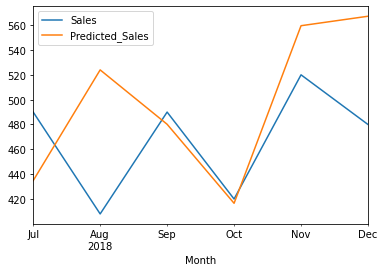

In [33]:
fig3 = plt.figure(figsize=(15,2))
experiment.log_figure(figure_name= "Sales vs preditced sales", figure=fig3)
test.plot()

In [34]:
def error_function(Car_sales,column_1,column_2):
    data = Car_sales.copy()
    my_list = []
    for i in range(len(data)):
        x = (data[column_2][i]*100)/data[column_1][i]
        if x >= 100:
            error = x-100
            #data['error_percentage'][i] = error
            my_list.append(error)
        else:
            error = 100-x
            my_list.append(error)
            #data['error_percentage'][i] = error
    data['error_percentage'] = my_list
    return data

In [35]:
column_1 = 'Sales'
column_2 = 'Predicted_Sales'
Car_sales_new = error_function(test,column_1,column_2)

In [36]:
Car_sales_new

,Sales,Predicted_Sales,error_percentage
Month,,,
2018-07-31,490,434.816803,11.261877
2018-08-31,408,523.968506,28.423653
2018-09-30,490,480.185608,2.002937
2018-10-31,420,416.564117,0.818067
2018-11-30,520,559.548950,7.605567
2018-12-31,480,567.170288,18.160477


In [37]:
def mean_error(Car_sales,error_column):
    total = 0
    for i in range(len(Car_sales)):
        total += Car_sales[error_column][i]
    mean_error_ = total/(len(Car_sales))
    return mean_error_

In [38]:
error_rate = mean_error(Car_sales_new,'error_percentage')

In [39]:
error_rate

11.378763134876976

In [40]:
sum_of_actual_sales = sum(Car_sales_new.Sales.values)

In [41]:
sum_of_actual_sales

2808

In [42]:
sum_of_predicted_sales = sum(Car_sales_new.Predicted_Sales.values)

In [43]:
sum_of_predicted_sales

2982.2542724609375

In [44]:
rate_of_actual_and_predict_sums = (sum_of_predicted_sales*100)/sum_of_actual_sales

In [45]:
if rate_of_actual_and_predict_sums >= 100:
    total_percentage = rate_of_actual_and_predict_sums - 100
else:
    total_percentage = 100-rate_of_actual_and_predict_sums

In [46]:
print('Percentage error: ',total_percentage)

Percentage error:  6.205636483651617


In [67]:
Experiment.end

<bound method BaseExperiment.end of <comet_ml._online.Experiment object at 0x7fad7d7fa7c0>>